# Cars 4 You: Expediting Car Evaluations with Machine Learning

## Problem Statement

**Cars 4 You** is an online car resale company that buys vehicles from different brands through its platform.  
Users submit details about their cars, which are then sent for mechanic evaluation before resale.

Due to rapid growth, the company faces **delays in car inspections**, leading to loss of potential customers.  
To solve this, the company wants a **predictive model** capable of estimating the **price of a car based on user-provided inputs**, without needing a physical evaluation.

## Project Objectives

The overall project is structured into three main goals (for the final submission), but the **first deliverable** focuses on the **initial stages** of this workflow.

### 1. Regression Benchmarking
Develop a regression model that predicts car prices (`price`) using the 2020 Cars 4 You dataset.  
Implement a consistent **model assessment strategy** to compare models and select the most generalizable one.

### 2. Model Optimization
Later in the project, explore model optimization through:
- Hyperparameter tuning  
- Feature engineering and preprocessing adjustments  

Compare and discuss the performance improvements.

### 3. Additional Insights
Open-ended exploration for the final project phase (e.g., feature importance, ablation study, specialized models, deep learning).



## Dataset Description

You have access to two datasets:

- **Training Set:** Cars from the 2020 Cars 4 You database, including prices (`price`).
- **Test Set:** Same descriptive features but without prices — used for Kaggle submission.

### Variables

| Attribute | Description |
|------------|-------------|
| **carID** | Unique identifier for each car |
| **Brand** | Car brand (e.g., Ford, Toyota) |
| **model** | Car model |
| **year** | Year of registration |
| **mileage** | Distance travelled (in miles) |
| **tax** | Road tax applicable in 2020 (in £) |
| **fuelType** | Fuel type (Diesel, Petrol, Hybrid, Electric) |
| **mpg** | Miles per gallon |
| **engineSize** | Engine size in liters |
| **paintQuality%** | Mechanic’s paint and hull assessment |
| **previousOwners** | Number of previous owners |
| **hasDamage** | Boolean (True/False) — damaged or not |
| **price** | Target variable — purchase price (£) |



## FIRST DELIVERABLE — Task Overview

This initial assignment is a **preparatory milestone** for your final project.  
You will **explore, prepare, and model** the dataset to demonstrate an understanding of the full ML pipeline.

Your submission must include:

1. A **Jupyter Notebook** (or a ZIP of notebooks) with code and explanatory Markdown cells.
2. A **2-page PDF** describing your pipeline’s structure and rationale.

### Naming Convention
Homework_Group36 



## DELIVERABLE TASKS & POINT DISTRIBUTION

### 1. Data Import & Exploration — *3 points*
- Load and inspect the dataset contents.  
- Generate **descriptive statistics**.  
- Detect and describe **inconsistencies or anomalies**.  
- Perform **visual exploration** (univariate & multivariate).  
- Extract **insights** and explain your findings.


### 2. Data Cleaning & Preprocessing — *5 points*
- Identify and **handle missing values** appropriately.  
- Detect and manage **outliers**, justifying your choices.  
- Encode **categorical variables**.  
- Evaluate existing features and, if relevant, **create new ones** with explanations.  
- Apply **data scaling/normalization**, explaining why your approach fits the problem.


### 3. Feature Selection — *3 points*
- Define a **clear feature selection strategy**.  
- Use **course-approved methods** (e.g., correlation, recursive elimination, model-based).  
- Present and justify your **final feature set**.


### 4. Model Building & Performance Assessment — *4 points*
- Identify the **problem type** (regression).  
- Choose relevant **algorithms** (linear models, tree-based, etc.).  
- Define one **model assessment strategy** (e.g., holdout, k-fold cross-validation).  
- Justify the **evaluation metrics** (e.g., RMSE, MAE, R²).  
- Train **at least one model** and generate **predictions for the test set**.

💡 **Bonus:** +1 point if your team ranks in the **Top 5 on Kaggle**.



### 5. Pipeline Structure & Documentation (PDF) — *5 points*
- Provide a **schematic of your full pipeline**:
  - Data cleaning  
  - Feature preprocessing  
  - Feature selection  
  - Model training and evaluation  
- Include concise explanations of:
  - What is done  
  - To which variables  
  - Why each step is taken
- Maintain **clarity, structure, and readability** throughout.


### Total Scoring
| Component | Points |
|------------|---------|
| Data Exploration | 3 |
| Preprocessing | 5 |
| Feature Selection | 3 |
| Model Building | 4 |
| Pipeline Documentation | 5 |
| **Total** | **20 points** |
| **Bonus (Top 5 Kaggle)** | **+1** |
| **Final Grade = min(20, your points)** |  |


## Completion Checklist

| Task | Done? |
|------|-------|
| Dataset imported and explored | ☐ |
| Missing values handled | ☐ |
| Outliers addressed | ☐ |
| Categorical variables encoded | ☐ |
| Features scaled and/or engineered | ☐ |
| Feature selection strategy implemented | ☐ |
| Regression model trained | ☐ |
| Performance metrics explained | ☐ |
| Predictions generated for test set | ☐ |
| Pipeline described in PDF | ☐ |
| Kaggle submission tested | ☐ |
| Notebook clean, commented, and executable | ☐ |


# 1. Importing libraries & Data

In [1]:
# general imports that we will need
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
sns.set()

# data partition
from sklearn.model_selection import train_test_split

# filter methods
# - spearman 
# - chi-square
import scipy.stats as stats
from scipy.stats import chi2_contingency

#wrapper methods
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, StandardScaler
from sklearn.model_selection import PredefinedSplit
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error, median_absolute_error, root_mean_squared_error, mean_absolute_percentage_error
# embedded methods
from sklearn.linear_model import LassoCV
from sklearn.linear_model import Lasso
# Scaler
from sklearn.preprocessing import (
    StandardScaler,
    MinMaxScaler,
    RobustScaler
)

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Custom functions and variables
from functions import histogram_boxplot, labeled_barplot, stacked_barplot, distribution_plot_wrt_target, comparative_boxplot, comparative_barplot, detect_outliers_iqr
from vocab_prep import BRAND_MODEL_VOCAB

#set random seed for reproducibility
RSEED = 42
np.random.seed(RSEED)
pd.set_option('display.max_rows', 500)


#### Data Loading

In [2]:
# this loads the train data 
train_raw = pd.read_csv('project_data/train.csv')

# this loads the test data
test_raw = pd.read_csv('project_data/test.csv')

#print first five rows of the training data
train_raw.head()

carID   Brand      model    year  price transmission  mileage fuelType  \
0  69512      VW       Golf  2016.0  22290    Semi-Auto  28421.0   Petrol   
1  53000  Toyota      Yaris  2019.0  13790       Manual   4589.0   Petrol   
2   6366    Audi         Q2  2019.0  24990    Semi-Auto   3624.0   Petrol   
3  29021    Ford     FIESTA  2018.0  12500        anual   9102.0   Petrol   
4  10062     BMW   2 Series  2019.0  22995       Manual   1000.0   Petrol   

     tax        mpg  engineSize  paintQuality%  previousOwners  hasDamage  
0    NaN  11.417268         2.0           63.0        4.000000        0.0  
1  145.0  47.900000         1.5           50.0        1.000000        0.0  
2  145.0  40.900000         1.5           56.0        4.000000        0.0  
3  145.0  65.700000         1.0           50.0       -2.340306        0.0  
4  145.0  42.800000         1.5           97.0        3.000000        0.0

#### Verify that carID can be used as index

In [3]:
train_raw['carID'].is_unique

True

In [4]:
train_raw['carID'].isna().any()

np.False_

#### Set carID as index

In [5]:
# setting carID as index
train_raw.set_index('carID', inplace = True)

# sorting by index
train_raw.sort_index(inplace =True)

# displaying the first three rows
train_raw.head(3)

Brand model    year  price transmission  mileage fuelType    tax   mpg  \
carID                                                                          
0       Aud    A3  2016.0  10990       Manual  57097.0   Diesel    0.0  83.1   
1      Audi    A7  2017.0  22999    Semi-Auto  24337.0   diesel  150.0  55.4   
2      Audi    A4  2016.0  14242       Manual  14900.0   Petrol  125.0  53.3   

       engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                        
0             1.6           75.0             4.0        0.0  
1             3.0           31.0             0.0        0.0  
2             1.4           65.0             4.0        0.0

# 2. Exploratory Data Analysis

In [6]:
train = train_raw.copy()

In [7]:
train.describe(include='all').T

count unique     top   freq          mean           std  \
Brand             74452     72    Ford  14808           NaN           NaN   
model             74456    735   Focus   6353           NaN           NaN   
year            74482.0    NaN     NaN    NaN   2017.096611      2.208704   
price           75973.0    NaN     NaN    NaN  16881.889553   9736.926322   
transmission      74451     40  Manual  38050           NaN           NaN   
mileage         74510.0    NaN     NaN    NaN  23004.184088  22129.788366   
fuelType          74462     34  Petrol  37995           NaN           NaN   
tax             68069.0    NaN     NaN    NaN    120.329078     65.521176   
mpg             68047.0    NaN     NaN    NaN     55.152666     16.497837   
engineSize      74457.0    NaN     NaN    NaN      1.660136      0.573462   
paintQuality%   74449.0    NaN     NaN    NaN     64.590667     21.021065   
previousOwners  74423.0    NaN     NaN    NaN       1.99458      1.472981   
hasDamage       74425.0    NaN     NaN    NaN           0.0           0.0   

                         min      25%      50%      75%          max  
Brand                    NaN      NaN      NaN      NaN          NaN  
model                    NaN      NaN      NaN      NaN          NaN  
year                  1970.0   2016.0   2017.0   2019.0  2024.121759  
price                  450.0  10200.0  14699.0  20950.0     159999.0  
transmission             NaN      NaN      NaN      NaN          NaN  
mileage        -58540.574478  7423.25  17300.0  32427.5     323000.0  
fuelType                 NaN      NaN      NaN      NaN          NaN  
tax                -91.12163    125.0    145.0    145.0        580.0  
mpg               -43.421768     46.3     54.3     62.8        470.8  
engineSize         -0.103493      1.2      1.6      2.0          6.6  
paintQuality%       1.638913     47.0     65.0     82.0   125.594308  
previousOwners      -2.34565      1.0      2.0      3.0     6.258371  
hasDamage                0.0      0.0      0.0      0.0          0.0

In [8]:
# let's check the data types
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 75973 entries, 0 to 75972
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           74452 non-null  object 
 1   model           74456 non-null  object 
 2   year            74482 non-null  float64
 3   price           75973 non-null  int64  
 4   transmission    74451 non-null  object 
 5   mileage         74510 non-null  float64
 6   fuelType        74462 non-null  object 
 7   tax             68069 non-null  float64
 8   mpg             68047 non-null  float64
 9   engineSize      74457 non-null  float64
 10  paintQuality%   74449 non-null  float64
 11  previousOwners  74423 non-null  float64
 12  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 8.1+ MB


In [9]:
# let's check a sample of the data
train.sample(10)

Brand      model    year  price transmission        mileage fuelType  \
carID                                                                          
69512      VW       Golf  2016.0  22290    Semi-Auto   28421.000000   Petrol   
53000  Toyota      Yaris  2019.0  13790       Manual    4589.000000   Petrol   
6366     Audi         Q2  2019.0  24990    Semi-Auto    3624.000000   Petrol   
29021    Ford     FIESTA  2018.0  12500        anual    9102.000000   Petrol   
10062     BMW   2 Series  2019.0  22995       Manual    1000.000000   Petrol   
14704     BMW   3 Series  2014.0   8199        anual  101153.348285   Diesel   
6924     Audi         A3  2017.0  16089       Manual   21396.000000   Petrol   
50783   Skoda    Octavia  2017.0   7500       Manual  116750.000000   Diesel   
67071      VW     Passat  2017.0  15999    Semi-Auto   30339.000000   Diesel   
23348    Ford      Focus  2019.0  15300       Manual   10700.000000   Petrol   

         tax        mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                                          
69512    NaN  11.417268         2.0           63.0        4.000000        0.0  
53000  145.0  47.900000         1.5           50.0        1.000000        0.0  
6366   145.0  40.900000         1.5           56.0        4.000000        0.0  
29021  145.0  65.700000         1.0           50.0       -2.340306        0.0  
10062  145.0  42.800000         1.5           97.0        3.000000        0.0  
14704   30.0  65.700000         2.0           74.0        0.000000        0.0  
6924    20.0  60.100000         1.4           75.0        4.000000        0.0  
50783  145.0  68.900000         1.6           59.0        4.000000        0.0  
67071  150.0  62.800000         2.0           85.0        4.000000        0.0  
23348  150.0  60.100000         1.0           35.0        1.000000        0.0

## 2.1 Inconsistencies

**Brand**

Typing errors

In [10]:
# display all unique values 
train['Brand'].unique()

array(['Aud', 'Audi', nan, 'audi', 'udi', 'AUDI', 'UDI', 'ud', 'aud',
       'AUD', 'BMW', 'MW', 'bmw', 'BM', 'mw', 'Ford', 'ford', 'for',
       'FORD', 'For', 'ord', 'ORD', 'FOR', 'or', 'Hyundai', 'Hyunda',
       'yundai', 'hyundai', 'HYUNDAI', 'hyunda', 'HYUNDA', 'yunda',
       'Mercedes', 'mercedes', 'MERCEDES', 'ercedes', 'Mercede', 'ercede',
       'ERCEDES', 'MERCEDE', 'mercede', 'Skoda', 'koda', 'SKODA', 'Skod',
       'SKOD', 'skoda', 'kod', 'skod', 'KODA', 'Toyota', 'toyota',
       'TOYOTA', 'Toyot', 'oyota', 'TOYOT', 'OYOTA', 'toyot', 'Opel',
       'pel', 'opel', 'Ope', 'OPEL', 'OPE', 'PEL', 'ope', 'pe', 'VW', 'W',
       'v', 'V', 'vw', 'w'], dtype=object)

In [11]:
# change all values to lower case and strip starting and ending spaces
train['Brand'] = train['Brand'].str.lower().str.strip()

np.array(sorted(train['Brand'].dropna().unique()))

array(['aud', 'audi', 'bm', 'bmw', 'ercede', 'ercedes', 'for', 'ford',
       'hyunda', 'hyundai', 'kod', 'koda', 'mercede', 'mercedes', 'mw',
       'ope', 'opel', 'or', 'ord', 'oyota', 'pe', 'pel', 'skod', 'skoda',
       'toyot', 'toyota', 'ud', 'udi', 'v', 'vw', 'w', 'yunda', 'yundai'],
      dtype='<U8')

In [12]:
train['Brand'].isna().sum()

np.int64(1521)

**model**

Typing errors

In [13]:
print(f'The number of unique model values is {train['model'].unique().size}')

The number of unique model values is 736


In [14]:
# change all values to lower case and strip starting and ending spaces
train['model'] = train['model'].str.lower().str.strip()

print(f'After lowercase and strip the number of unique values is {train['model'].unique().size}')

After lowercase and strip the number of unique values is 297


In [15]:
train['model'].unique()

array(['a3', 'a7', 'a4', 'q3', 'a6', 'a5', 'tt', 'q7', 'a1', 'q2', 'rs5',
       'a8', 'q5', 'a', 's4', nan, 'q', 'q8', 'rs3', 'rs6', 'rs4', 'rs',
       's3', 'r8', 's8', 'sq5', 'a2', 'sq7', 's5', 't', '1 series',
       '3 series', '2 series', 'x1', 'x3', 'x5', '5 series', 'z4',
       '4 series', 'x6', 'x2', '2 serie', '5 serie', '6 series', 'x4',
       '7 series', '3 serie', 'm3', 'm4', 'i8', 'x', 'x7', 'm2', 'm',
       'm5', '4 serie', '1 serie', 'z3', 'i3', 'z', '8 series', 'm6',
       '7 serie', '8 serie', 'i', '6 serie', 'focus', 'focu', 'fiesta',
       'kuga', 'puma', 'ecosport', 'ka+', 'edge', 's-max', 'fusion',
       'fiest', 'c-max', 'ka', 'grand c-max', 'mondeo', 's-ma', 'monde',
       'tourneo connect', 'b-max', 'galaxy', 'mustang',
       'grand tourneo connect', 'tourneo custom', 'c-ma', 'kug', 'b-ma',
       'ecospor', 'grand c-ma', 'streetka', 'k', 'ranger', 'escort',
       'galax', 'edg', 'grand tourneo connec', 'tourneo custo', 'i30',
       'ix20', 'i10', 'i

In [16]:
train['model'].isna().sum()

np.int64(1517)

**transmission**

Typing errors

In [17]:
train['transmission'].unique()

array(['Manual', 'Semi-Auto', 'Automatic', 'anual', 'manual', 'AUTOMATIC',
       'Manua', 'emi-Auto', nan, 'unknown', 'SEMI-AUTO', 'Semi-Aut',
       'nknown', 'Manual ', 'MANUAL', 'automatic', ' Manual ',
       'semi-auto', 'emi-auto', 'Automati', 'utomatic', 'anua', 'ANUAL',
       'unknow', 'SEMI-AUT', 'UTOMATIC', 'emi-Aut', 'MANUA', 'semi-aut',
       'EMI-AUTO', 'utomati', 'UNKNOWN', ' Manual', ' MANUAL ', 'manua',
       'AUTOMATI', ' manual ', 'manual ', 'Other', 'automati', 'nknow'],
      dtype=object)

In [18]:
# change all values to lower case and strip starting and ending spaces
train['transmission'] = train['transmission'].str.lower().str.strip()

np.array(sorted(train['transmission'].dropna().unique()))

array(['anua', 'anual', 'automati', 'automatic', 'emi-aut', 'emi-auto',
       'manua', 'manual', 'nknow', 'nknown', 'other', 'semi-aut',
       'semi-auto', 'unknow', 'unknown', 'utomati', 'utomatic'],
      dtype='<U9')

**fuelType**

Typing errors

In [19]:
train['fuelType'].unique()

array(['Diesel', 'diesel', 'Petrol', 'Petro', 'etrol', 'petrol', 'iesel',
       'PETROL', nan, 'DIESEL', 'Diese', 'Hybrid', 'etro', 'ETROL',
       'iese', 'PETRO', 'petro', 'ybrid', 'diese', 'IESEL', 'Other',
       'HYBRID', 'hybrid', 'Hybri', 'DIESE', 'Othe', 'Electric', 'ETRO',
       'IESE', 'ybri', 'YBRID', 'OTHER', 'ther', 'HYBRI', 'other'],
      dtype=object)

In [20]:
# change all values to lower case and strip starting and ending spaces
train['fuelType'] = train['fuelType'].str.lower().str.strip()

np.array(sorted(train['fuelType'].dropna().unique()))

array(['diese', 'diesel', 'electric', 'etro', 'etrol', 'hybri', 'hybrid',
       'iese', 'iesel', 'othe', 'other', 'petro', 'petrol', 'ther',
       'ybri', 'ybrid'], dtype='<U8')

**year**

Non int values

In [21]:
print(train['year'].unique())
print("")
print(f'The number of rows with non-integer year values are: {train.loc[(train['year'] != round(train['year'])) & (train['year'].notna()), ['year']].size}')

[2016.         2017.         2019.         2015.         2020.
 2018.         2014.         2013.         2011.         2012.
 2023.60527574 2008.         2005.                   nan 2010.37154646
 2002.         2007.         2006.         2010.         2004.
 2003.         2009.         1998.         2024.12175905 2009.81675711
 2001.         1997.         1999.         2023.1169636  2010.67696784
 2000.         1996.         2022.87800554 2011.11118842 2023.97731126
 2011.21085349 1970.         2022.69668507 2012.69574039 2023.36707842
 2010.26863473 2010.56500919 2023.26798867 2023.38982198 2010.7464032 ]

The number of rows with non-integer year values are: 723


In [22]:
# lets see the rows where year is not integer and not nan
train[(train['year'] != round(train['year'])) & (train['year'].notna())].sample(5)

Brand     model         year  price transmission  mileage fuelType  \
carID                                                                          
34011   hyundai    tucson  2011.111188  13750       manual  22445.0    iesel   
30502      ford      kuga  2010.676968  19500       manual  24509.0   diesel   
10511       bmw  5 series  2009.816757  11450       manual  60529.0   diesel   
40542  mercedes   c class  2011.210853  26550    automatic   4001.0   diesel   
54299    toyota     hilux  2023.367078  24995    automatic      NaN    diese   

         tax   mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                                     
34011   30.0  61.7         1.7           75.0             4.0        0.0  
30502  150.0  54.3         2.0           55.0             2.0        0.0  
10511   30.0  65.7         2.0           81.0             3.0        0.0  
40542    NaN   NaN         2.0           61.0             2.0        0.0  
54299  260.0  36.2         2.4           88.0             0.0        0.0

**mileage**

Negative values

In [23]:
print(f'The number of rows with negative mileage values is: {train.loc[train['mileage'] < (0), ['mileage']].size}')

The number of rows with negative mileage values is: 369


In [24]:
# lets see the rows where mileage is negative
train.loc[train['mileage'] < 0].sample(5)

Brand    model    year  price transmission       mileage fuelType  \
carID                                                                         
25987      ford    focus  2017.0  17500       manual -42650.453719   petrol   
39727  mercedes  c class  2017.0  16911    semi-auto -50755.210230   diesel   
32108   hyundai   tucson  2016.0  12990       manual -36635.042697   diesel   
24959      ford   fiesta  2019.0  14100       manual -42650.453719   petrol   
46275  mercedes  c class  2019.0  25080    semi-auto -50755.210230   petrol   

         tax       mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                                         
25987  145.0  41.50000         2.0           57.0             1.0        0.0  
39727  150.0  65.70000         1.6           94.0             2.0        0.0  
32108   30.0  61.70000         1.7           61.0             4.0        0.0  
24959  145.0  27.70949         1.0           95.0             3.0        0.0  
46275  145.0  42.20000         1.5           32.0             1.0        0.0

**tax**

Negative values

In [25]:
print(train['tax'].unique())
print("")
print(f'The number of rows with negative tax values is: {train.loc[train['tax'] < (0), ['tax']].size}')

[  0.         150.         125.         145.                  nan
  30.          20.         235.         555.         200.
 -60.6840948  160.         205.         240.         260.
 265.         330.         327.91577835 300.         295.
 565.         325.         195.         135.         165.
 305.         535.         140.         570.         280.
 315.         540.         220.         580.         190.
 155.         230.         -43.24208237 316.48718937 270.
 120.         255.         250.         110.         185.
 245.         -45.78061049 299.47350391 290.         115.
 210.         294.84340933 -31.91494466 -56.19320154 326.02823317
 520.          10.         277.38425448 -18.33074314 -91.12163048
 316.29630636 290.48678508 -20.24107949 130.         -49.15354066
 303.14889146]

The number of rows with negative tax values is: 378


In [26]:
# lets see the rows where tax is negative
train.loc[train['tax'] < 0].sample(5)

Brand     model    year  price transmission      mileage fuelType  \
carID                                                                         
27962      ford  ecosport  2017.0   9199       manual  29778.00000    etrol   
31916   hyundai    tucson  2019.0  22500       manual   6155.00000   hybrid   
4781       audi        q2  2017.0  21000    automatic  23000.00000   petrol   
44395  mercedes   a class  2017.0  12900    automatic -50755.21023   diesel   
58917      opel     astra  2017.0   9260       manual  29663.00000   diesel   

             tax   mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                                         
27962 -45.780610  52.3         1.0           41.0             0.0        0.0  
31916 -31.914945  51.4         1.6           63.0             3.0        0.0  
4781  -60.684095  52.3         1.4           69.0             4.0        0.0  
44395 -56.193202  76.4         1.5           84.0             3.0        0.0  
58917 -20.241079  76.3         1.6           86.0             0.0        0.0

In [27]:
#lets see the rows where tax is not integer and not nan and greater than 0
train[(train['tax'] != round(train['tax'])) & (train['tax'].notna()) & (train['tax'] > 0)].sample(5)

Brand  model    year  price transmission  mileage fuelType  \
carID                                                                 
70050       vw   polo  2018.0  11412       manual   9529.0   petrol   
13035      bmw     x1  2012.0   9500    automatic  53524.0   diesel   
57765     opel  corsa  2013.0   4750       manual  64546.0   petrol   
67186      NaN   golf  2018.0  15999       manual   9427.0   petrol   
34649  hyundai    i10  2020.0  13949    semi-auto   6000.0   petrol   

              tax   mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                                          
70050  303.148891  60.1         1.0           46.0             2.0        0.0  
13035  316.487189  52.3         2.0           46.0             4.0        0.0  
57765  290.486785  51.4         1.2           98.0             0.0        0.0  
67186  303.148891  47.9         1.5           65.0             4.0        0.0  
34649  294.843409  52.3         1.2           97.0             2.0        0.0

**mpg**

Negative values

In [28]:
print(train['mpg'].unique())
print("")
print(f'The number of rows with negative mpg values is: {train.loc[train['mpg'] < (0), ['mpg']].size}')

[ 83.1         55.4         53.3         51.4         47.9
  57.6         58.9         46.3         49.6         33.2
  40.9         32.1         31.4         47.1         54.3
  80.7         64.2         39.8         68.9         74.3
  44.1         38.7         38.2         67.3         44.8
  26.4         39.2         42.8         42.2         48.7
  60.1         56.5         32.8         50.4         52.3
  41.5         43.5         32.5         61.4         40.4
  65.7                 nan  34.9         37.2         70.6
  45.6         35.8          9.82146197  34.          34.5
  22.4         76.3         62.8         33.6         30.7
  89.77369267  36.7         31.7         29.4         30.1
  36.2         37.7         29.7         29.1         72.4
  35.3        141.3        117.7         31.          34.4
  57.7        156.9         21.1         28.8        176.6
  42.1         33.3         20.3        188.3         76.4
  19.6         21.9         24.1         21.6         22

In [29]:
#lets see the rows where mpg is negative
train.loc[train['mpg'] < 0].sample(5)


Brand     model    year  price transmission  mileage fuelType    tax  \
carID                                                                        
13698   bmw  3 series  2016.0  13750       manual  59222.0   diesel  125.0   
13901   bmw  1 series  2019.0  22890      unknown  10927.0   petrol  150.0   
13713    mw  3 series  2020.0  34900    automatic    100.0   diesel  145.0   
13855   bmw  3 series     NaN  20000    automatic  27725.0   diesel  145.0   
14842   bmw        x1  2016.0  17225       manual  17531.0   diesel  125.0   

             mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                                   
13698 -43.421768         2.0           74.0             1.0        0.0  
13901 -43.421768         1.5           78.0             4.0        0.0  
13713 -43.421768         2.0           49.0             4.0        0.0  
13855 -43.421768         2.0           96.0             1.0        0.0  
14842 -43.421768         2.0           60.0             2.0        0.0

**engineSize**	

Negative values

In [30]:
print(train['engineSize'].unique())
print("")
print(f'The number of rows with negative engineSize values is: {train.loc[train['engineSize'] < (0), ['engineSize']].size}')
print(f'The number of rows with zero engineSize values is: {train.loc[train['engineSize'] == 0, ['engineSize']].size}')

[ 1.6         3.          1.4         2.          1.8         1.
  1.5                nan  4.2         1.2         0.15452932  0.
  2.5         4.          3.73923548  2.9         2.7         5.2
  1.9         4.1         3.2         0.31340658  3.82275785  2.2
  4.4         6.6         0.6         3.5         5.          1.1
 -0.1034928   2.3         2.63120047  1.3         1.7         2.6631132
  0.37112737  2.4         2.1         3.72371217  0.30707394  5.5
  5.4         6.2         3.6         4.7         2.6         6.
  4.3         0.19146242  2.61964142  0.16286595  2.8         2.78177621
  4.5         0.7395339   2.06411863  0.18642488  2.98579344]

The number of rows with negative engineSize values is: 84
The number of rows with zero engineSize values is: 180


In [31]:
#lets see the rows where engineSize is negative
train.loc[train['engineSize'] < 0].sample(5)

Brand     model    year  price transmission  mileage fuelType    tax  \
carID                                                                        
17489  ford  ecosport  2015.0   9000    automatic  33161.0   petrol  160.0   
23710  ford    fiesta  2015.0   8798    semi-auto      NaN   petrol  145.0   
25786  ford     focus  2019.0  22495    automatic   4294.0   diesel  145.0   
24009  ford      kuga  2017.0  17474       manual      NaN   diesel  145.0   
23079   for     focus     NaN  20000       manual   6156.0   diesel  145.0   

        mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                              
17489  44.8   -0.103493           90.0             4.0        0.0  
23710  47.9   -0.103493           85.0             3.0        0.0  
25786  64.2   -0.103493           64.0             0.0        0.0  
24009  54.3   -0.103493           33.0             1.0        0.0  
23079  57.7   -0.103493           45.0             1.0        0.0

**paintQuality%**

% above 100 & non int values 

In [32]:
print(train['paintQuality%'].unique())
print("")
print(f'The number of rows with paintQuality% values above 100% is: {train.loc[train['paintQuality%'] > (100), ['paintQuality%']].size}')
print(f'The number of rows with non-integer paintQuality% values are: {train.loc[train['paintQuality%'] != round(train['paintQuality%']), ['paintQuality%']].size}')

[ 75.          31.          65.          55.          62.
  97.          77.          49.          79.          96.
  36.         125.30194543  80.          57.          83.
  47.          66.          30.          74.          85.
  99.          73.          67.          44.          45.
  56.          52.          81.           3.1152953   54.
          nan  78.          72.          82.          39.
  76.          34.          59.          48.          88.
  53.          41.          35.          94.          95.
  87.          70.          37.          51.          58.
  61.          86.          98.          60.          32.
  92.          84.          71.          91.          38.
  90.          50.          40.          33.          89.
  69.          42.          68.          43.          93.
  63.          46.          64.         125.5694986    3.14037046
   3.22574362 125.10995148   3.25476013 125.18872876 125.20203342
   3.20741784   2.72515272 125.4535988    1.63891309 125

In [33]:
#lets see the rows where paintQuality% is above 100% or non-integer and not nan
train.loc[(train['paintQuality%'] > 100) | (train['paintQuality%'] != round(train['paintQuality%'])) & (train['paintQuality%'].notna())].sample(5)

Brand      model    year  price transmission  mileage fuelType  \
carID                                                                      
11096       bmw   2 series  2017.0  16498    semi-auto  27811.0   diesel   
38193  mercedes  glc class  2017.0  27950    automatic  22244.0    iesel   
34045   hyundai   santa fe  2020.0  35980    semi-auto   2196.0   diesel   
59911      opel      corsa  2014.0   4499       manual  46477.0   petrol   
7501        bmw         x2  2020.0  28993    semi-auto    101.0   diesel   

         tax   mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                                     
11096  145.0  64.2         2.0       3.140370             3.0        0.0  
38193  145.0   NaN         2.1     125.202033             3.0        0.0  
34045  145.0  39.2         2.2       3.254760             1.0        0.0  
59911  125.0  51.4         1.4       3.172683             1.0        0.0  
7501   145.0  61.4         2.0     125.569499             1.0        0.0

**previousOwners**	

Negative & non int values

In [34]:
print(train['previousOwners'].unique())
print("")
print(f'The number of rows with negative previousOwners values is: {train.loc[train['previousOwners'] < (0), ['previousOwners']].size}')
print(f'The number of rows with non-integer previousOwners values are: {train.loc[train['previousOwners'] != round(train['previousOwners']), ['previousOwners']].size}')

[ 4.          0.          1.          2.          3.                 nan
  6.2482512  -2.33512284 -2.31225953  6.23017958  6.25823052 -2.34030622
  6.22789796 -2.31733109  6.25837066 -2.33936045  6.24177863 -2.33744529
  6.21772443 -2.34010209 -2.29943868  6.23308217 -2.34565     6.24583495]

The number of rows with negative previousOwners values is: 371
The number of rows with non-integer previousOwners values are: 2284


In [35]:
#lets see the rows where previousOwners is negative or non-integer and not nan
train.loc[(train['previousOwners'] < 0) | (train['previousOwners'] != round(train['previousOwners'])) & (train['previousOwners'].notna())].sample(5)

Brand    model    year  price transmission       mileage fuelType  \
carID                                                                         
55788    toyota    yaris  2013.0   5698       manual  57140.000000   petrol   
37549  mercedes  c class  2017.0  20000       manual  28831.000000   diesel   
57138      opel    corsa  2019.0   9800       manual   1835.000000   petrol   
50665     skoda  octavia  2019.0  17795       manual   4442.000000   diesel   
67307        vw   arteon  2019.0  24990    semi-auto -48190.655673   diesel   

         tax   mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                                     
55788  125.0  51.4         1.3           85.0       -2.340102        0.0  
37549  145.0  65.7         2.1           80.0       -2.339360        0.0  
57138  145.0  44.8         1.4           77.0       -2.299439        0.0  
50665  145.0  67.3         1.6           81.0        6.241779        0.0  
67307  145.0  44.1         2.0           51.0        6.245835        0.0

**price**

In [36]:
train.loc[train['price'] != round(train['price']), 'price'].size

0

In [37]:
train.loc[train['price'] < 0, 'price'].size

0

**hasDamage**

Only zeros

In [38]:
print(train['hasDamage'].unique())

[ 0. nan]


## 2.1.1 Adress Inconsistencies

## Creation of metric and non-metric features

In [39]:
metric_features = ['price', 'year', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners']  
non_metric_features = ['Brand', 'model', 'transmission', 'fuelType','hasDamage']

**Vocabulary**

In [40]:
# Correct misspelled values in 'Brand' column
BRAND_CORRECTIONS = {
    'aud': 'audi',
    'udi': 'audi',
    'ud': 'audi',
    'mw': 'bmw',
    'bm': 'bmw',
    'for': 'ford',
    'ord': 'ford', 
    'or': 'ford',
    'hyunda': 'hyundai',
    'yundai': 'hyundai',
    'yunda': 'hyundai',
    'mercedes': 'mercedes-benz',
    'mercede': 'mercedes-benz',
    'ercedes': 'mercedes-benz',
    'ercede': 'mercedes-benz',
    'mercedes benz': 'mercedes-benz',
    'koda': 'skoda',
    'skod': 'skoda',
    'kod': 'skoda',
    'toyot': 'toyota',
    'oyota': 'toyota',
    'pel': 'opel',
    'pe': 'opel',
    'ope': 'opel',
    'vw': 'volkswagen',
    'v': 'volkswagen',
    'w': 'volkswagen'
}

Transmission_Corrections = {
    'anual': 'manual',
    'manua': 'manual',
    'anua': 'manual',
    'emi-auto': 'semi-auto',
    'semi-aut': 'semi-auto',
    'emi-aut': 'semi-auto',
    'automati': 'automatic',
    'utomatic': 'automatic',
    'utomati': 'automatic',
    'nknown': 'unknown',
    'unknow': 'unknown',
    'other': 'unknown',
    'nknow': 'unknown'
}

fuelType_Corrections = {
    'etro': 'petrol',
    'etrol': 'petrol',
    'petro': 'petrol',
    'hybri': 'hybrid',
    'ybri': 'hybrid',
    'ybrid': 'hybrid',
    'diese': 'diesel',
    'iese': 'diesel',
    'iesel': 'diesel',
    'othe': 'other',
    'ther': 'other'
}


**model vocabulary**

In [41]:
pure_brand_model_df = pd.DataFrame(BRAND_MODEL_VOCAB)
#pure_brand_model_df

In [42]:
# Explain why the count of unique models (both correct and typos) 
# differs between the 'vocabulary' (pure_brand_model_df) and the train dataset.
set1 = set(pure_brand_model_df['model_lower'].dropna().unique())
set2 = set(train['model'].dropna().unique())
print("len(set1)", len(set1))
print("len(set2)", len(set2))  
print("len(set2)-len(set1)", len(set2)-len(set1))
print("set(train['model']) - set(pure_brand_model_df['model_lower'])", set2 - set1)
print("set(pure_brand_model_df['model_lower']) - set(train['model'])", set1 - set2)

len(set1) 288
len(set2) 296
len(set2)-len(set1) 8
set(train['model']) - set(pure_brand_model_df['model_lower']) {'z', 'rs', 'viv', 'm', 'kadjar', 'q', 'i', 't', 'x', 'a'}
set(pure_brand_model_df['model_lower']) - set(train['model']) {'veloster', 'suvra'}


In [43]:
# Fix model names only for rows with a known (non-NaN) Brand in the input DataFrame (train/val/test).
def model_fix_wo_nan(pure_brand_model_df, input_df):
    # (brand, model_lower) -> model_correct for rows that need correction
    fix_map = (pure_brand_model_df.query("correction == 1")
               .set_index(['brand','model_lower'])['model_correct'])
    
    # replace model only where a correction exists; otherwise keep original
    keys = list(zip(input_df['Brand'], input_df['model']))
    input_df['model'] = pd.Series(keys, index=input_df.index).map(fix_map).fillna(input_df['model'])
    return input_df['model']

In [44]:
deduped_model_df = pure_brand_model_df.copy()

In [45]:
# List all rows where the model name is "i3" across brands
# BMW "i3" is correct; Hyundai "i3" is a typo (should be "i30").
deduped_model_df[deduped_model_df['model_lower'].duplicated(keep=False)]

brand model_lower model_correct  correction
41      bmw          i3            i3           0
99  hyundai          i3           i30           1

In [46]:
# Drop Hyundai i3 rows by index from a query
deduped_model_df = deduped_model_df.drop(deduped_model_df.query("brand == 'hyundai' and model_lower == 'i3'").index)
deduped_model_df[deduped_model_df['model_lower'].duplicated(keep=False)]

Empty DataFrame
Columns: [brand, model_lower, model_correct, correction]
Index: []

In [47]:
# Fix model names only for rows with unknown (NaN) Brand in the input DataFrame (train/val/test).
def model_fix_with_nan(deduped_model_df, input_df):
    fix_map = deduped_model_df.loc[deduped_model_df['correction'] == 1].set_index('model_lower')['model_correct']
    
    mask = input_df['Brand'].isna()
    input_df.loc[mask, 'model'] = input_df.loc[mask, 'model'].map(fix_map).fillna(input_df.loc[mask, 'model'])
    return input_df['model']

In [48]:
# Fill missing Brand values
def brand_fix_with_nan(deduped_model_df, input_df):
    # Rows where Brand is NaN in input_df
    input_df.loc[input_df["Brand"].isna()][["Brand","model"]]
    
    # Map input_df['model'] to short_brand_model_df['model_lower']
    # to fill missing Brand values in input_df with the correct brand names from short_brand_model_df.
    input_df['Brand'] = input_df['Brand'].replace('', pd.NA)  # treat empty as missing
    input_df['Brand'] = input_df['Brand'].fillna(input_df['model'].map(deduped_model_df.set_index('model_lower')['brand']))
    return input_df['Brand']

**Fix Brand, model, transmission & fuelType**

In [49]:
def fix_brand_model_transmission_fuelType(input_df, pure_brand_model_df, deduped_model_df):
    
    input_df['Brand'] = input_df['Brand'].str.lower().str.strip()
    input_df['Brand'] = input_df['Brand'].replace(BRAND_CORRECTIONS)

    input_df['transmission'] = input_df['transmission'].str.lower().str.strip()
    input_df['transmission'] = input_df['transmission'].replace(Transmission_Corrections)

    input_df['fuelType'] = input_df['fuelType'].str.lower().str.strip()
    input_df['fuelType'] = input_df['fuelType'].replace(fuelType_Corrections)

    # change all values to lower case and strip starting and ending spaces
    input_df['model'] = input_df['model'].str.lower().str.strip()
    
    input_df['model'] = model_fix_wo_nan(pure_brand_model_df, input_df)
    input_df['model'] = model_fix_with_nan(deduped_model_df, input_df)
    input_df['Brand'] = brand_fix_with_nan(deduped_model_df, input_df)

    #

    # Keep only rows whose model exists in the vocabulary
    input_df = input_df[input_df['model'].isin(pure_brand_model_df['model_lower'])]
    return input_df   

In [50]:
train['model'].isna().sum()

np.int64(1517)

In [51]:
train['model'].nunique()

296

In [52]:
train = fix_brand_model_transmission_fuelType(train, pure_brand_model_df, deduped_model_df)

In [53]:
train.shape

(74260, 13)

**Fix Numerical features**

In [54]:
# need to inforce metric features to be indeed numeric
def enforce_metric_features(input_df, metric_features):
    for feature in metric_features:
        input_df[feature] = pd.to_numeric(input_df[feature], errors='coerce')
    return input_df

In [55]:
#All the changes in one function 
def fix_numerical_features(input_df):

    #round the non int year values
    input_df['year'] = input_df['year'].round()

    # set the negative tax values to NaN
    input_df.loc[input_df['tax'] < 0, 'tax'] = np.nan

    # sets the negative mileage values to NaN
    input_df.loc[input_df['mileage'] < 0, 'mileage'] = np.nan
        
    #sets the negative mpg values to NaN
    input_df.loc[input_df['mpg'] < 0, 'mpg'] = np.nan

    # sets the negative engineSize values to NaN
    input_df.loc[input_df['engineSize'] <= 0, 'engineSize'] = np.nan

    # sets the paintQuality% values above 100% & non int to NaN
    input_df.loc[(input_df['paintQuality%'] > 100) | (input_df['paintQuality%'] != round(input_df['paintQuality%'])), 'paintQuality%'] = np.nan

    #sets the negative previousOwners values & non int to NaN
    input_df.loc[(input_df['previousOwners'] < 0) | (input_df['previousOwners'] != round(input_df['previousOwners'])), 'previousOwners'] = np.nan
    
    return input_df

In [56]:
train = enforce_metric_features(train, metric_features)

In [57]:
train = fix_numerical_features(train)

In [58]:
train.describe(include='all').T

count unique     top   freq          mean           std  \
Brand             74260      9    ford  16060           NaN           NaN   
model             74260    193   focus   6915           NaN           NaN   
year            72804.0    NaN     NaN    NaN   2017.096258      2.208291   
price           74260.0    NaN     NaN    NaN  16864.519216   9723.049878   
transmission      72766      4  manual  40731           NaN           NaN   
mileage         72473.0    NaN     NaN    NaN  23348.436991  21627.207861   
fuelType          72790      5  petrol  40272           NaN           NaN   
tax             66146.0    NaN     NaN    NaN    121.237421     64.460013   
mpg             66458.0    NaN     NaN    NaN     55.221953     16.333171   
engineSize      72517.0    NaN     NaN    NaN      1.665635      0.565261   
paintQuality%   72053.0    NaN     NaN    NaN     64.584126     20.227862   
previousOwners  72027.0    NaN     NaN    NaN      1.996376      1.417087   
hasDamage       72753.0    NaN     NaN    NaN           0.0           0.0   

                     min      25%      50%      75%       max  
Brand                NaN      NaN      NaN      NaN       NaN  
model                NaN      NaN      NaN      NaN       NaN  
year              1970.0   2016.0   2017.0   2019.0    2024.0  
price              450.0  10200.0  14695.0  20945.0  159999.0  
transmission         NaN      NaN      NaN      NaN       NaN  
mileage              1.0   7570.0  17416.0  32481.0  323000.0  
fuelType             NaN      NaN      NaN      NaN       NaN  
tax                  0.0    125.0    145.0    145.0     580.0  
mpg                  1.1     46.3     54.3     62.8     470.8  
engineSize      0.154529      1.2      1.6      2.0       6.6  
paintQuality%       30.0     47.0     65.0     82.0      99.0  
previousOwners       0.0      1.0      2.0      3.0       4.0  
hasDamage            0.0      0.0      0.0      0.0       0.0

## 2.2 Variable Exploration

### 2.2.1 Univariate Analysis

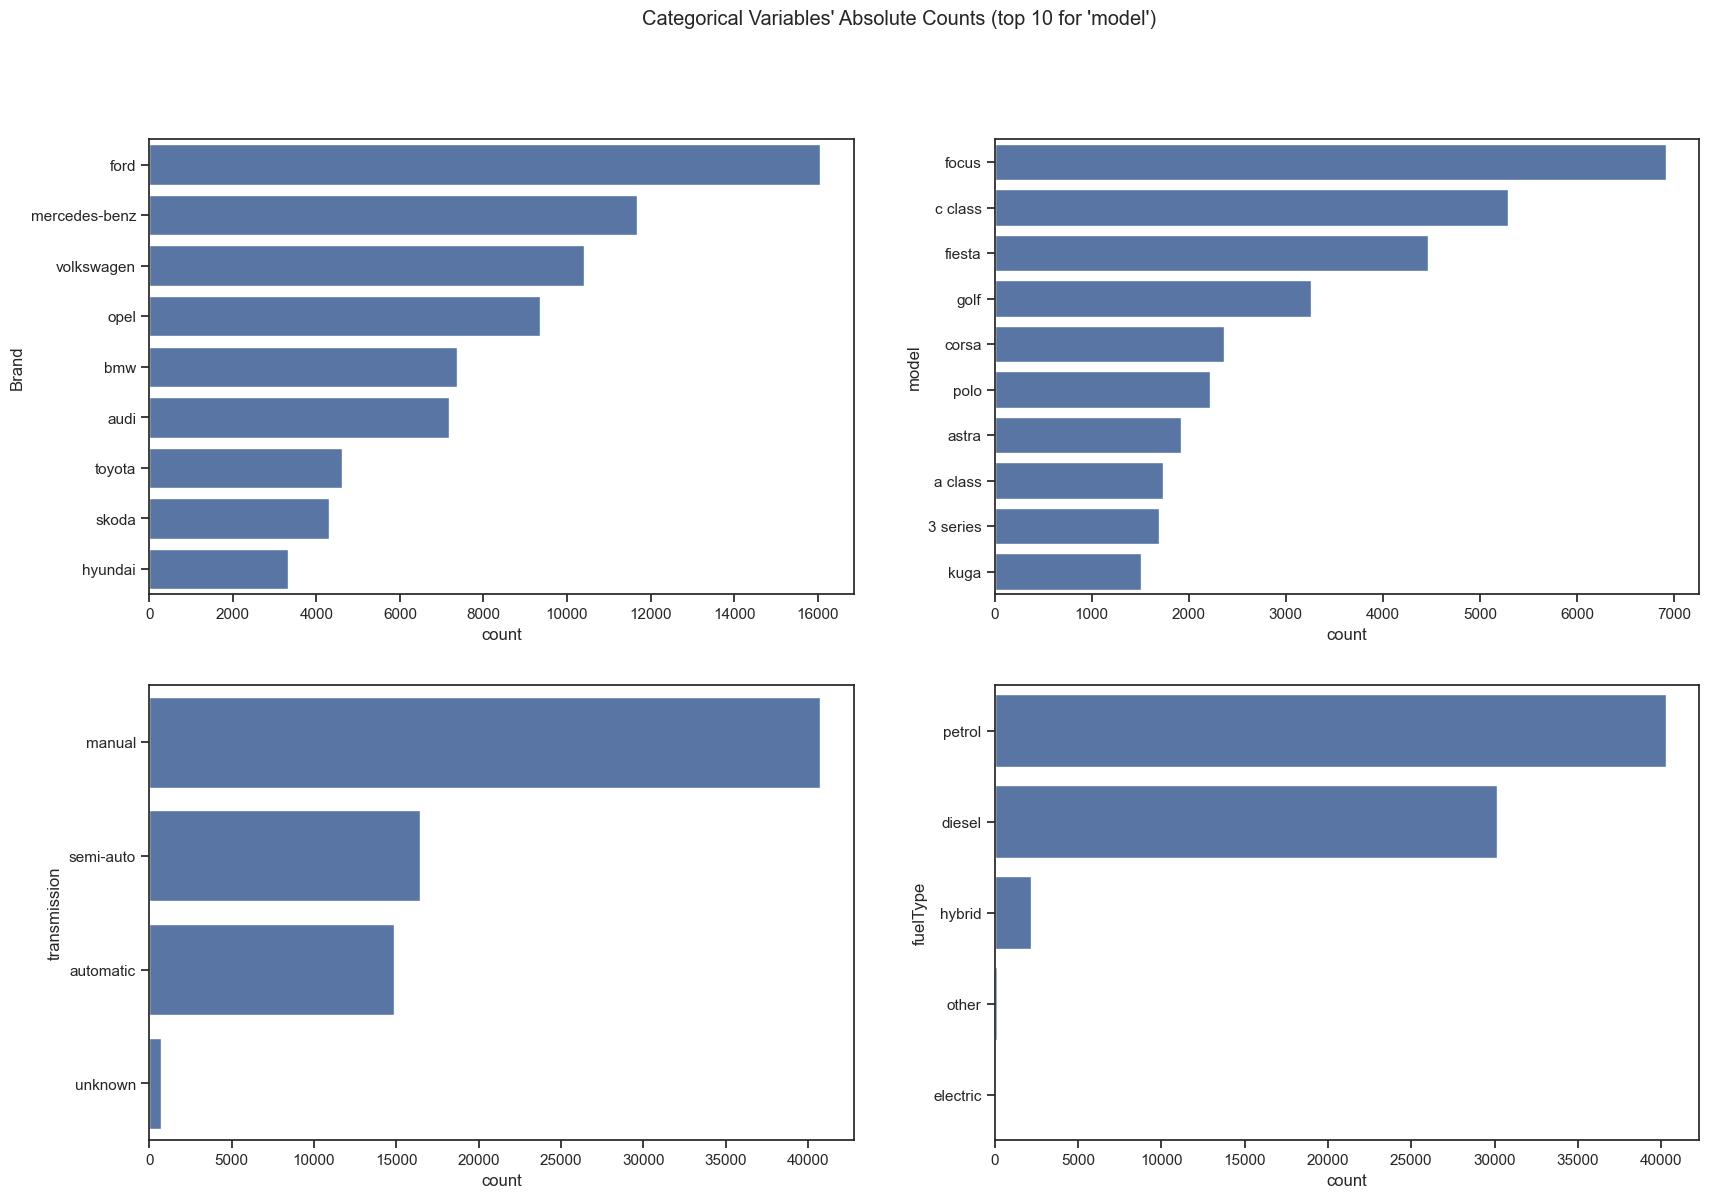

In [59]:
sns.set_style('ticks')

sp_rows = 2
sp_cols = 2

fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 13))

#only top 10 for model
for ax, feat in zip(axes.flatten(), non_metric_features):
    sns.countplot(y=feat, data=train, ax=ax, order=train[feat].value_counts().index[:10])

# Layout
# Add a centered title to the figure:
title = "Categorical Variables' Absolute Counts (top 10 for 'model')"

plt.suptitle(title)
plt.show()

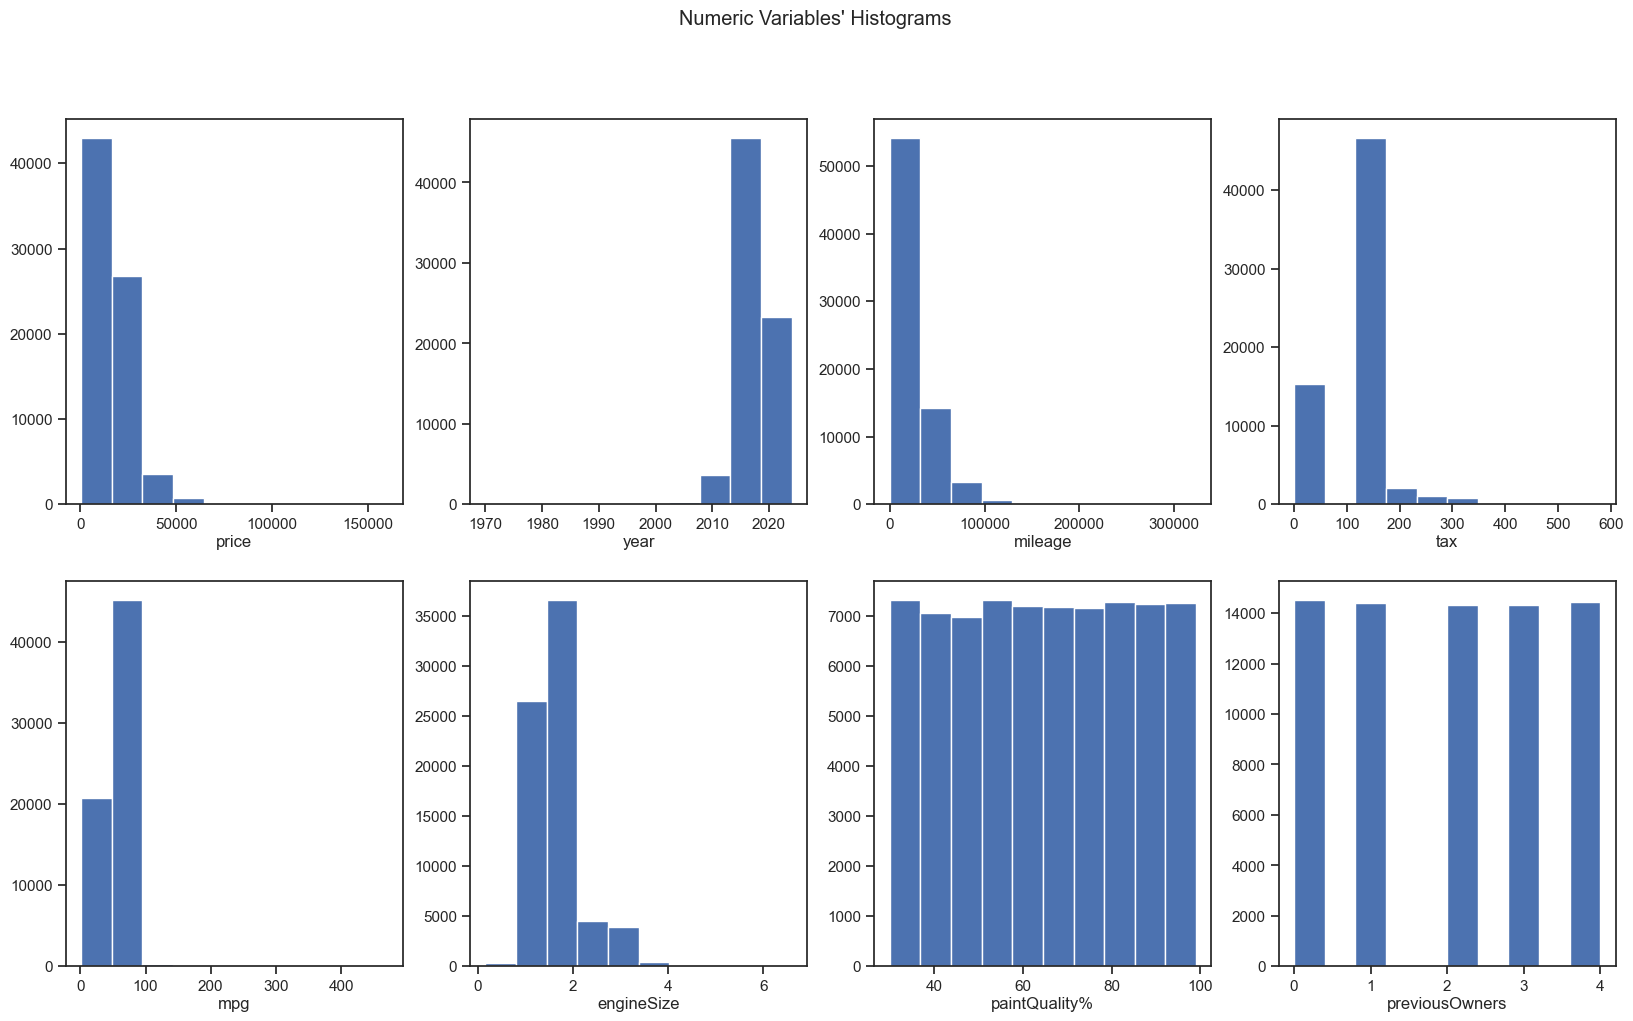

In [60]:
# Plot ALL Numeric Variables' Histograms in one figure

sns.set_style('ticks')

sp_rows = 2
sp_cols = 4

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features): 
    ax.hist(train[feat])
    ax.set_title(feat, y=-0.13)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Histograms"

plt.suptitle(title)
plt.show()

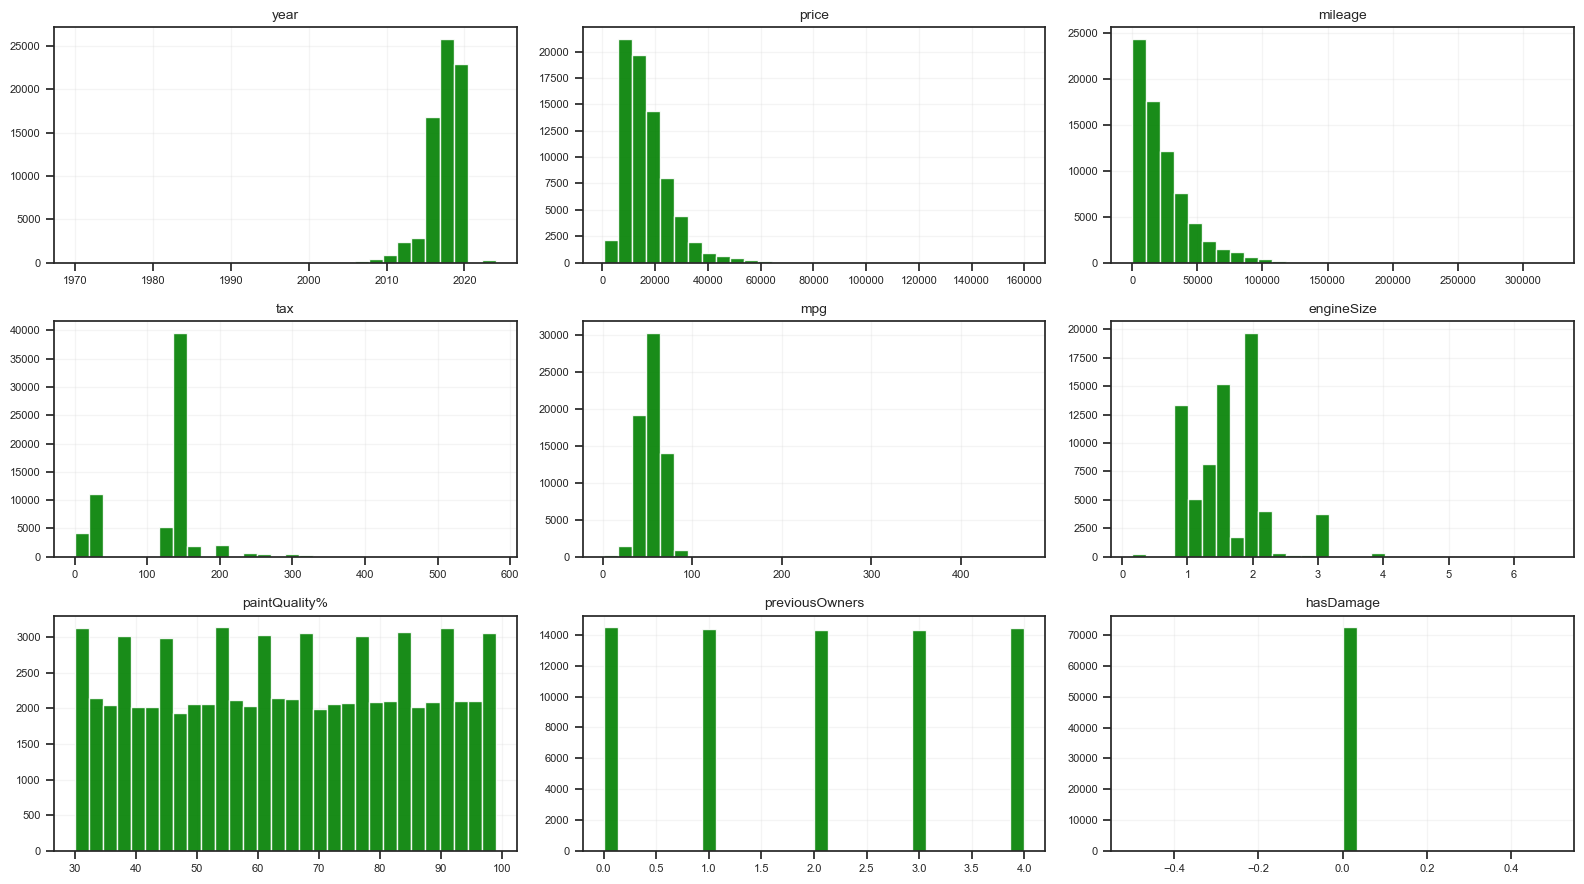

In [61]:
num = train.select_dtypes(include='number')
cols = num.columns.tolist()

n = len(cols)
ncols = 3
nrows = math.ceil(n / ncols)

fig, axes = plt.subplots(nrows, ncols, figsize=(16, 3*nrows))
axes = axes.flatten() if n > 1 else [axes]

for ax, col in zip(axes, cols):
    ax.hist(num[col].dropna(), bins=30, color='green', edgecolor='white', alpha=0.9)
    ax.set_title(col, fontsize=10)
    ax.tick_params(labelsize=8)
    ax.grid(alpha=0.2)

for ax in axes[n:]:
    ax.set_visible(False)

plt.tight_layout()
plt.show()

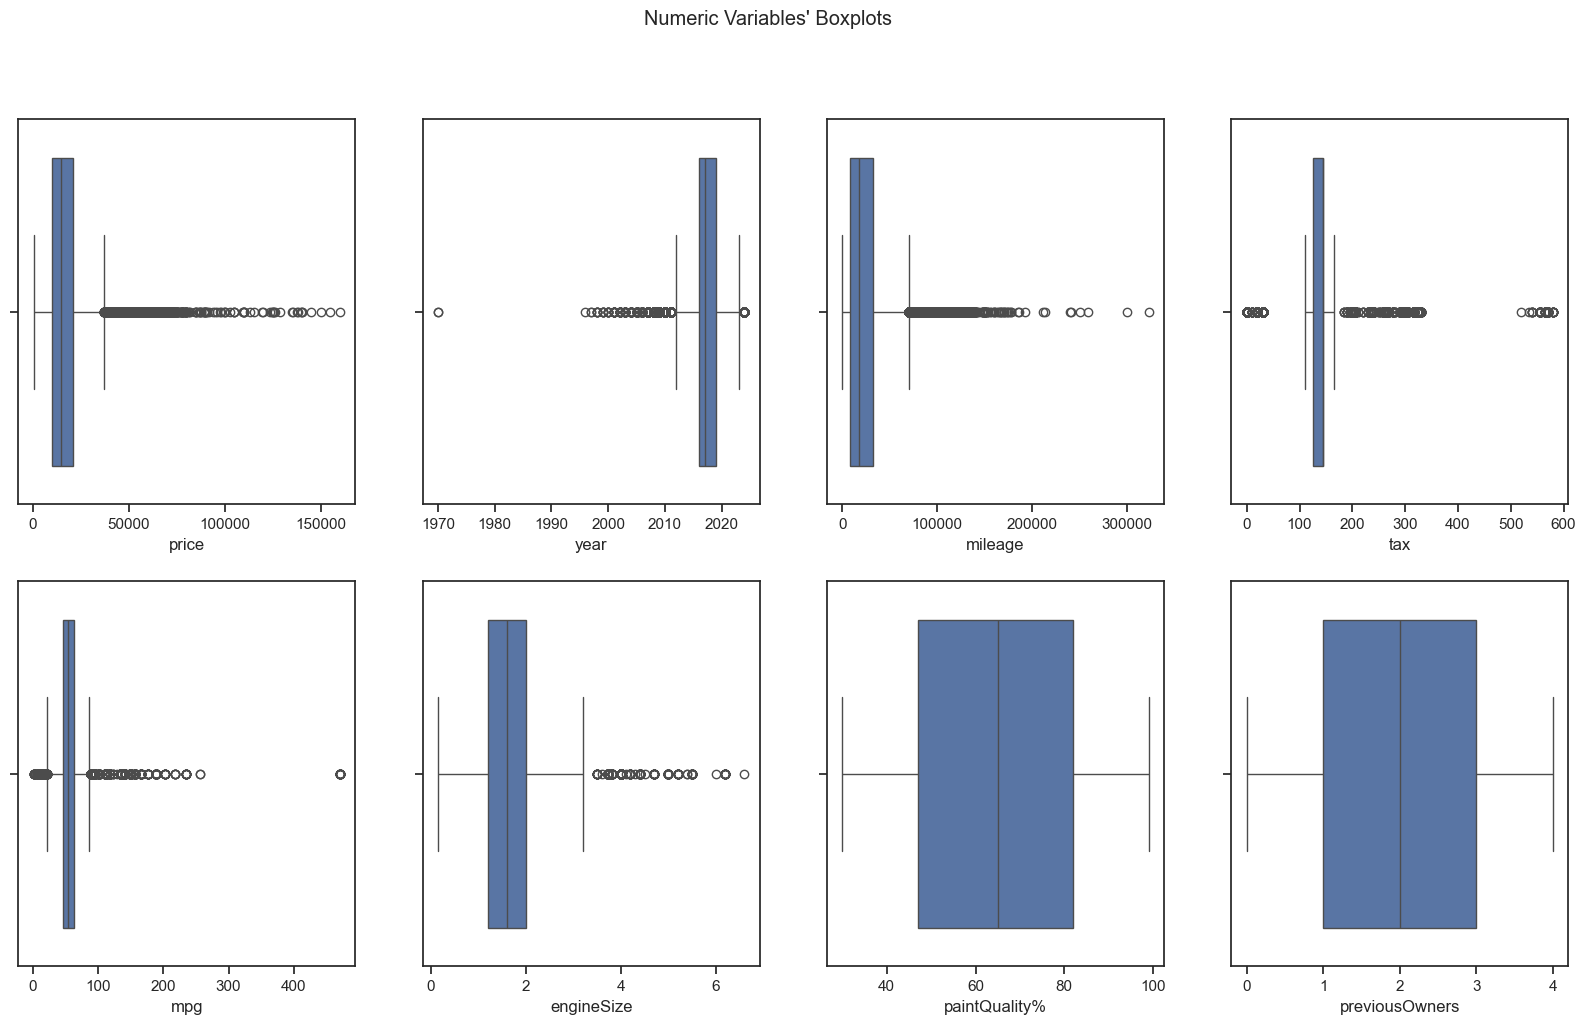

In [62]:
# Plot ALL Numeric Variables' Boxplots in one figure

sns.set_style('ticks')

sp_rows = 2
sp_cols = 4

# Prepare figure. Create individual axes where each histogram will be placed
fig, axes = plt.subplots(sp_rows, 
                         sp_cols, 
                         figsize=(20, 11))

# Plot data
# Iterate across axes objects and associate each histogram
for ax, feat in zip(axes.flatten(), metric_features): 
    sns.boxplot(x=train[feat], ax=ax)
    
# Layout
# Add a centered title to the figure:
title = "Numeric Variables' Boxplots"

plt.suptitle(title)
plt.show()

In [63]:
# One outlier from 1970 - we dont have enough examples from old cars
train.loc[train['year'] < 1980]

Brand    model    year  price transmission  mileage fuelType  \
carID                                                                         
35769  mercedes-benz  m class  1970.0  24999    automatic  14000.0   diesel   
62732           opel   zafira  1970.0  10495       manual  37357.0      NaN   

         tax   mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                                     
35769  305.0  39.2         NaN           44.0             3.0        0.0  
62732  200.0  42.2         NaN           60.0             2.0        0.0

In [64]:
# Only bmw - i3 - Whole group of cars
train.loc[train['mpg'] > 400]

Brand model    year  price transmission  mileage  fuelType    tax  \
carID                                                                     
8497    bmw    i3  2017.0  21495    automatic  24041.0    hybrid    0.0   
8993    bmw    i3  2016.0  18999    automatic   9990.0       NaN    0.0   
9196    bmw    i3  2016.0  19850    automatic  19995.0    hybrid    0.0   
9643    bmw    i3  2017.0  19948    automatic  20929.0    hybrid  135.0   
9737    bmw    i3  2014.0  14495    automatic  34539.0    hybrid    0.0   
9815    bmw    i3  2016.0  19875    automatic  20013.0       NaN    0.0   
10133   bmw    i3  2017.0  19300    automatic      NaN     other    0.0   
10327   bmw    i3  2014.0  15450    automatic  42479.0    hybrid    0.0   
10695   bmw    i3  2017.0  21494    automatic      NaN    hybrid  135.0   
10967   bmw    i3  2016.0  17000    automatic  41063.0     other    0.0   
11068   bmw    i3  2016.0  16482          NaN  43695.0    hybrid    0.0   
11532   bmw    i3  2016.0  16500    automatic  35446.0    hybrid    0.0   
11589   bmw    i3  2016.0  17100    automatic  25269.0     other    0.0   
11962   bmw    i3  2017.0  22495    automatic  21025.0    hybrid    0.0   
12090   bmw    i3  2016.0  19490    automatic   8421.0    hybrid    0.0   
12269   bmw    i3  2017.0  19980    automatic  26965.0    hybrid  140.0   
12332   bmw    i3  2015.0  14285    automatic  65800.0    hybrid    0.0   
12640   bmw    i3  2017.0  19500    automatic  23956.0     other  135.0   
12786   bmw    i3  2015.0  17400    automatic  29465.0  electric    0.0   
12853   bmw    i3  2017.0  21898    automatic  10839.0    hybrid    0.0   
13075   bmw    i3  2015.0  15498    automatic  33931.0    hybrid    0.0   
13378   bmw    i3  2015.0  17481    automatic   9886.0    hybrid    0.0   
13430   bmw    i3  2017.0  19998    automatic  41146.0    hybrid    0.0   
14531   bmw    i3  2017.0  18500    automatic  36429.0    hybrid    0.0   

         mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                               
8497   470.8         NaN           46.0             3.0        0.0  
8993   470.8         NaN           44.0             0.0        0.0  
9196   470.8         NaN           79.0             3.0        0.0  
9643   470.8         NaN           71.0             2.0        0.0  
9737   470.8         NaN           42.0             0.0        0.0  
9815   470.8         NaN           30.0             0.0        0.0  
10133  470.8    0.600000           95.0             4.0        0.0  
10327  470.8         NaN           79.0             2.0        0.0  
10695  470.8         NaN           54.0             1.0        0.0  
10967  470.8    0.600000           34.0             NaN        0.0  
11068  470.8         NaN           81.0             1.0        0.0  
11532  470.8         NaN           59.0             3.0        0.0  
11589  470.8    0.600000           97.0             0.0        0.0  
11962  470.8         NaN           66.0             0.0        0.0  
12090  470.8         NaN           31.0             4.0        0.0  
12269  470.8         NaN           81.0             3.0        0.0  
12332  470.8         NaN           50.0             3.0        0.0  
12640  470.8    0.600000           53.0             1.0        0.0  
12786  470.8    3.822758           67.0             2.0        0.0  
12853  470.8         NaN           31.0             4.0        0.0  
13075  470.8         NaN           31.0             4.0        0.0  
13378  470.8         NaN           44.0             0.0        0.0  
13430  470.8         NaN           69.0             1.0        0.0  
14531  470.8         NaN           30.0             2.0        0.0

In [65]:
#not weird
train.loc[train['mileage'] > 200000]

Brand      model    year  price transmission   mileage  \
carID                                                                   
4692            audi         a6  2008.0   2490       manual  323000.0   
9978             bmw         x5  2012.0   7250    automatic  214000.0   
39946  mercedes-benz    a class  2016.0  16249          NaN  240494.0   
45370  mercedes-benz    v class  2010.0   6949    automatic  259000.0   
48042          skoda    octavia  2010.0   1485       manual  250650.0   
48382          skoda    octavia  2010.0   1190       manual  300000.0   
48912          skoda    octavia     NaN   2750    automatic  241565.0   
74387     volkswagen  caravelle  2012.0  11995          NaN  212000.0   

      fuelType    tax   mpg  engineSize  paintQuality%  previousOwners  \
carID                                                                    
4692    diesel  200.0  44.1         2.0           74.0             1.0   
9978    diesel  300.0  37.7         3.0           68.0             1.0   
39946   diesel   20.0  68.9         2.1           81.0             4.0   
45370   diesel  540.0  30.7         3.0           54.0             1.0   
48042   diesel  125.0  57.6         1.9           62.0             1.0   
48382   diesel  125.0  57.6         1.9           79.0             2.0   
48912   diesel  185.0  47.9         1.9           33.0             4.0   
74387   diesel  325.0  34.4         2.0           42.0             2.0   

       hasDamage  
carID             
4692         0.0  
9978         0.0  
39946        0.0  
45370        0.0  
48042        0.0  
48382        0.0  
48912        0.0  
74387        0.0

In [66]:
# seems fine
train.loc[train['tax'] > 400].sample(9)

Brand    model    year  price transmission   mileage fuelType  \
carID                                                                          
34814  mercedes-benz      slk  2006.0   4995    automatic   75000.0   petrol   
6094            audi       r8  2008.0  33950    automatic   52500.0   petrol   
43212  mercedes-benz  g class  2013.0  45000    automatic   52438.0   diesel   
45763  mercedes-benz  m class  2010.0  12995    automatic   46000.0   diesel   
10614            bmw       m5  2016.0  35995    automatic   39200.0   petrol   
45370  mercedes-benz  v class  2010.0   6949    automatic  259000.0   diesel   
45573  mercedes-benz  m class  2008.0   6495    semi-auto   96000.0   diesel   
3596            audi      rs6  2014.0  44491    automatic   43752.0   petrol   
5096            audi       q7  2012.0  17999    automatic   65675.0   diesel   

         tax   mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                                     
34814  555.0  28.0         NaN           46.0             2.0        0.0  
6094   580.0  21.0         4.2           88.0             4.0        0.0  
43212  580.0  25.2         3.0           84.0             4.0        0.0  
45763  555.0  31.0         3.0           77.0             NaN        0.0  
10614  555.0  28.5         4.4           54.0             0.0        0.0  
45370  540.0  30.7         3.0           54.0             1.0        0.0  
45573  565.0  28.8         3.0           86.0             0.0        0.0  
3596   555.0  28.8         4.0           71.0             3.0        0.0  
5096   555.0  28.5         4.1           96.0             3.0        0.0

In [67]:
#seems fine
train.loc[train['tax'] < 100].sample(9)

Brand        model    year  price transmission  mileage  \
carID                                                                    
43778  mercedes-benz      e class  2016.0  17490    semi-auto  54280.0   
50092          skoda       citigo  2013.0   5000          NaN  39669.0   
11315            bmw     3 series  2016.0  11300    automatic  73178.0   
75631     volkswagen         golf  2017.0  16490       manual   9456.0   
19593           ford         kuga  2016.0  11998       manual  28989.0   
38750  mercedes-benz    gla class  2015.0  15800    automatic  12641.0   
22056           ford  grand c-max  2016.0  11390    automatic      NaN   
71588     volkswagen           up  2017.0   8950       manual  26104.0   
68616     volkswagen         golf  2017.0  14500       manual  62465.0   

      fuelType   tax   mpg  engineSize  paintQuality%  previousOwners  \
carID                                                                   
43778   diesel  20.0  72.4         2.0           71.0             0.0   
50092   petrol   0.0  68.9         1.0           85.0             1.0   
11315   diesel  20.0  70.6         2.0           76.0             4.0   
75631   petrol  20.0  60.1         1.4           61.0             3.0   
19593   diesel  30.0  64.2         1.5           44.0             4.0   
38750   diesel  20.0  62.8         2.1           72.0             0.0   
22056   diesel  30.0  58.9         1.5           64.0             4.0   
71588   petrol  20.0  64.2         1.0           60.0             2.0   
68616   diesel  20.0  67.3         2.0           81.0             3.0   

       hasDamage  
carID             
43778        0.0  
50092        0.0  
11315        0.0  
75631        0.0  
19593        0.0  
38750        0.0  
22056        0.0  
71588        0.0  
68616        0.0

In [68]:
#seems fine
train.loc[train['engineSize'] > 4].sample(9)

Brand      model    year  price transmission  mileage fuelType  \
carID                                                                           
45815  mercedes-benz        clk  2002.0   3790    automatic  98000.0   petrol   
42778  mercedes-benz  gle class  2018.0  66974    automatic  16592.0   petrol   
9498             bmw         x5  2017.0  36898    automatic  28193.0   petrol   
13249            bmw         x5  2017.0  38000    automatic   9038.0   petrol   
18865           ford    mustang  2017.0  31317    semi-auto   9511.0   petrol   
12984            bmw         m5  2015.0  29795    automatic  28500.0   petrol   
46249  mercedes-benz    s class  2016.0  31000    automatic  15000.0   petrol   
29963           ford    mustang  2019.0  39995    automatic    800.0      NaN   
11111            bmw         m5  2019.0  61797    semi-auto   4419.0   petrol   

         tax   mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                                     
45815  325.0  24.6         5.0           67.0             0.0        NaN  
42778  145.0  23.7         5.5           44.0             4.0        0.0  
9498   150.0  29.1         4.4           44.0             1.0        0.0  
13249  150.0  29.1         4.4           61.0             2.0        0.0  
18865  145.0  23.5         5.0           99.0             NaN        0.0  
12984  565.0  28.5         4.4           89.0             1.0        0.0  
46249  300.0  33.6         4.7           36.0             0.0        0.0  
29963  145.0  22.1         5.0           81.0             0.0        0.0  
11111  145.0  26.9         4.4           86.0             0.0        0.0

### 2.2.2 Bivariate Analysis

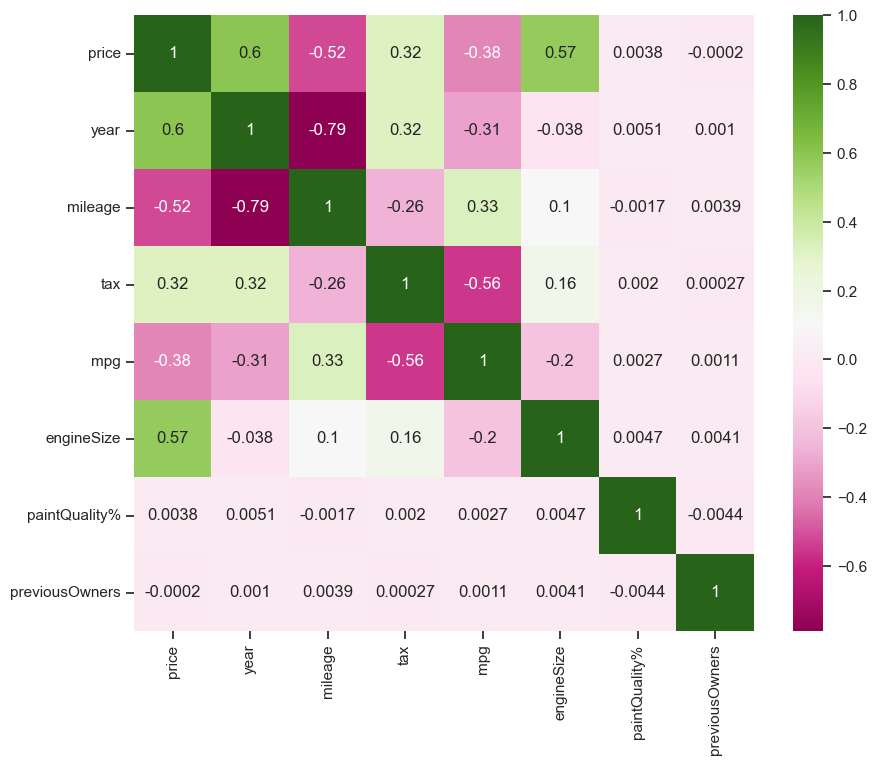

In [69]:
fig = plt.figure(figsize=(10, 8))
threshold = 0.3

corr = train[metric_features].corr(method="spearman")

annot = corr.round(2).astype(str)
annot_masked = annot.where(corr.abs() >= threshold, '') 

sns.heatmap(data=corr,annot= True, cmap = 'PiYG')

plt.show()

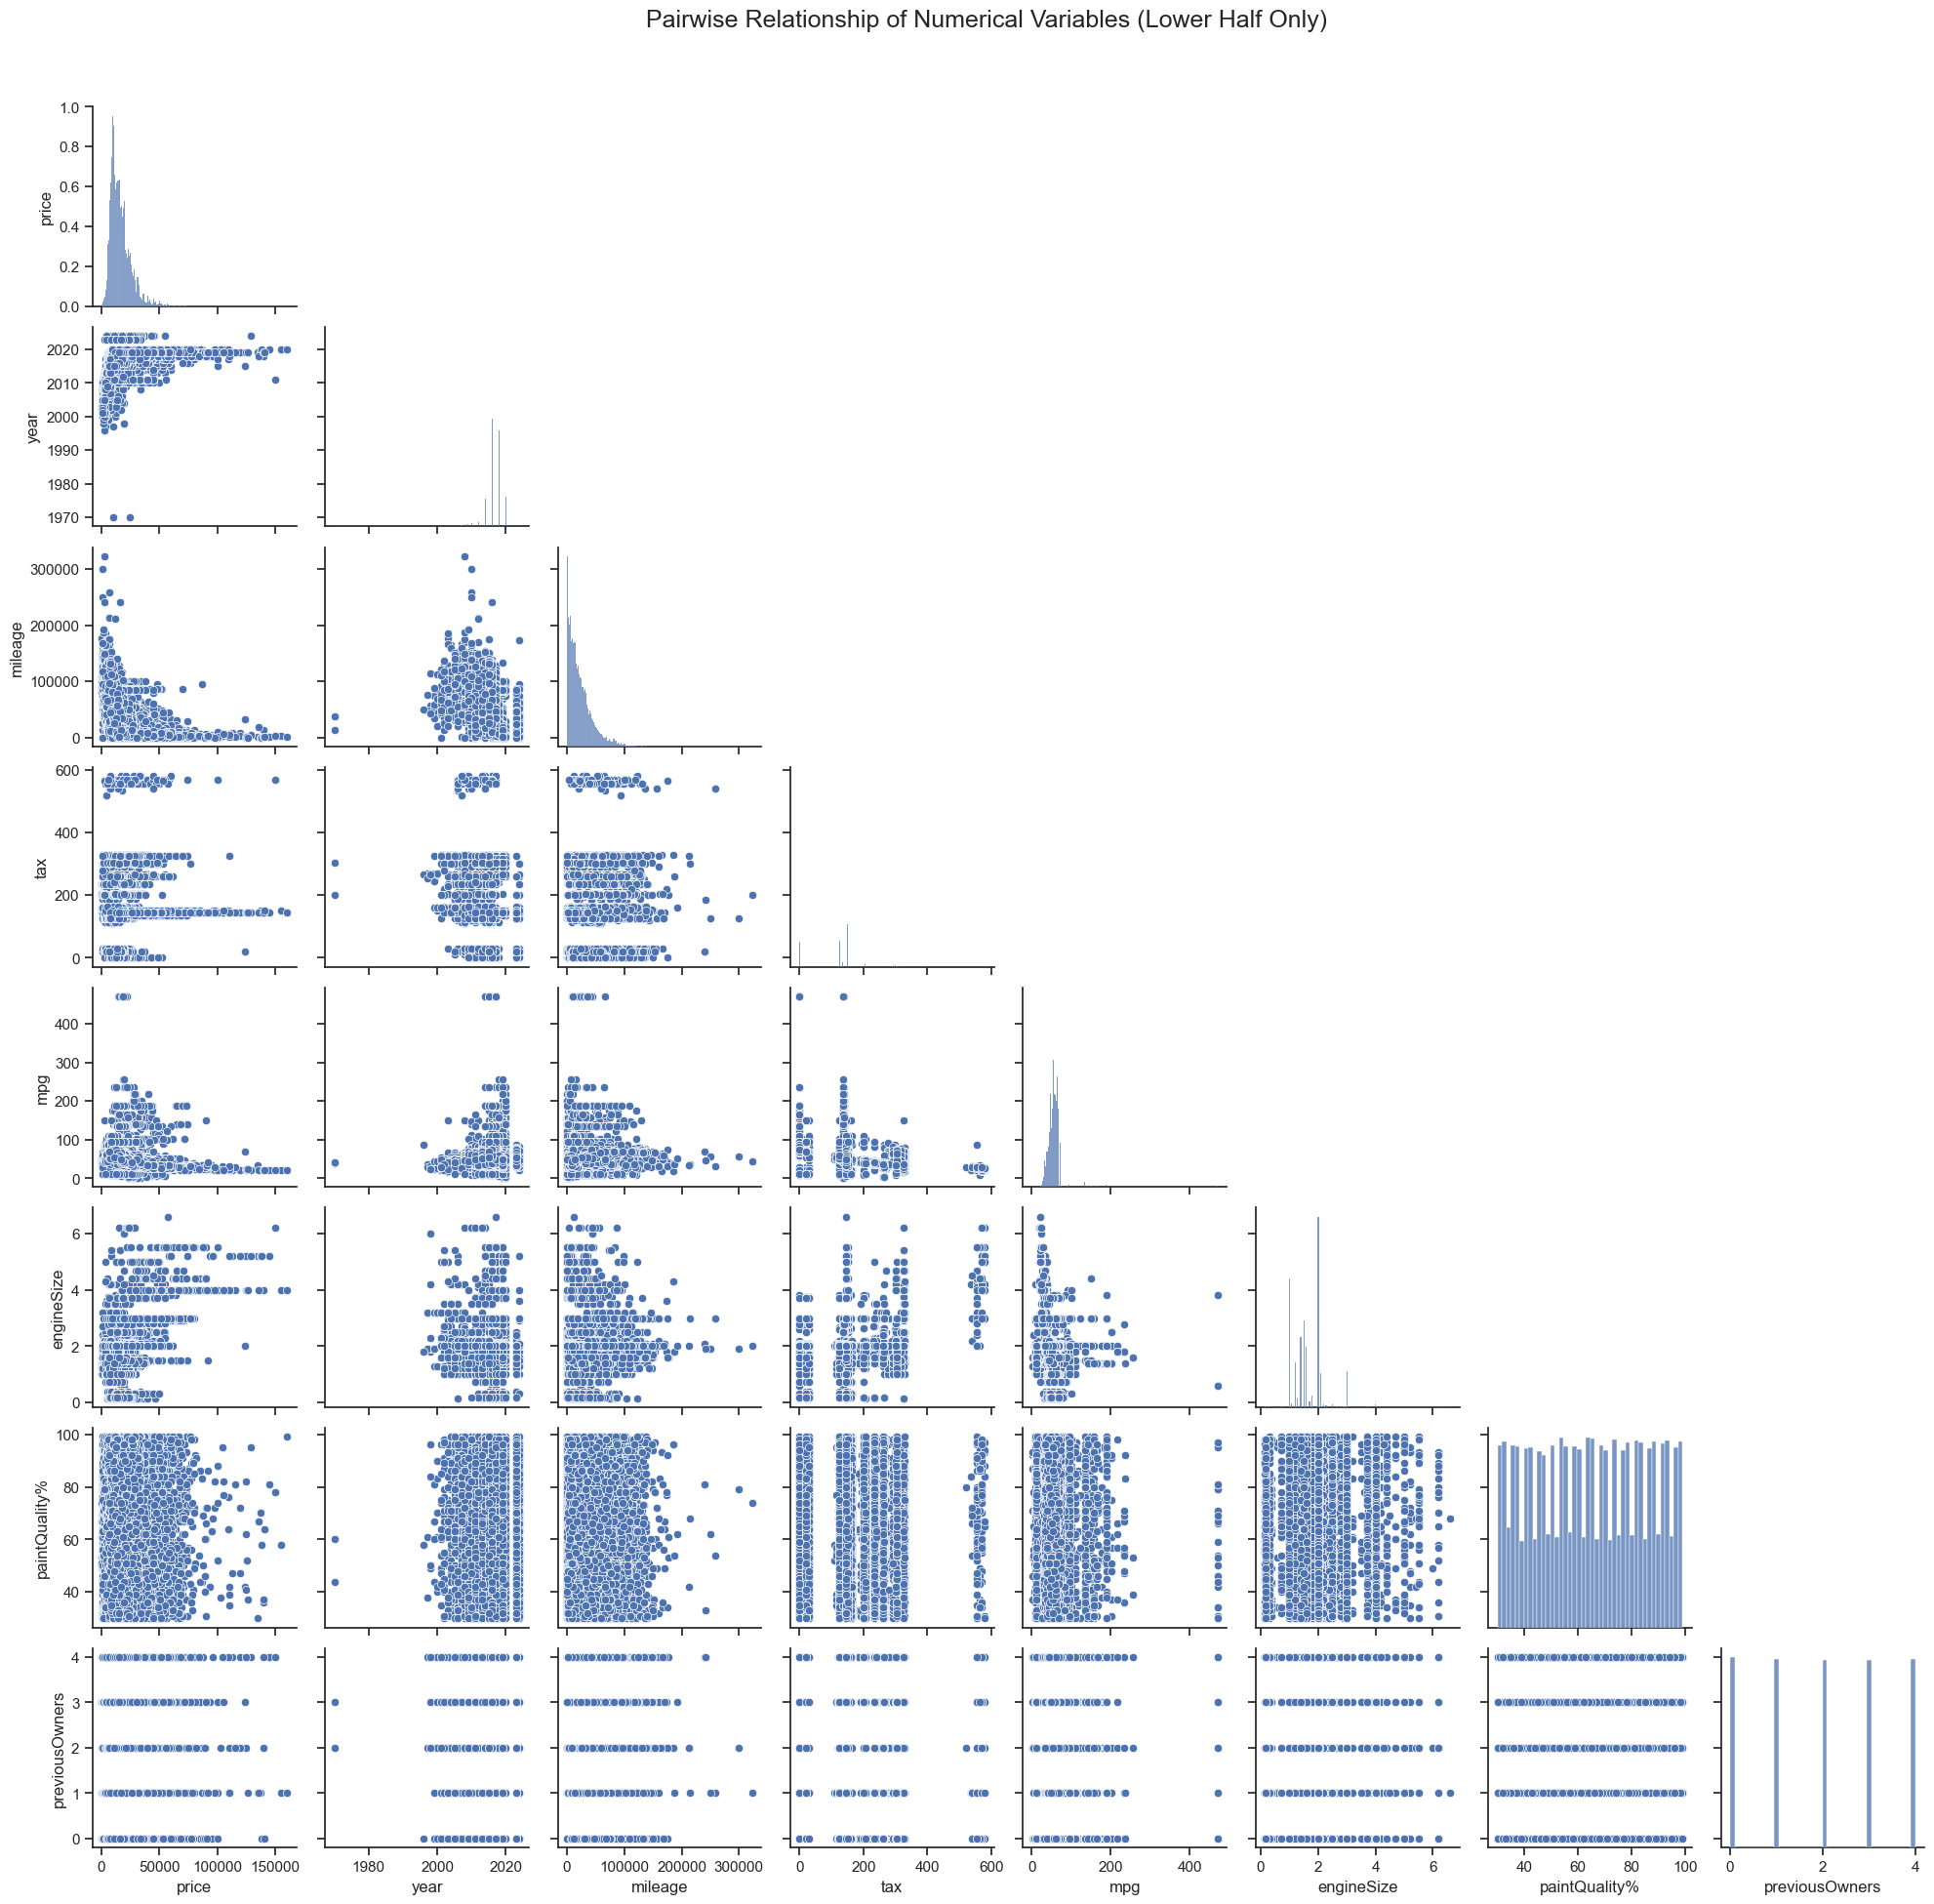

In [70]:
sns.set_style("ticks")

num_cols = len(metric_features)

g = sns.PairGrid(train[metric_features], diag_sharey=False)
g.map_lower(sns.scatterplot)
g.map_diag(sns.histplot, kde=False)

for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

plt.subplots_adjust(top=0.93)
g.fig.suptitle("Pairwise Relationship of Numerical Variables (Lower Half Only)", fontsize=18)

plt.show()

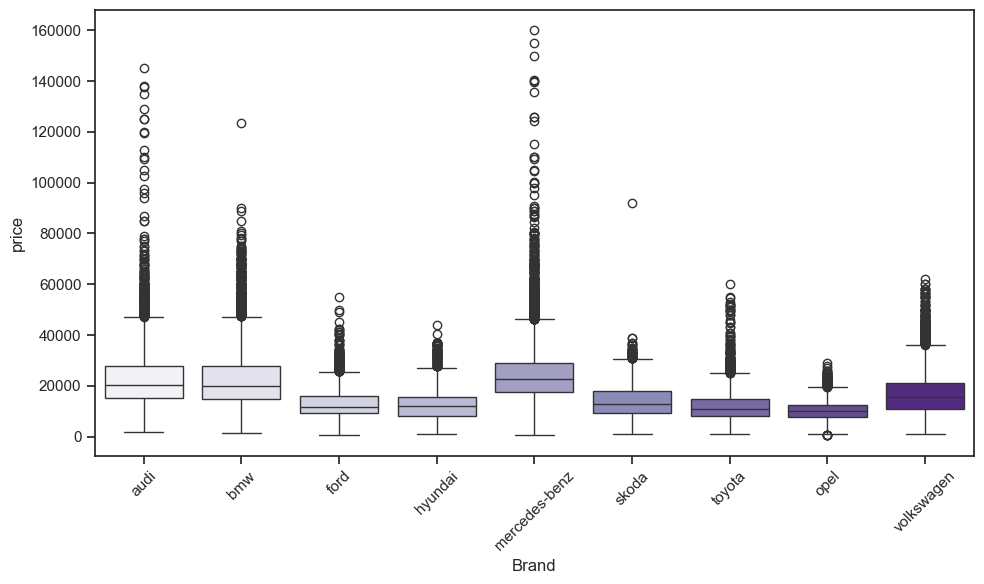

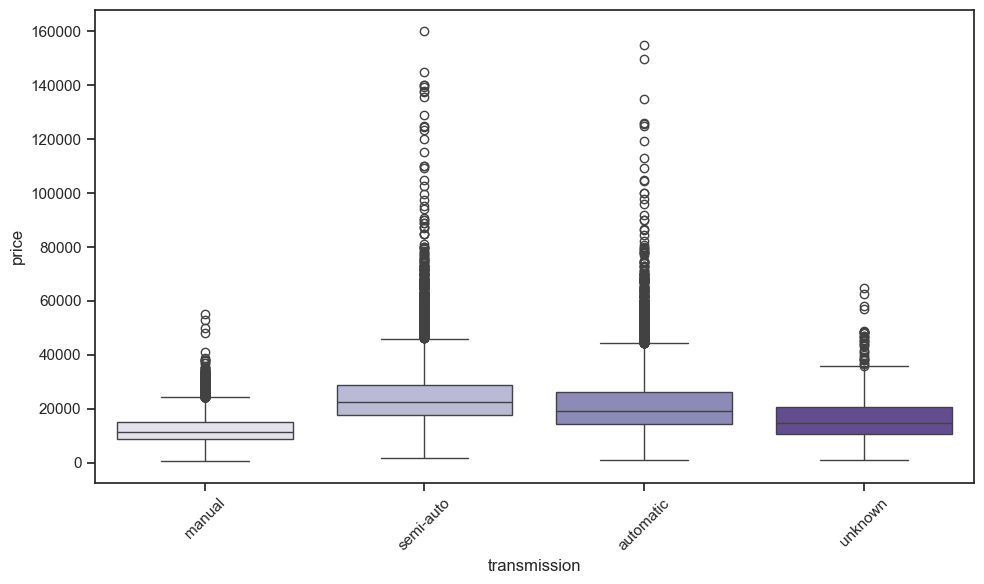

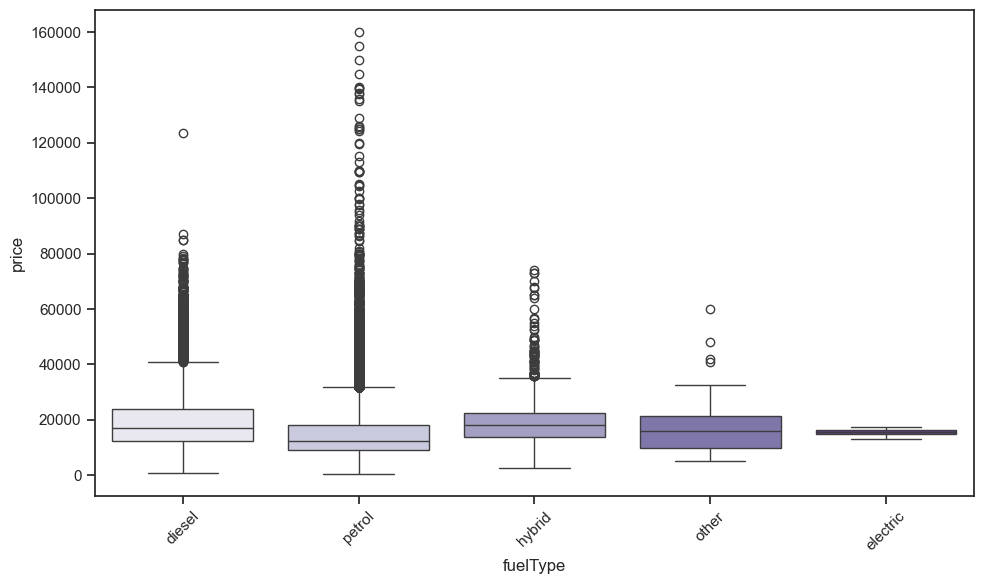

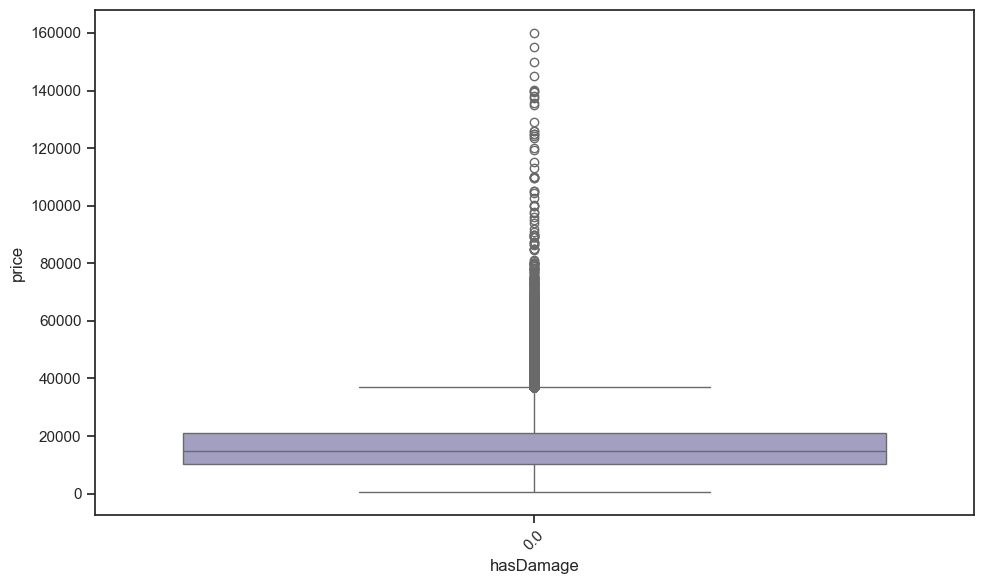

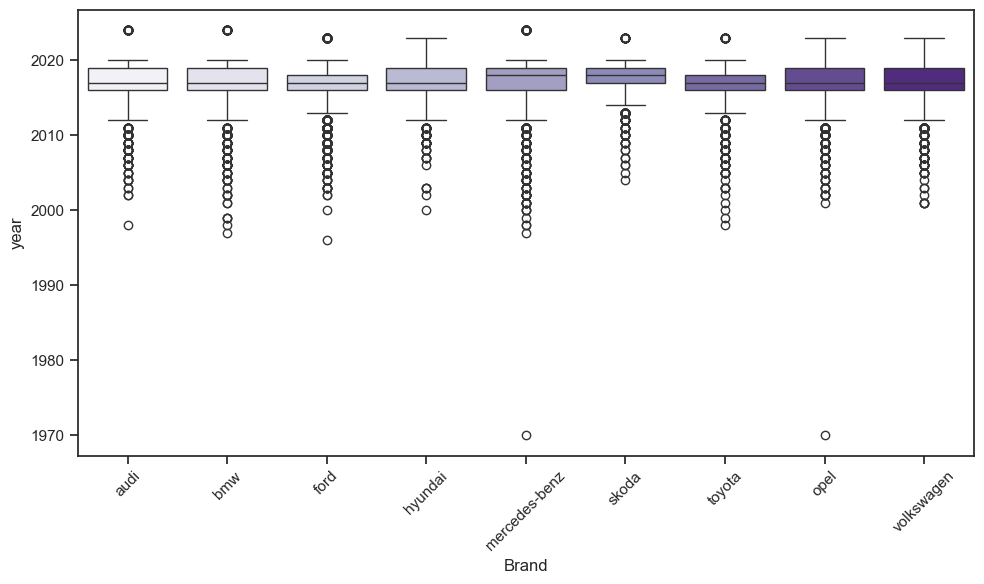

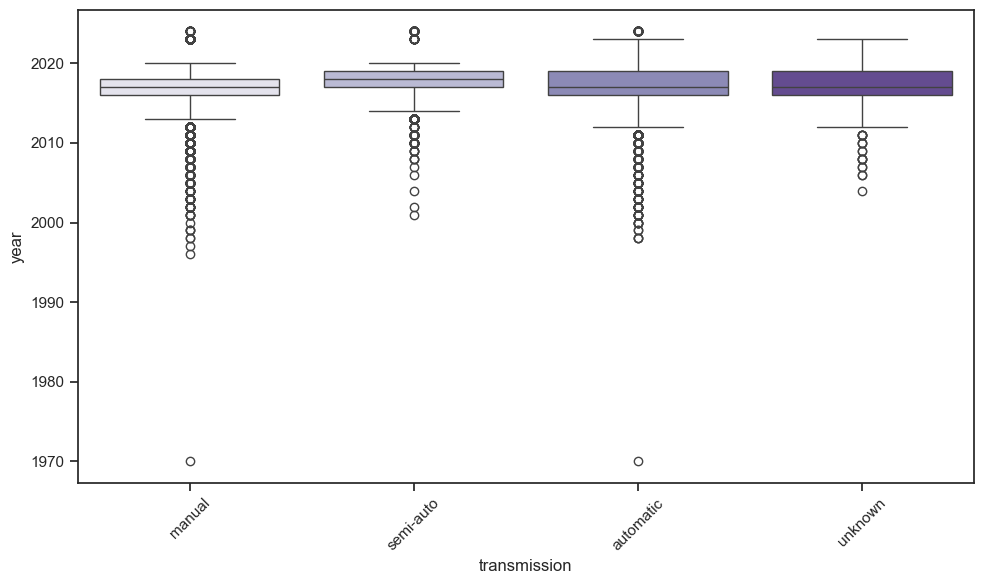

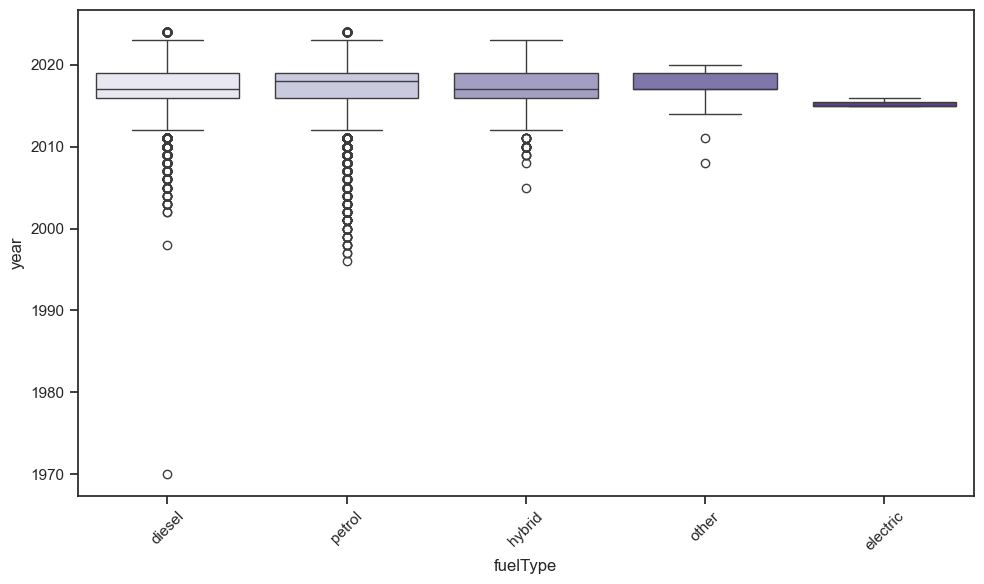

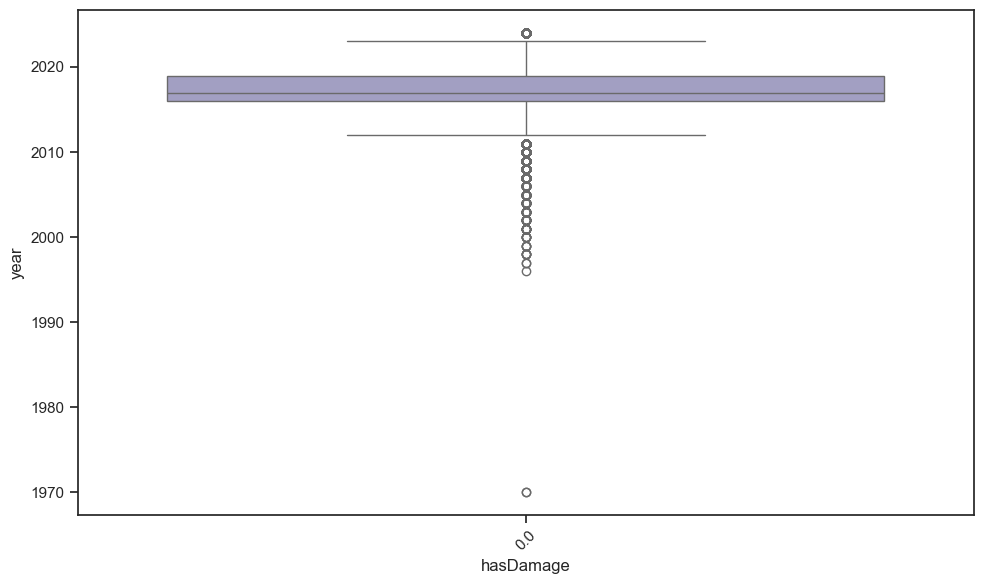

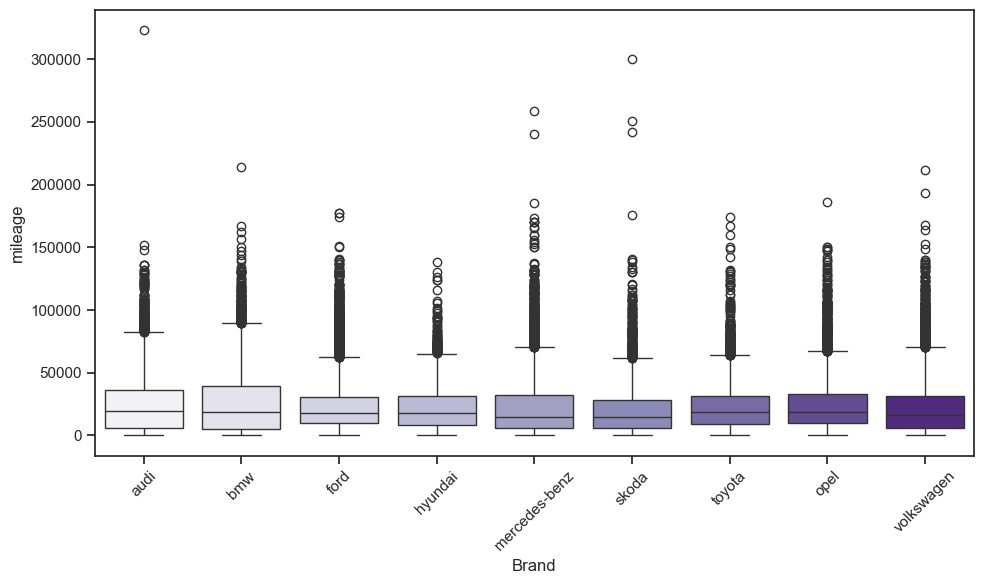

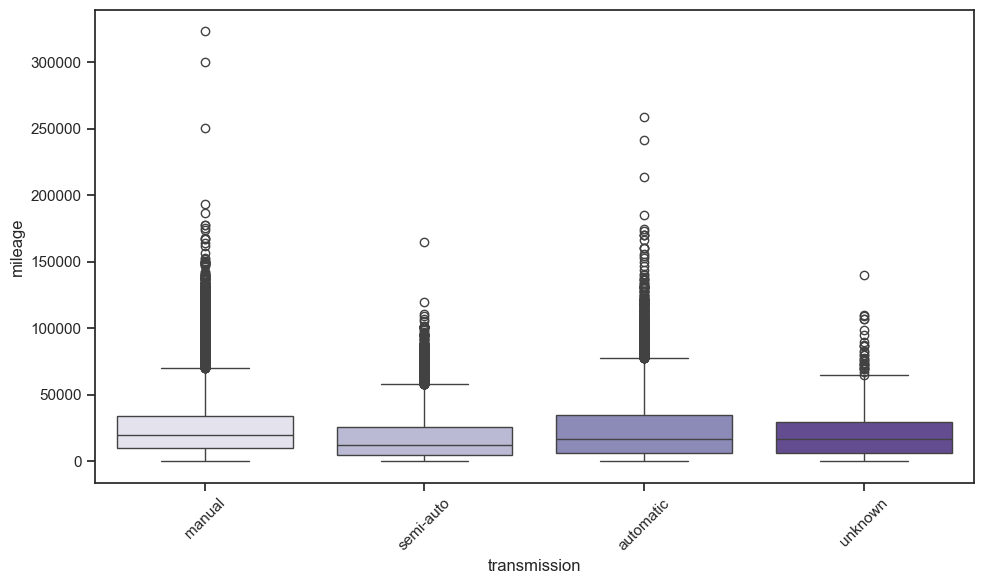

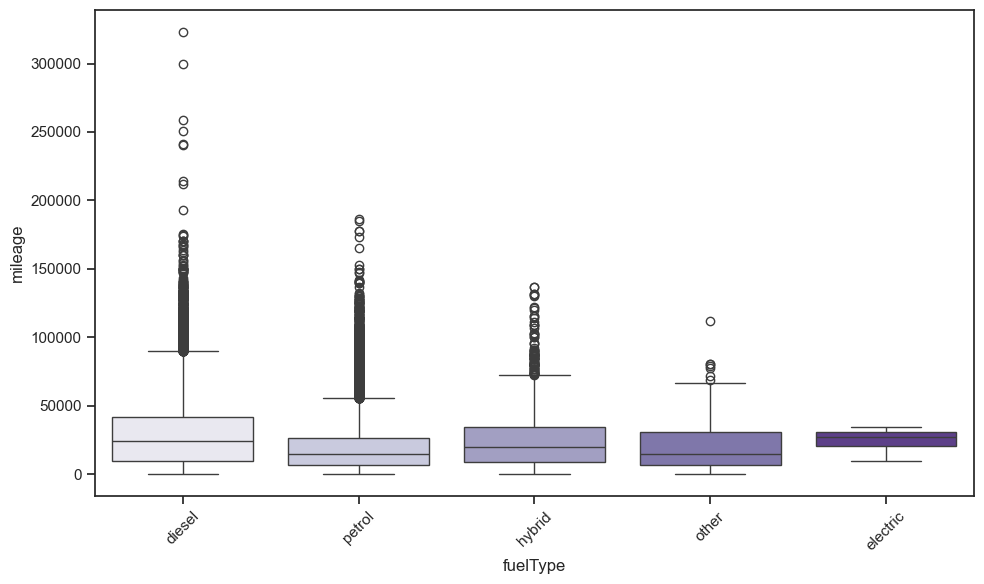

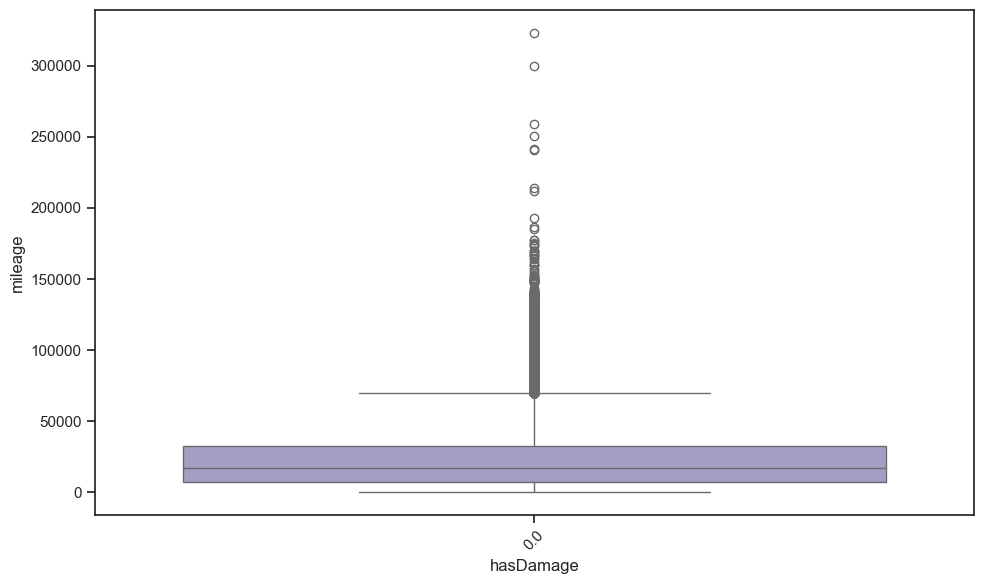

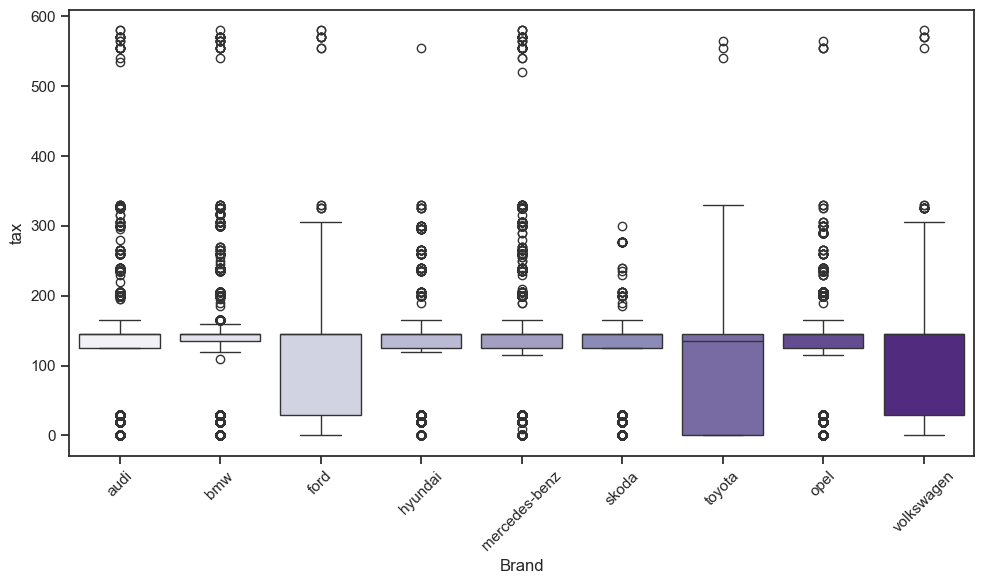

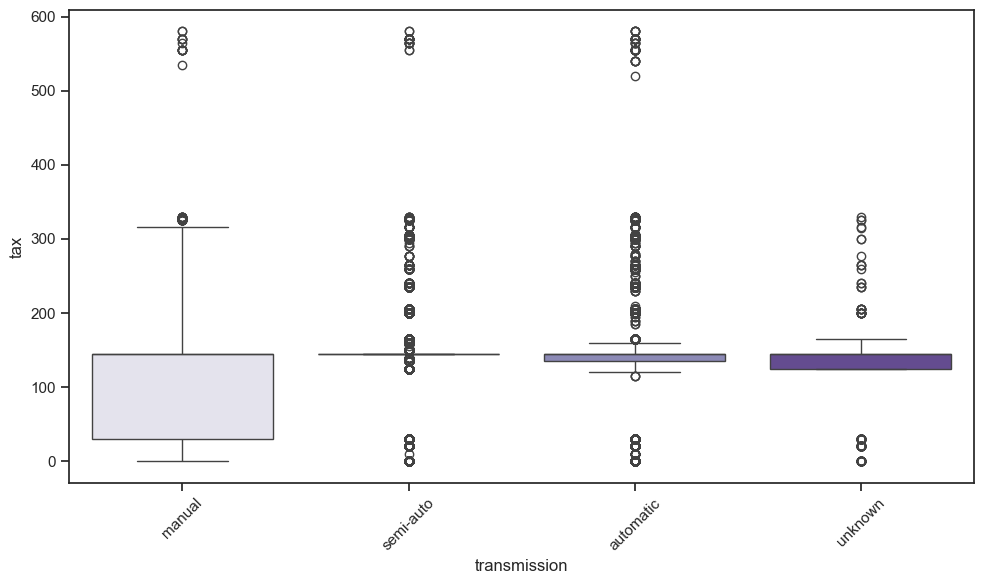

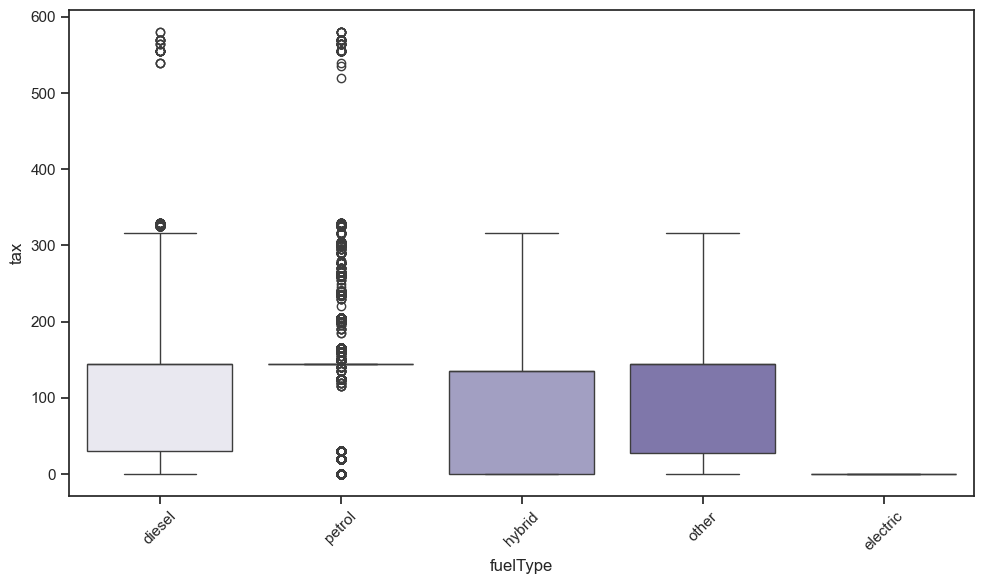

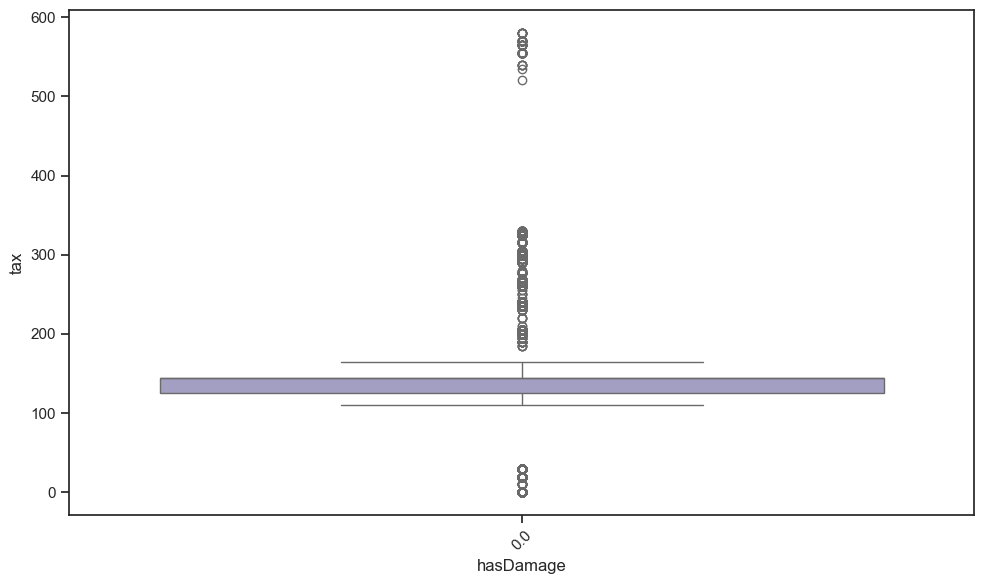

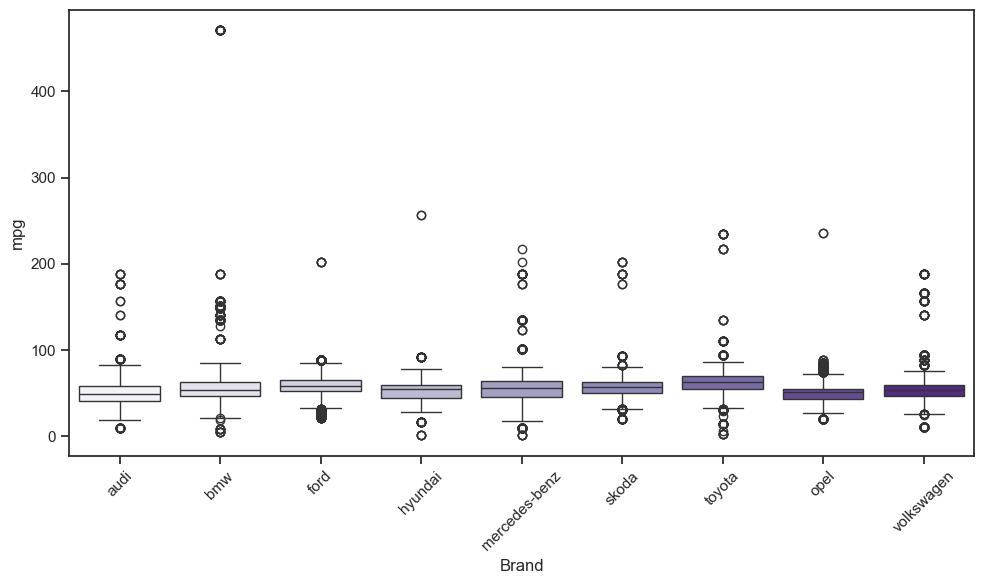

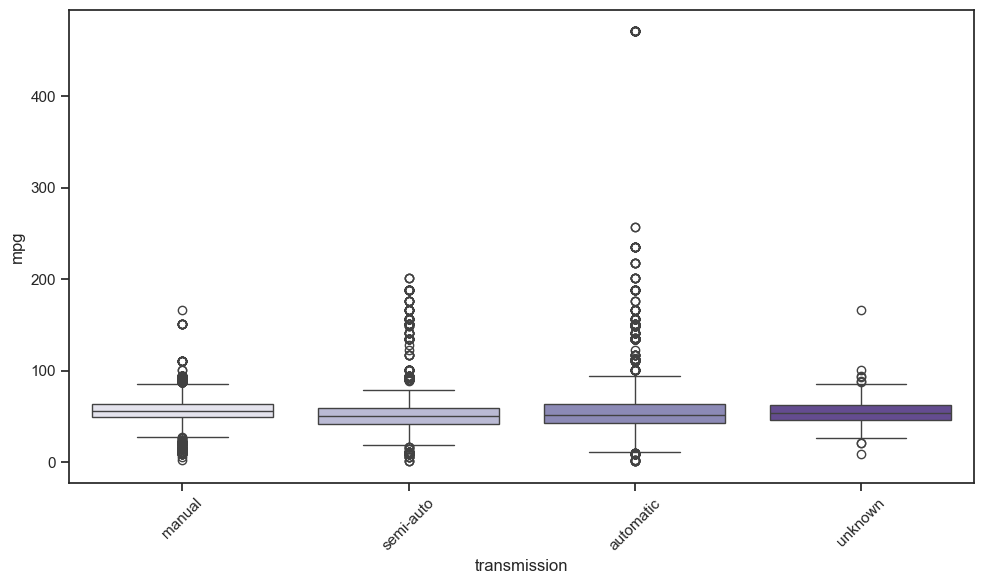

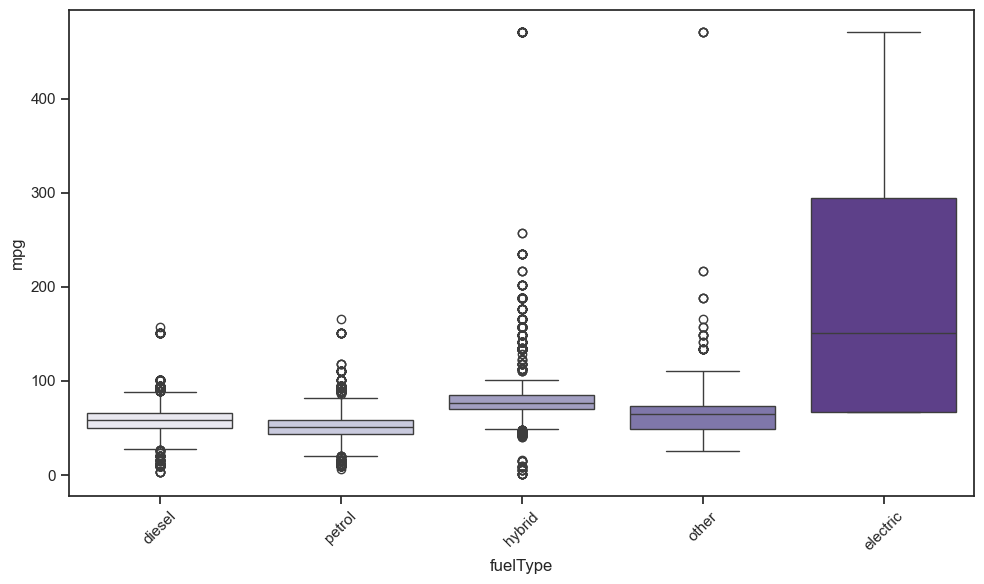

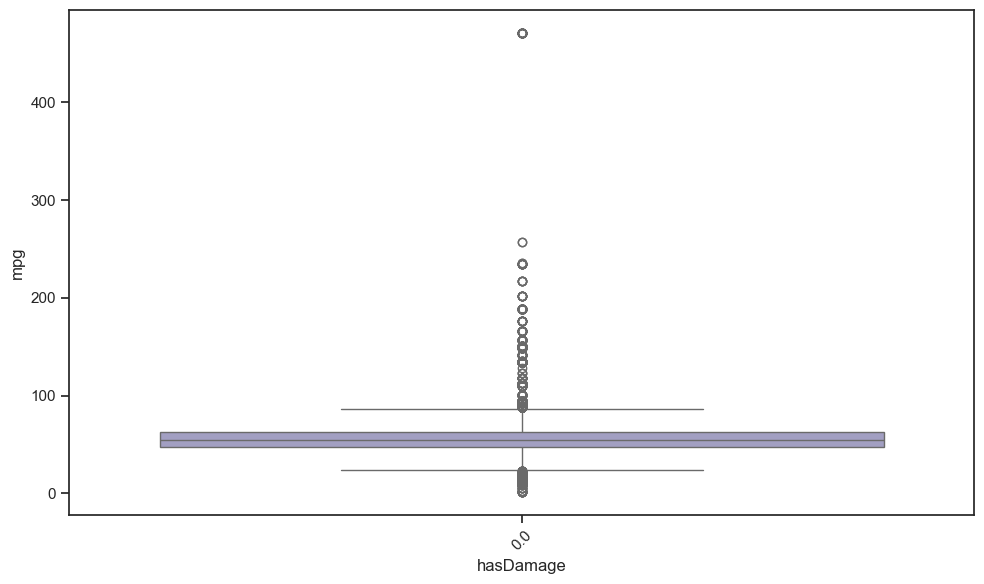

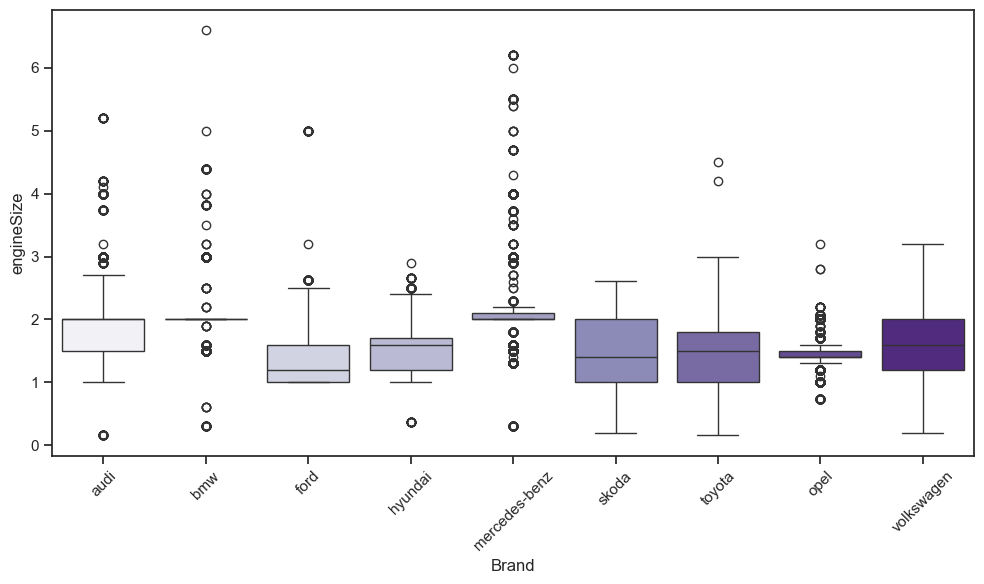

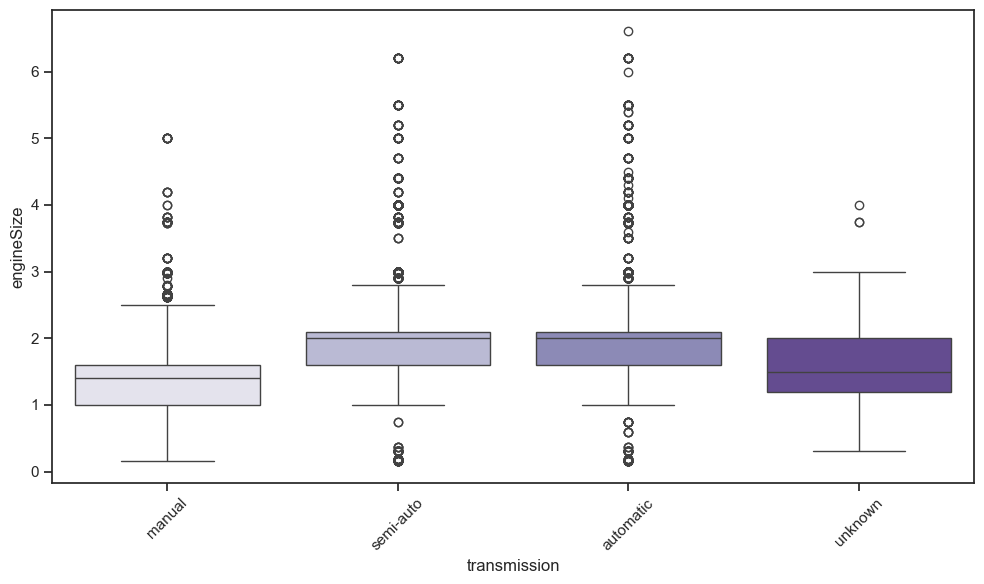

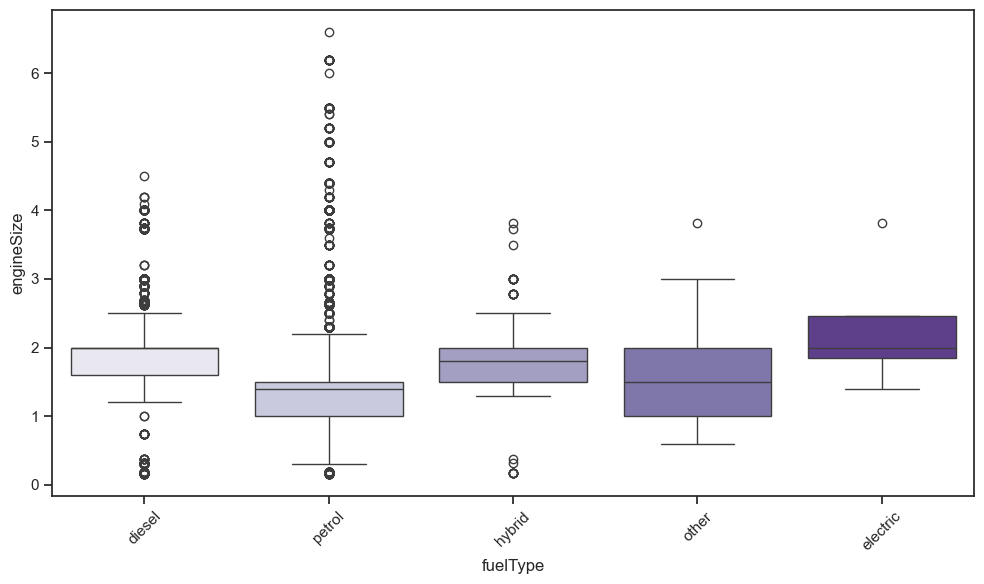

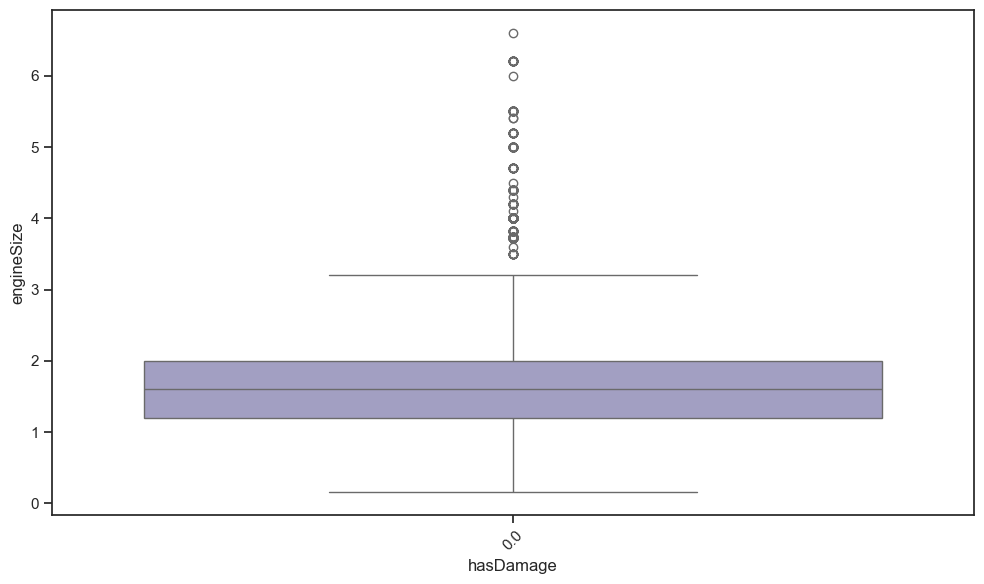

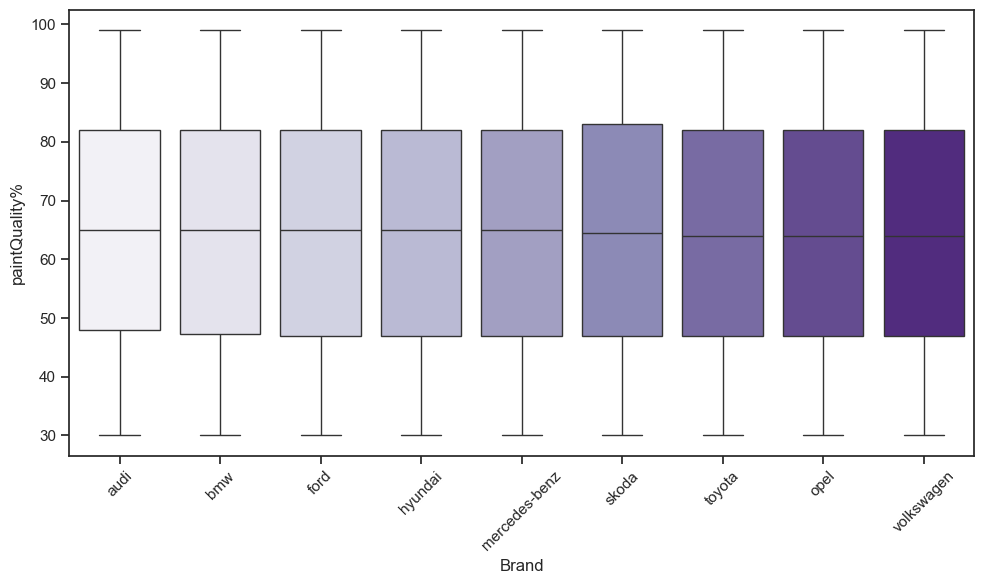

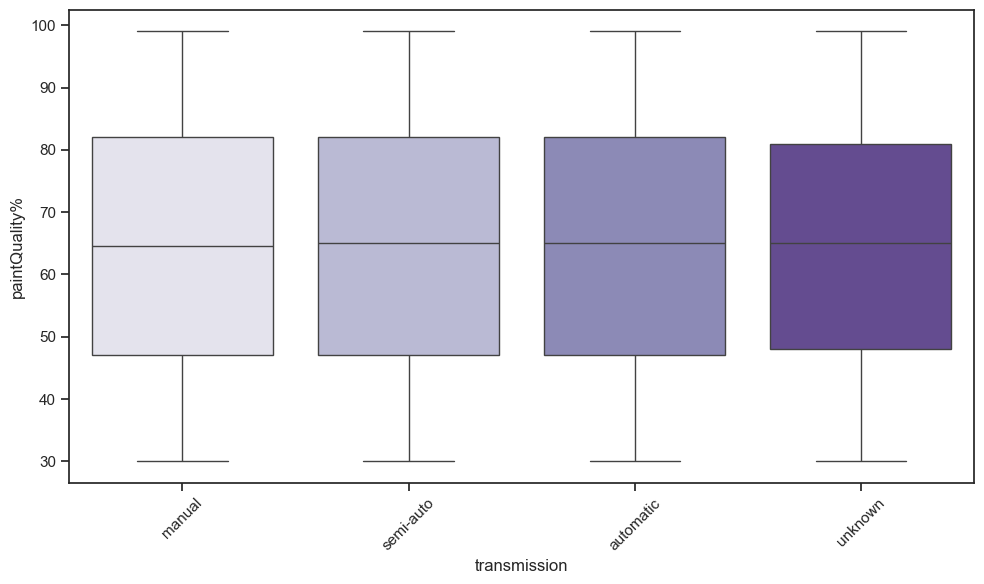

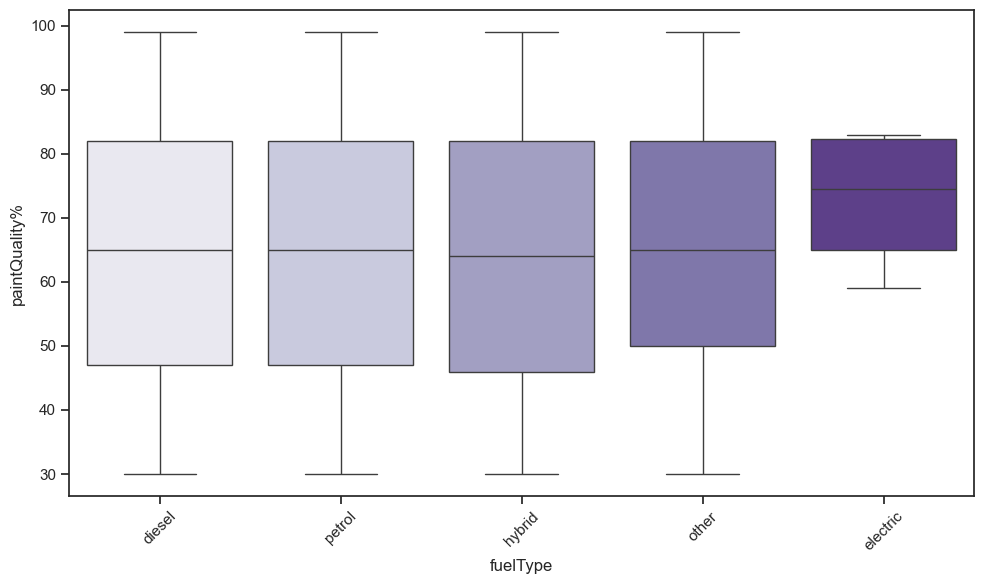

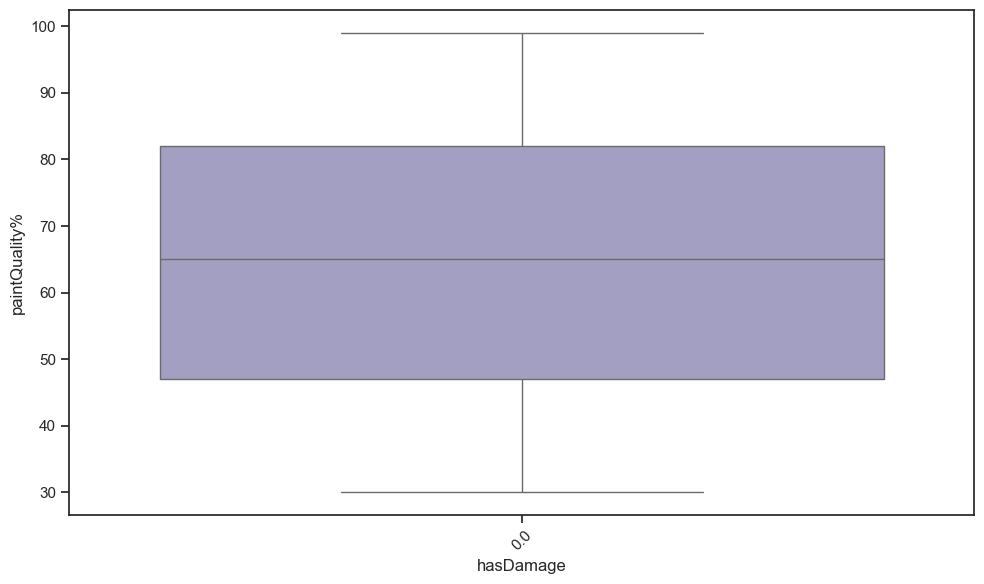

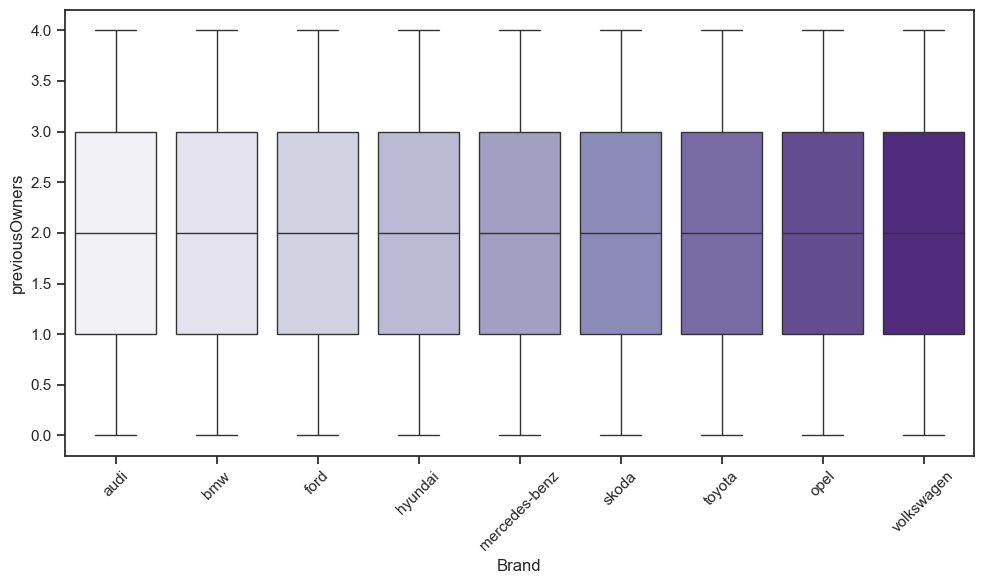

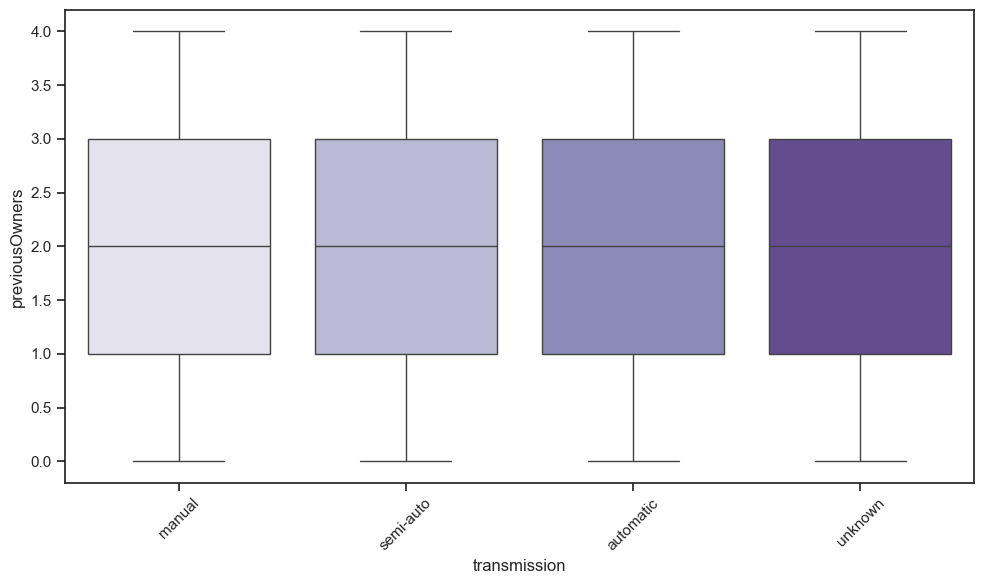

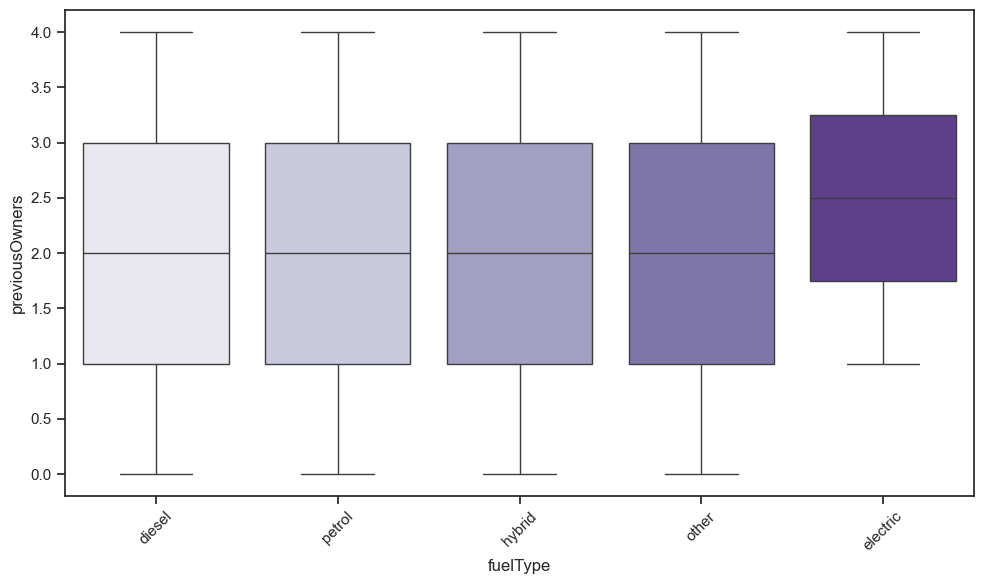

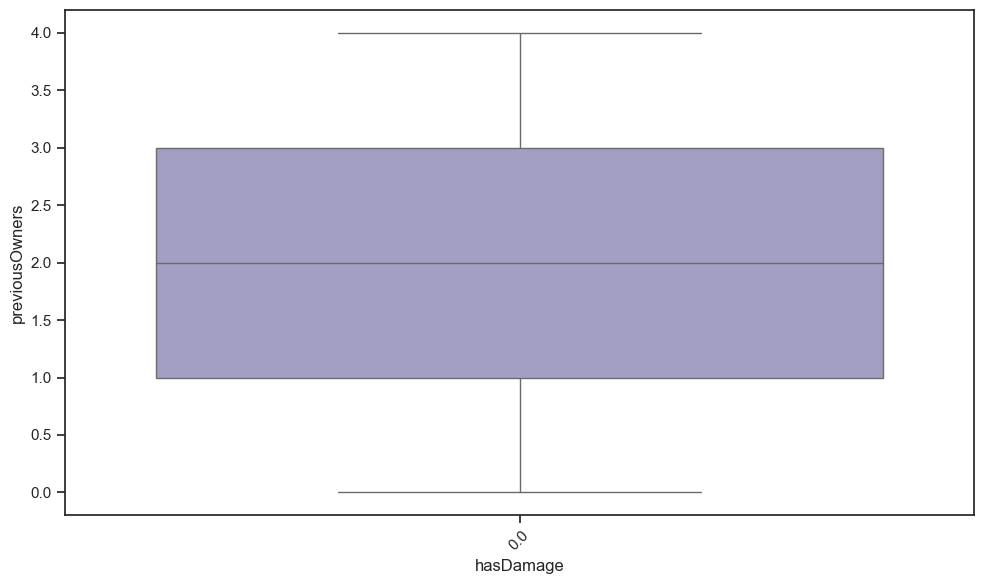

In [71]:
for column in metric_features:
    for x in [f for f in non_metric_features if f != 'model']:
        comparative_boxplot(train, x, column)


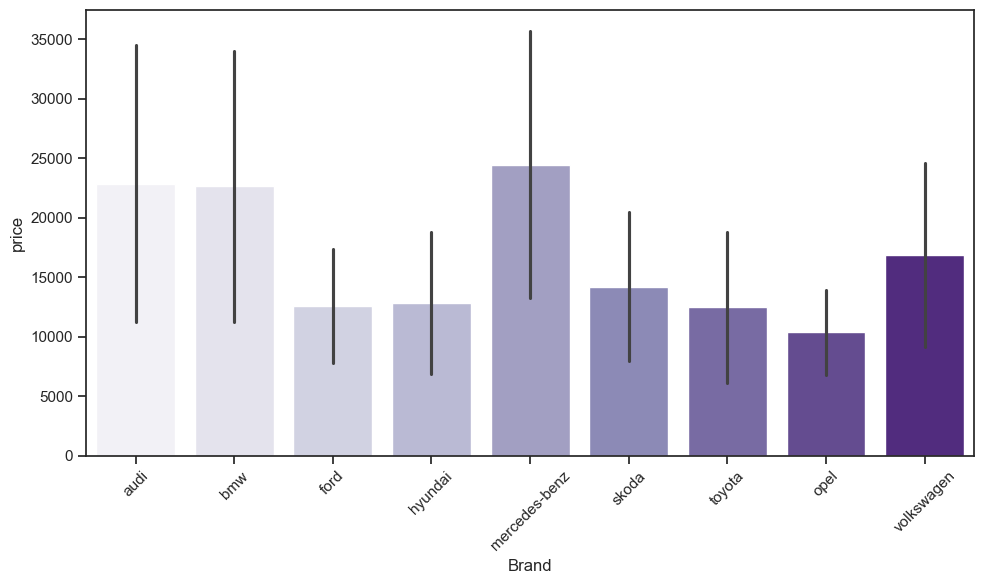

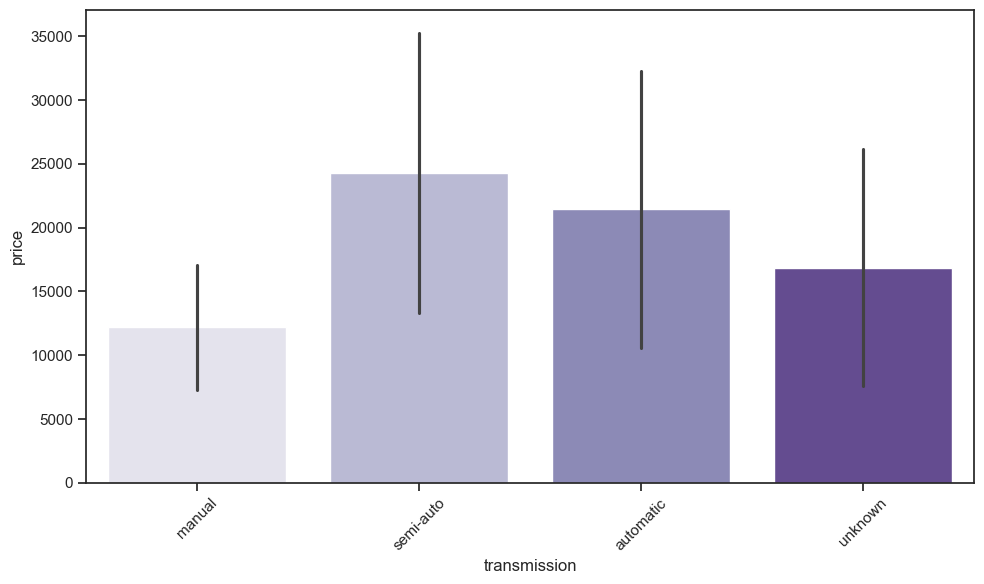

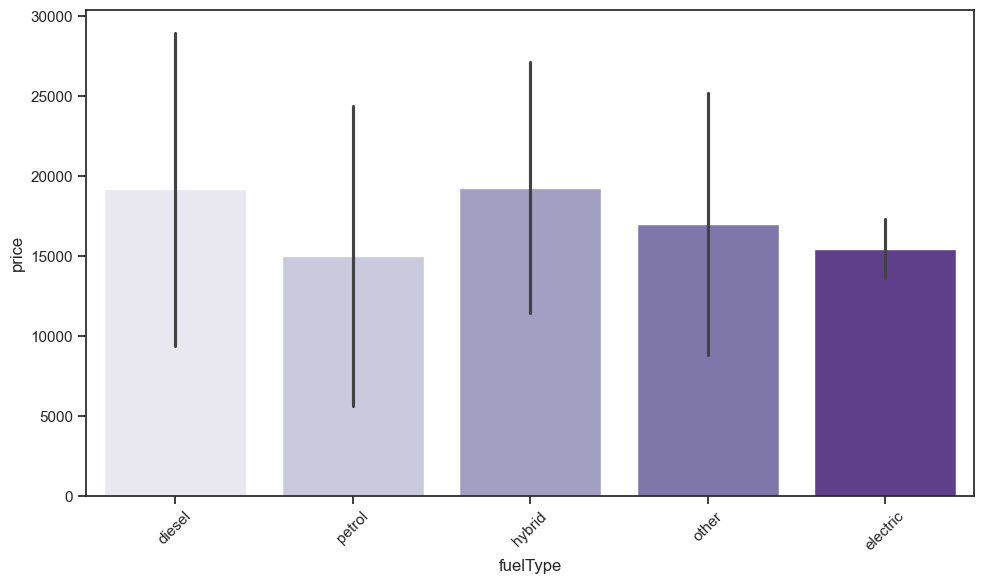

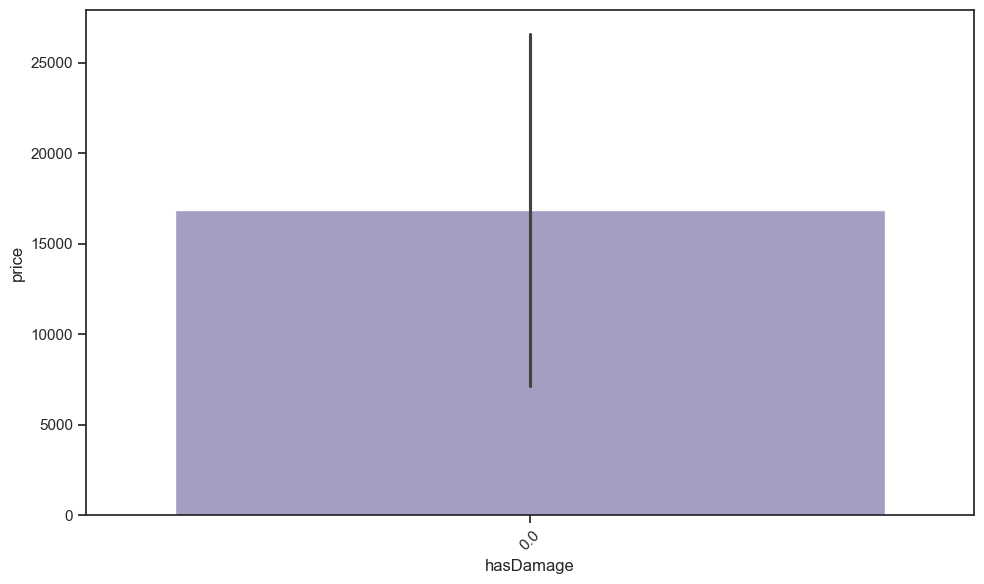

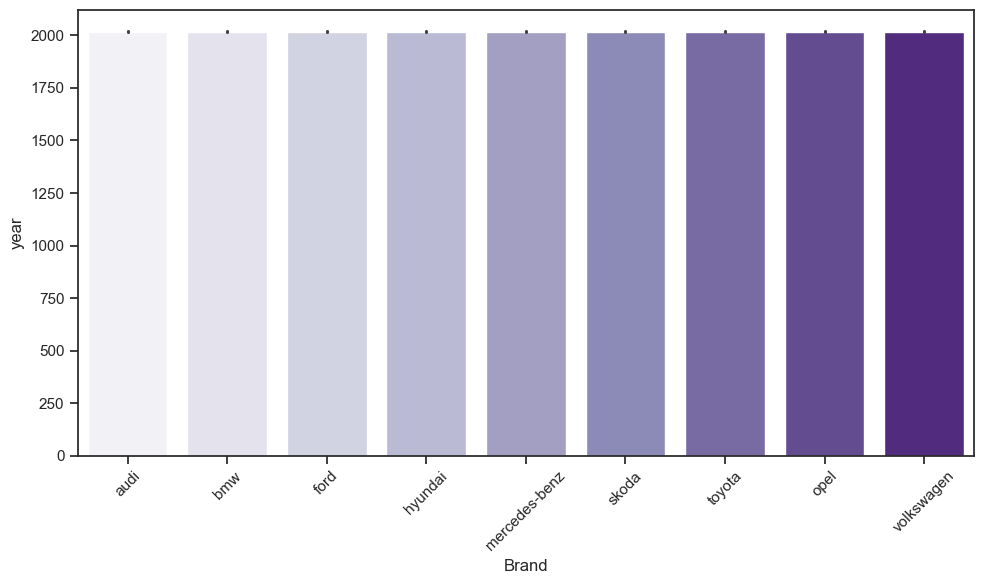

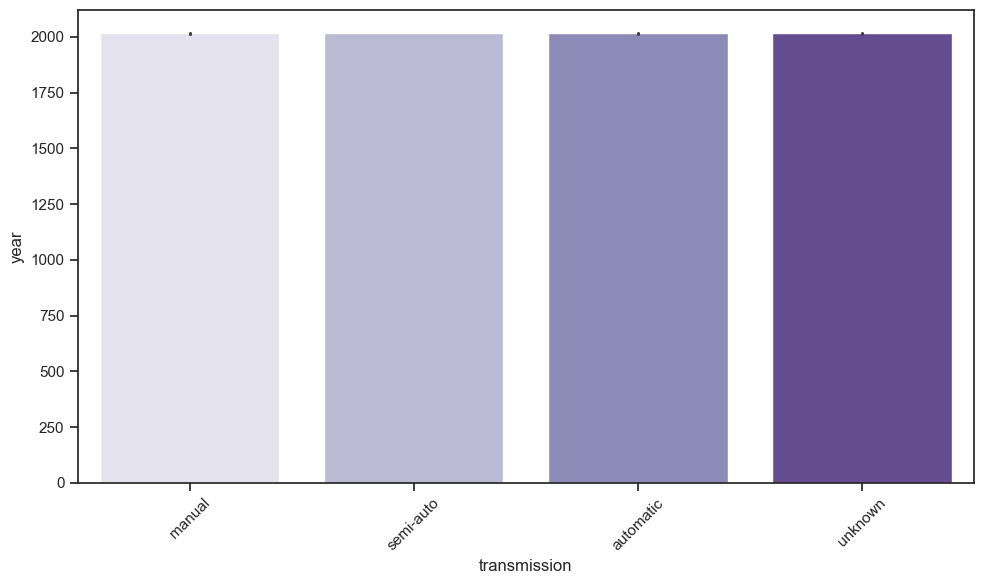

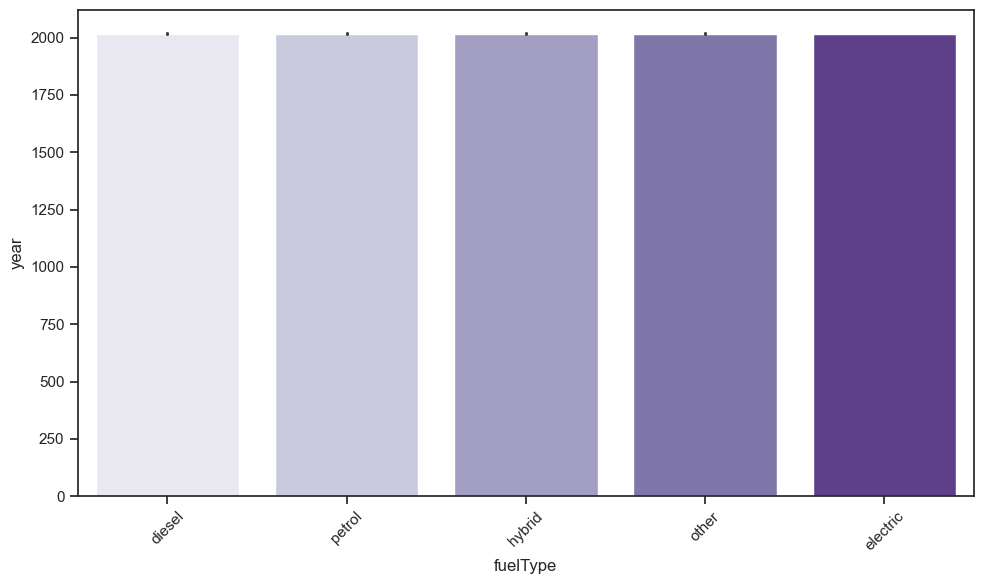

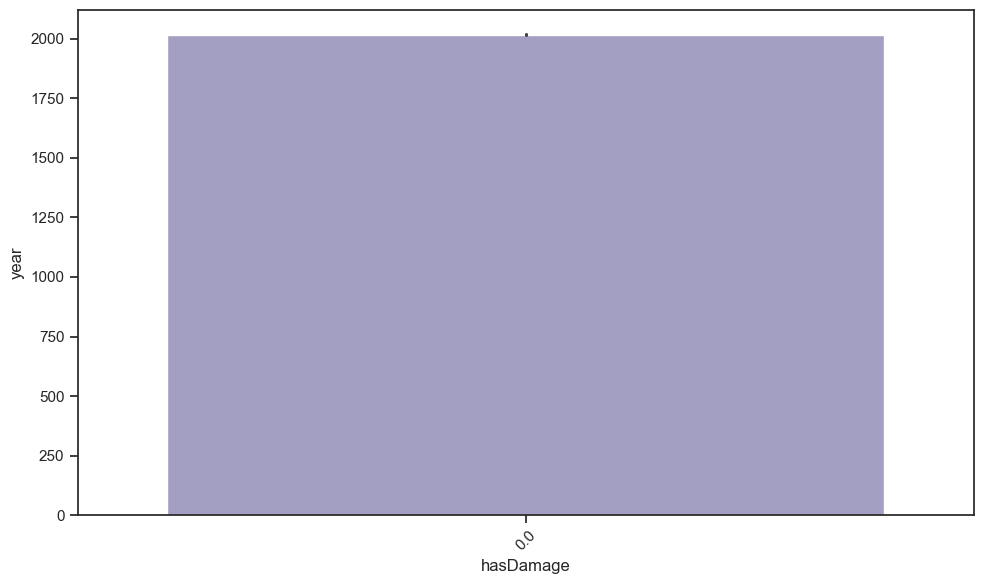

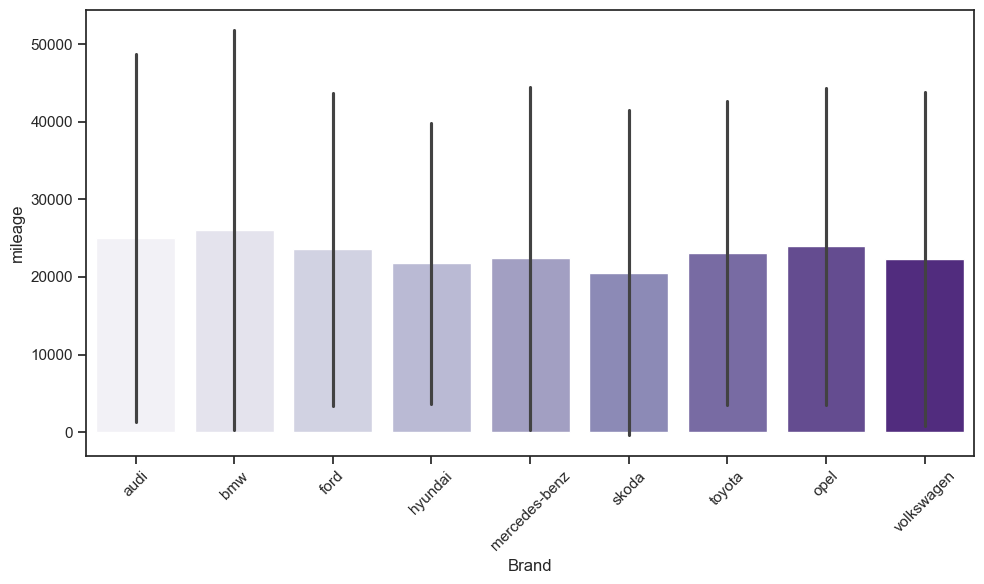

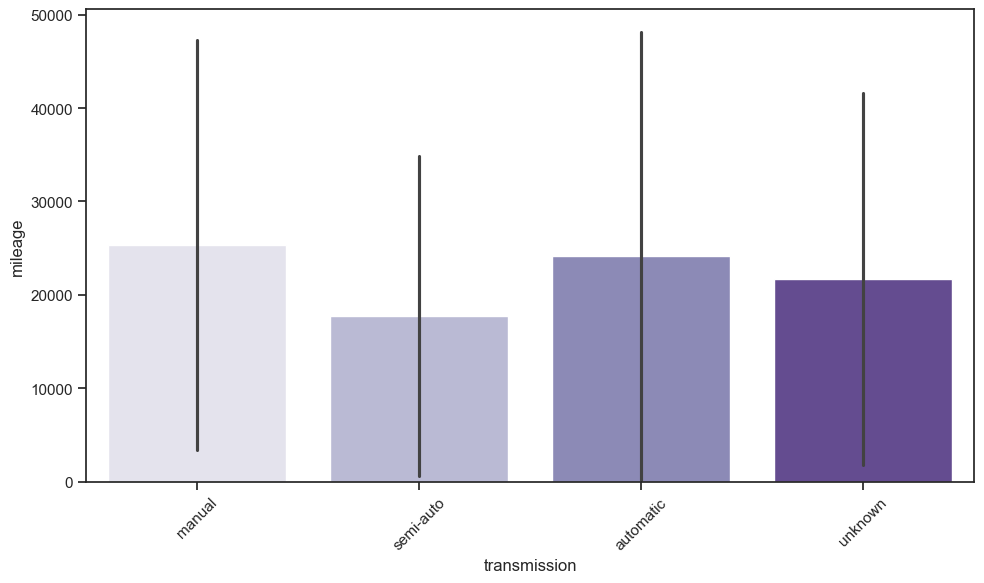

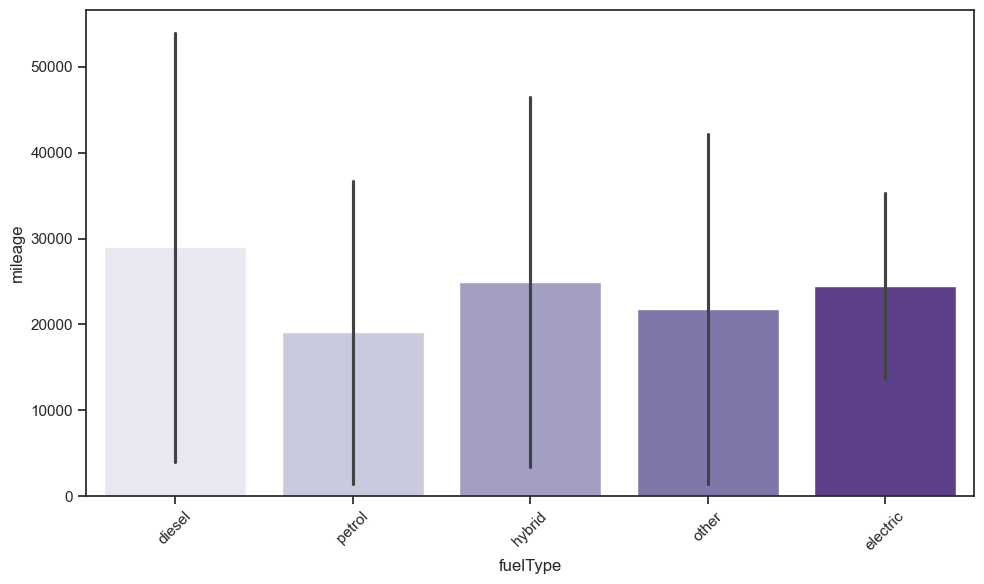

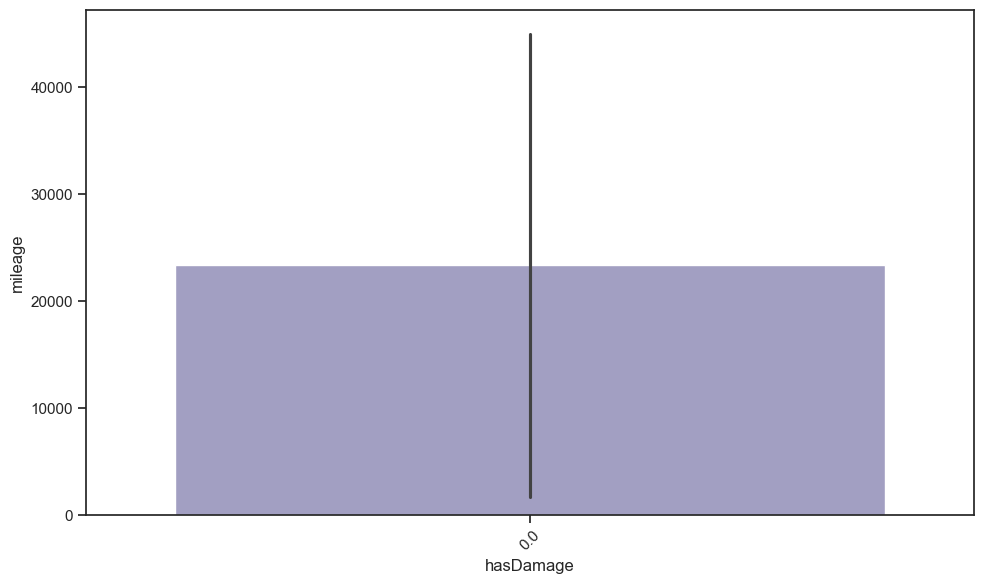

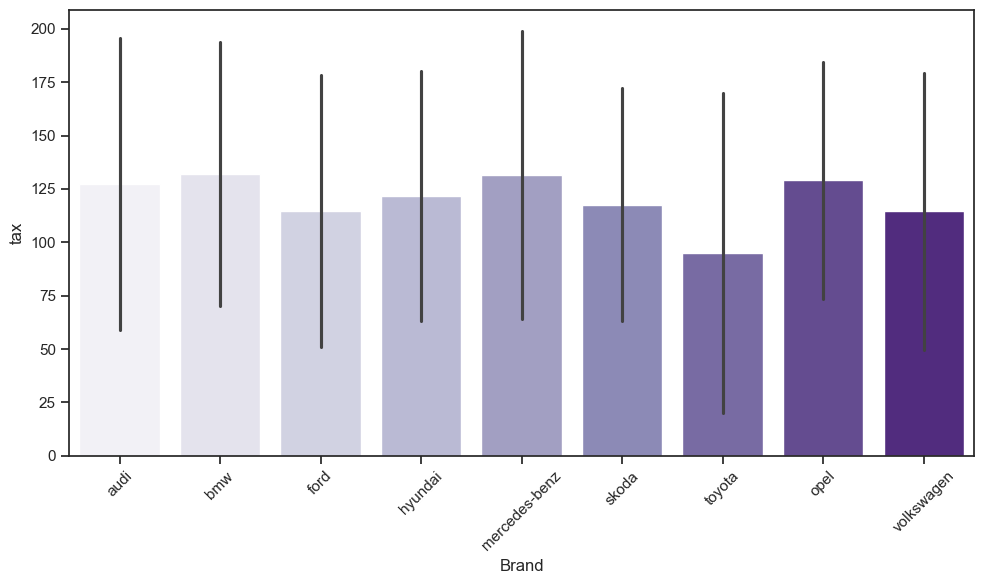

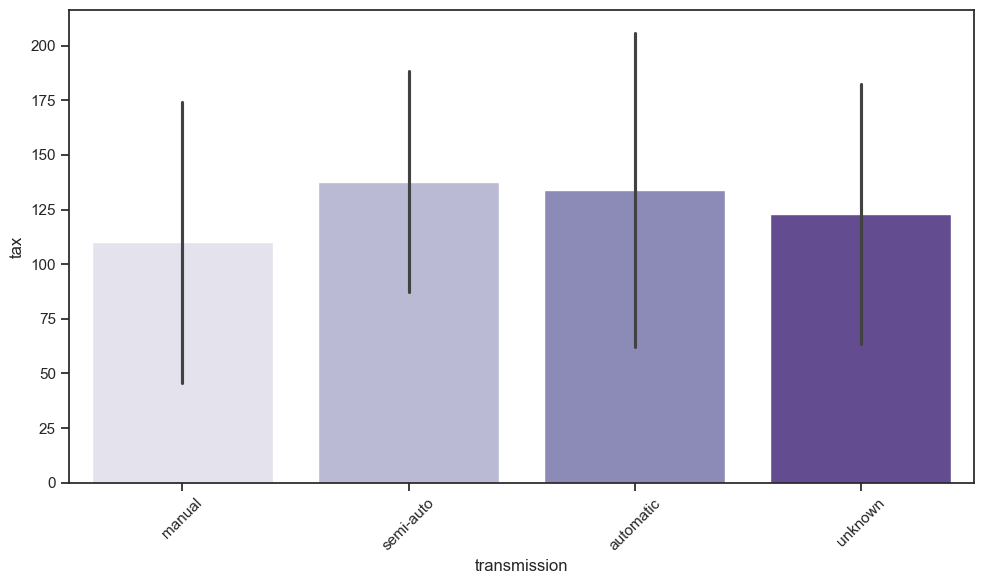

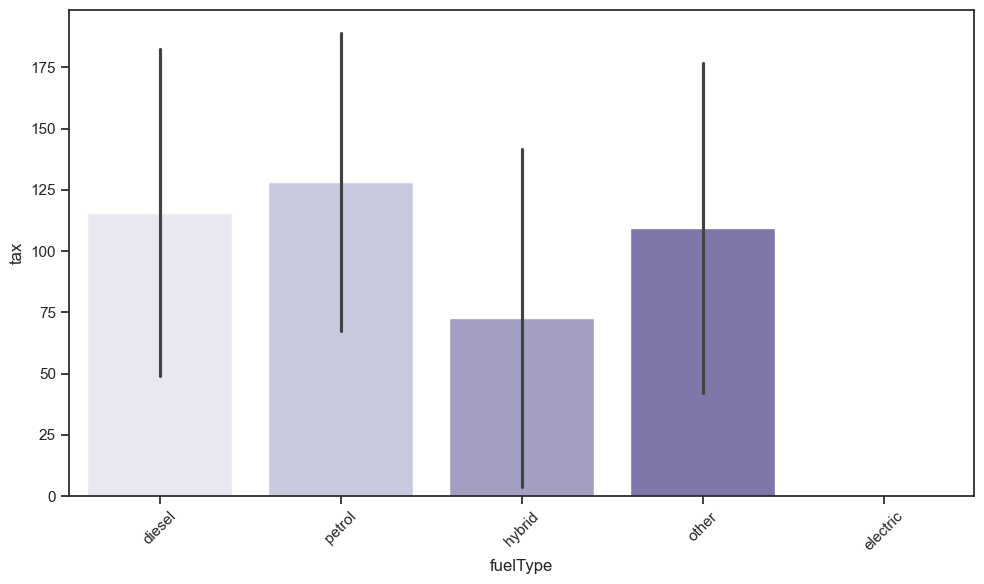

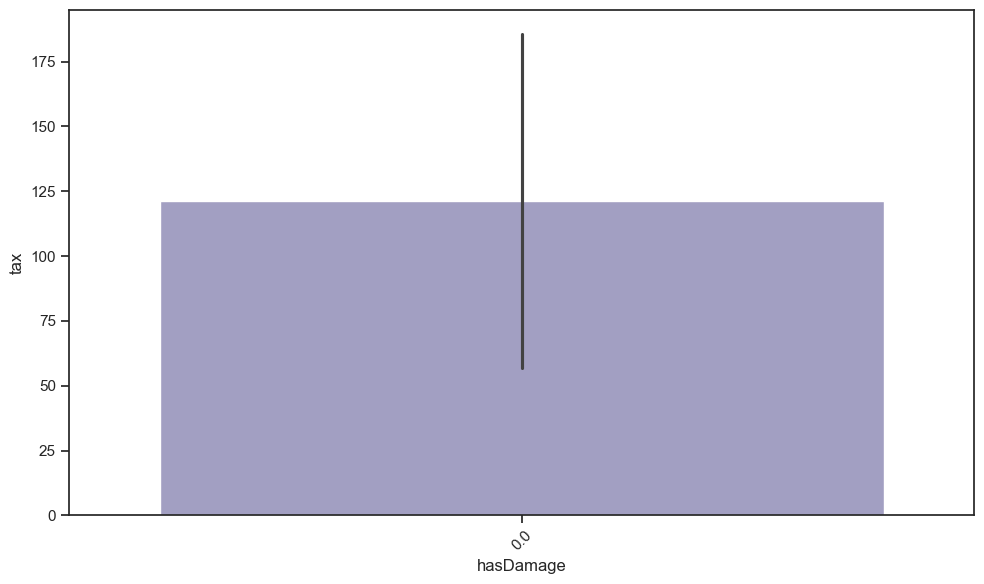

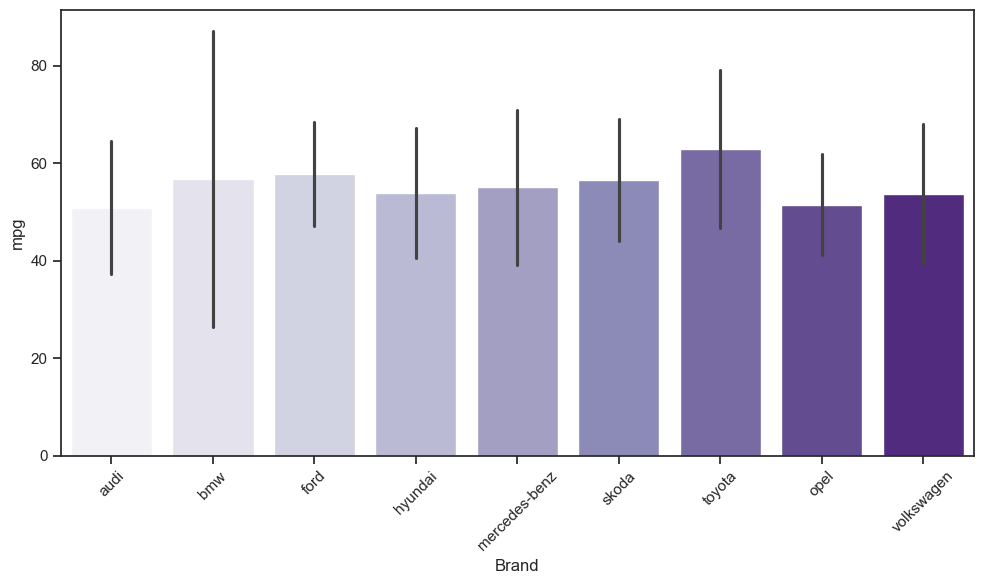

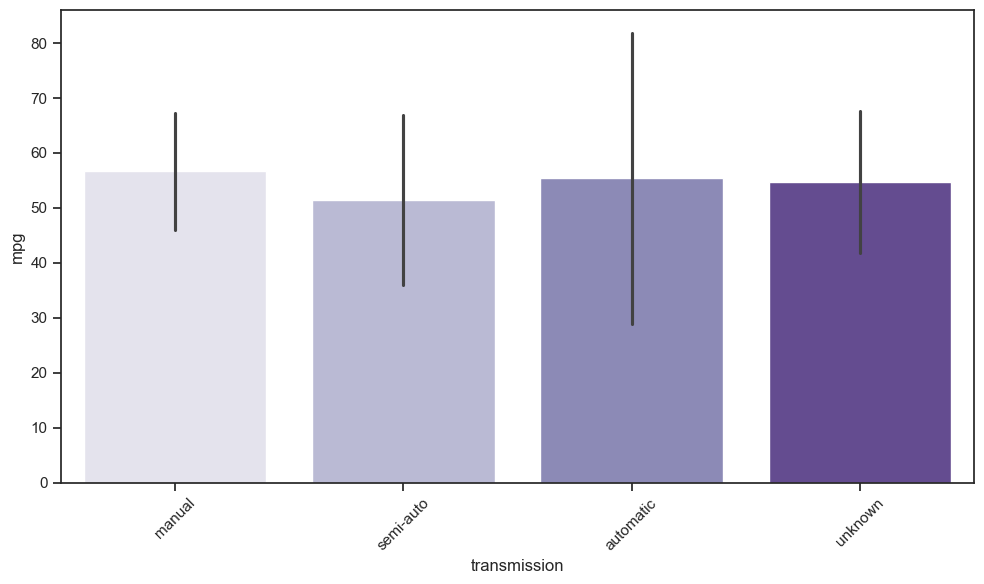

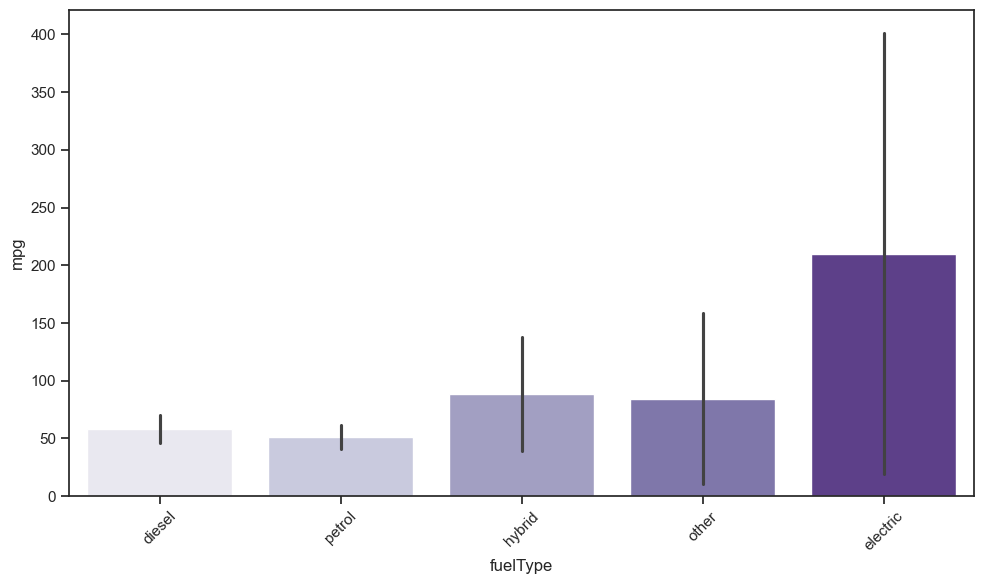

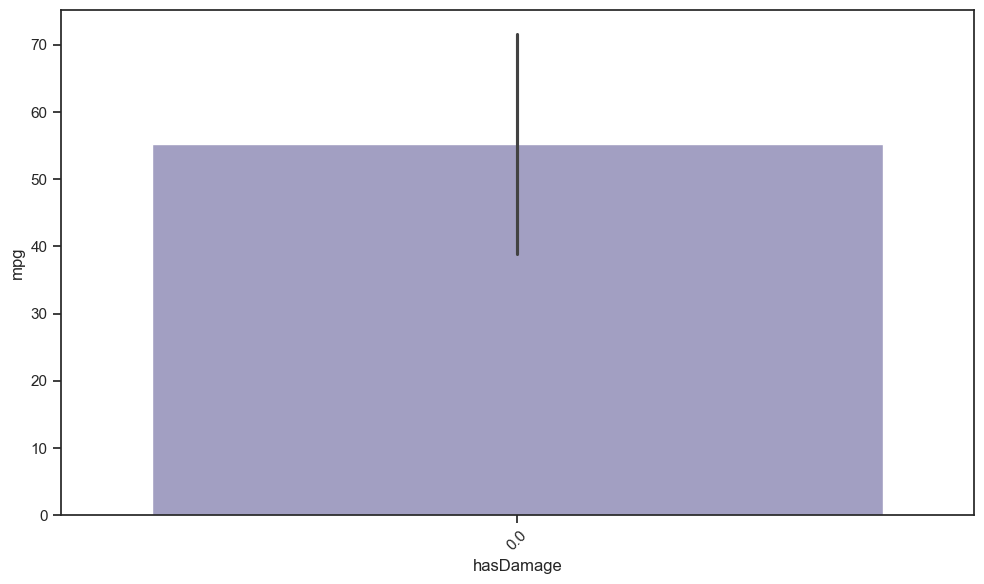

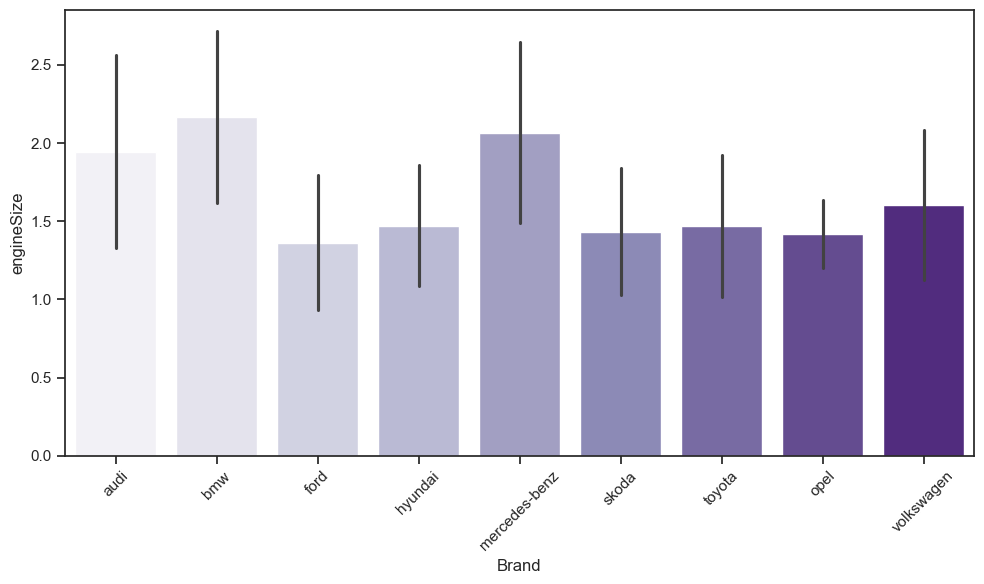

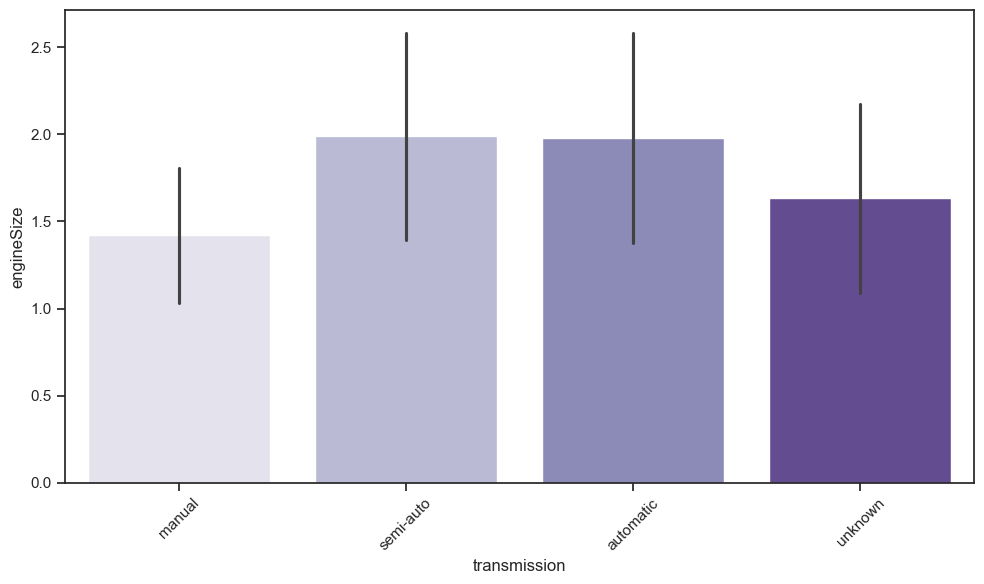

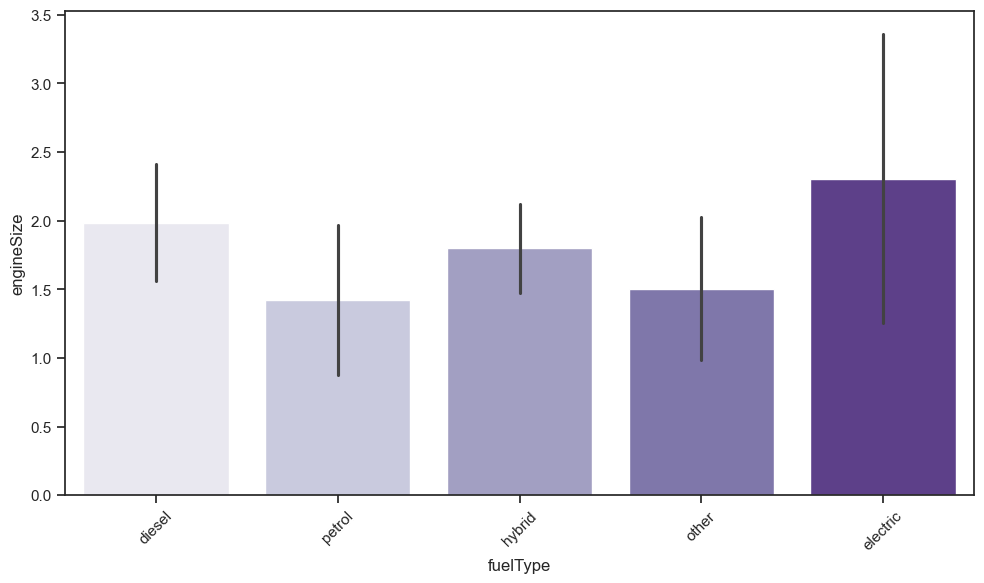

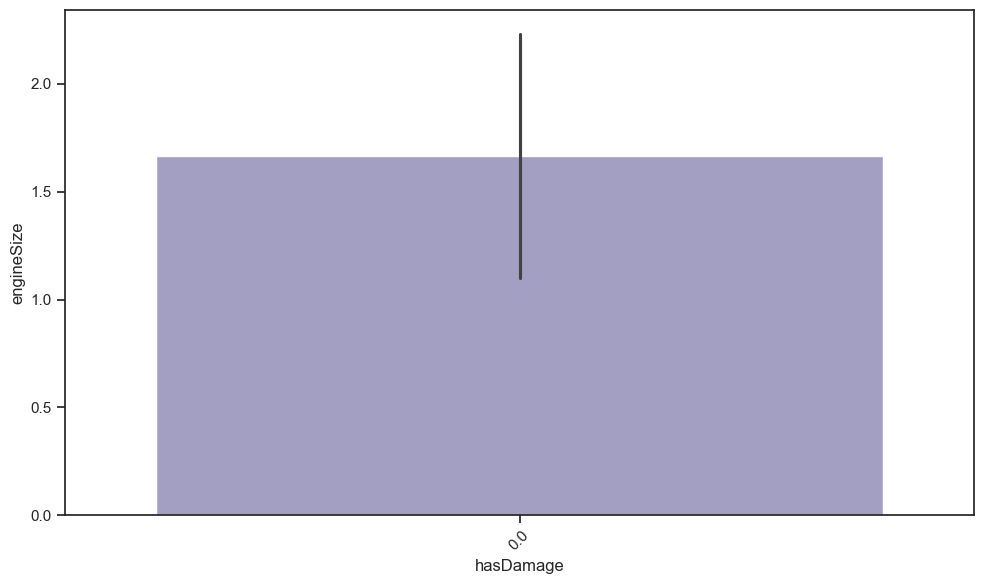

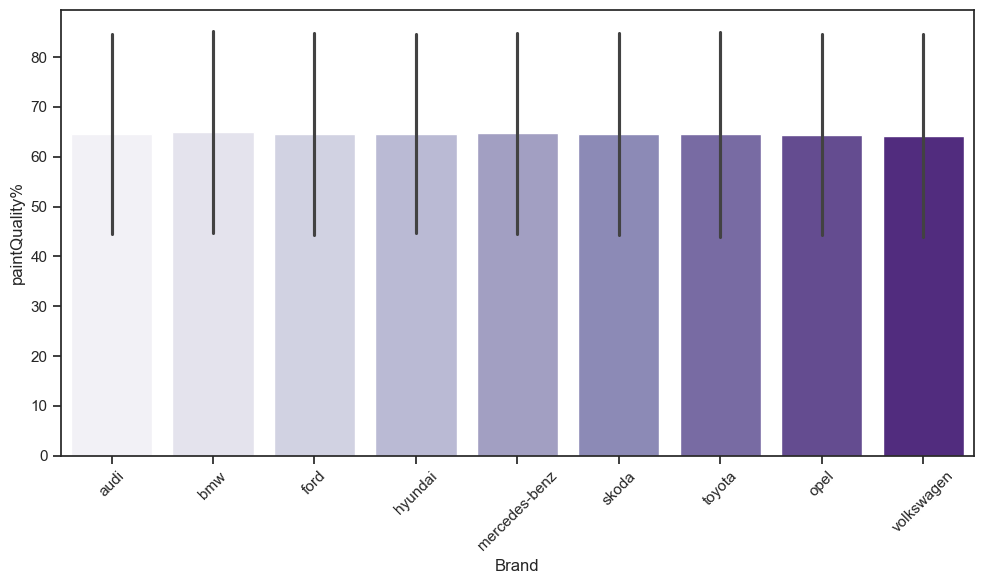

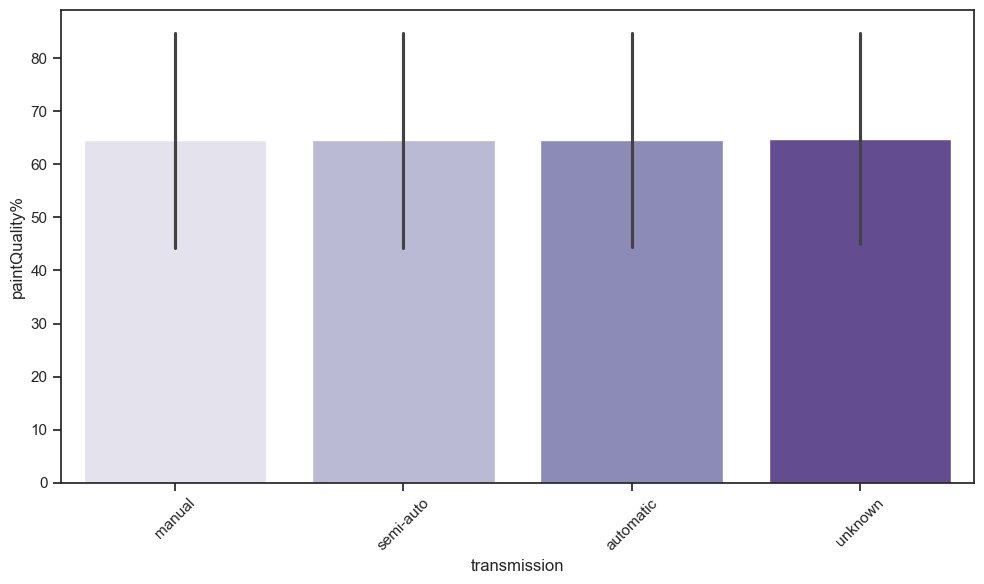

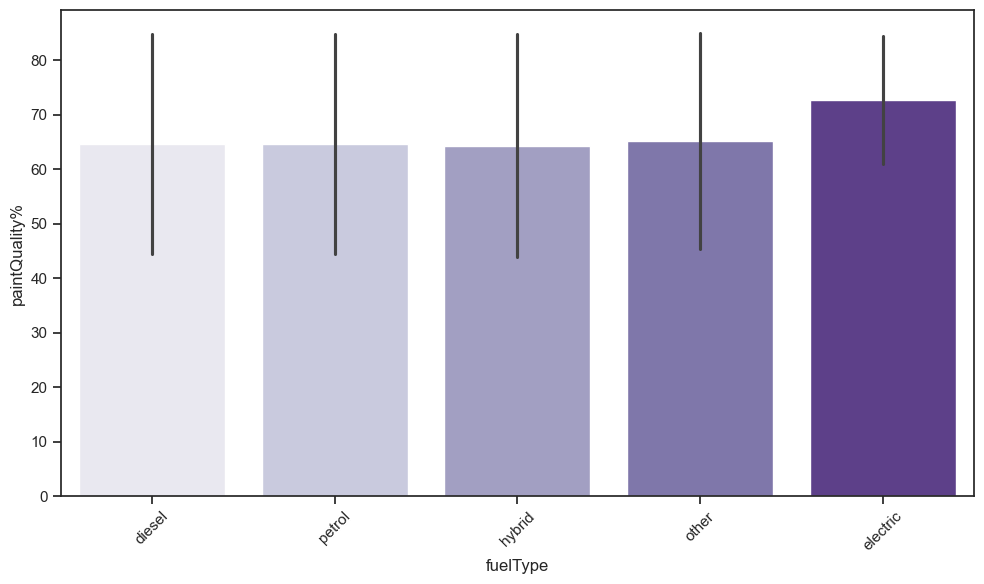

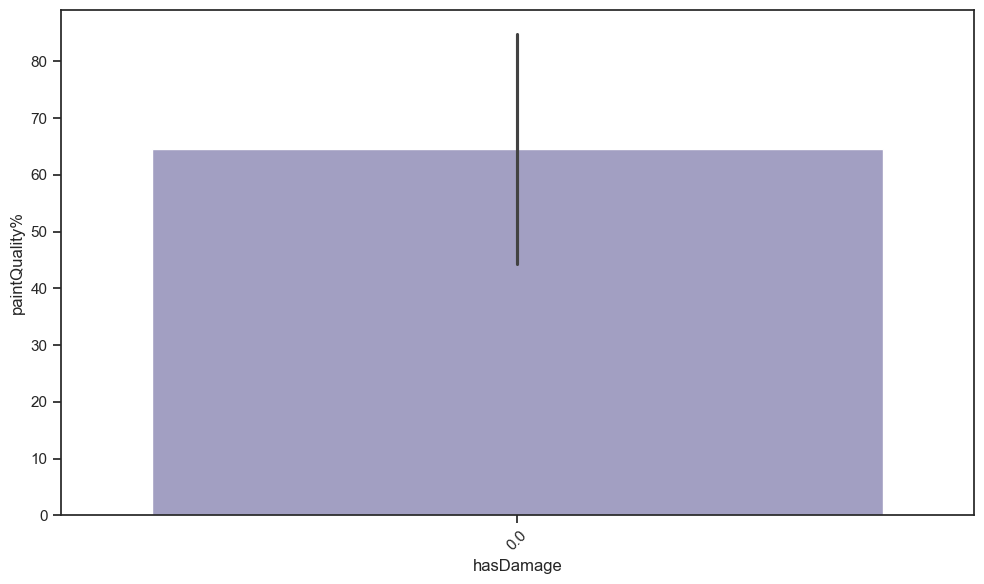

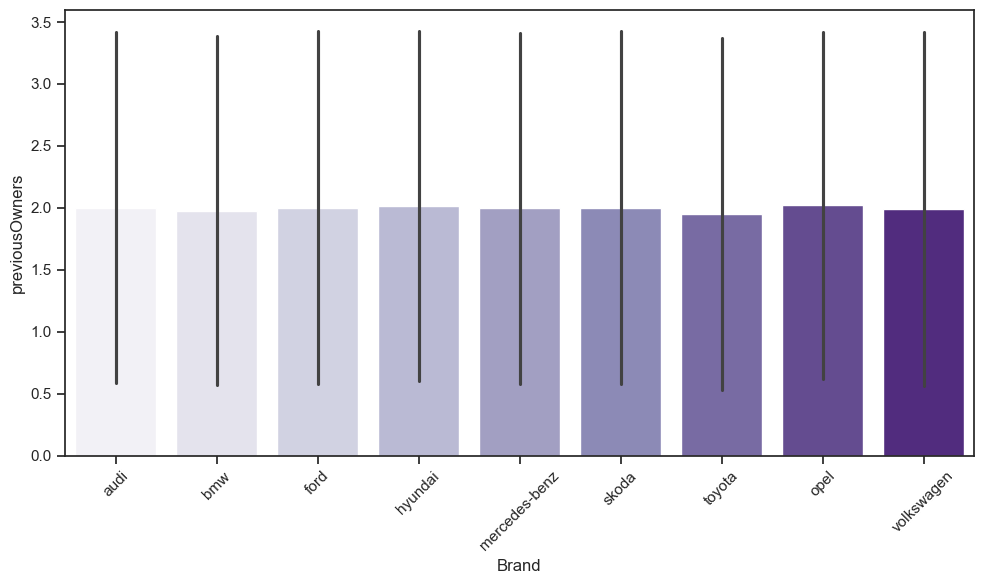

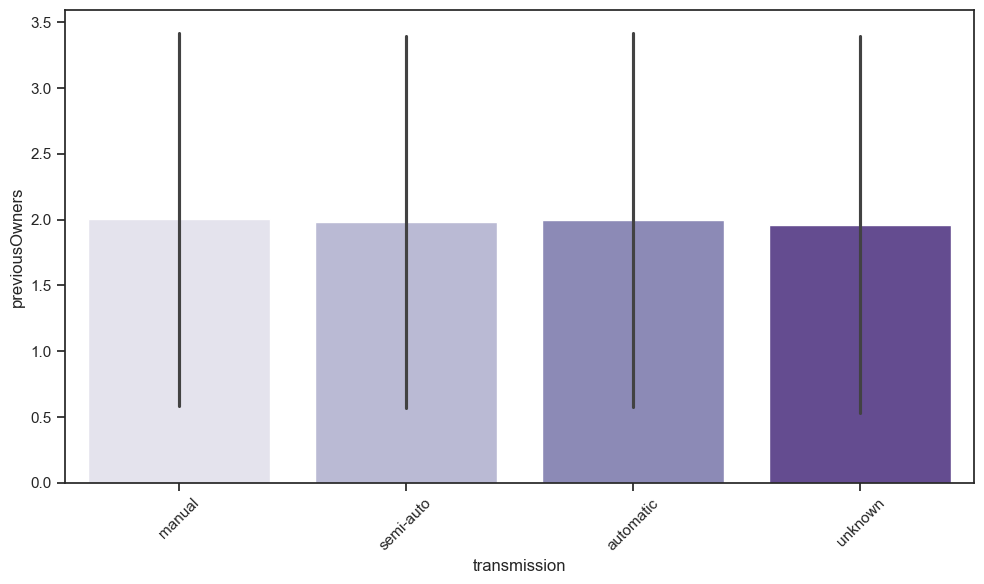

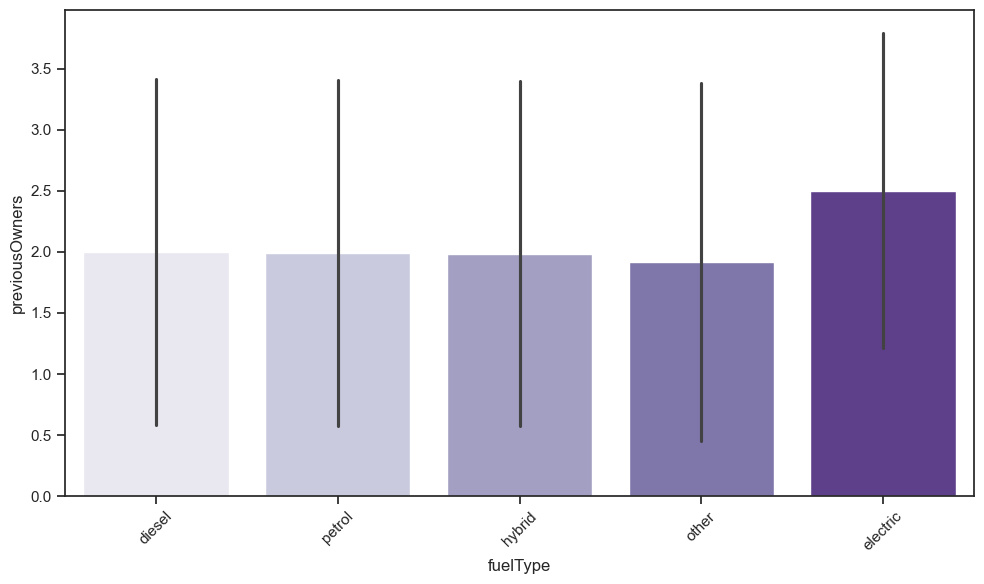

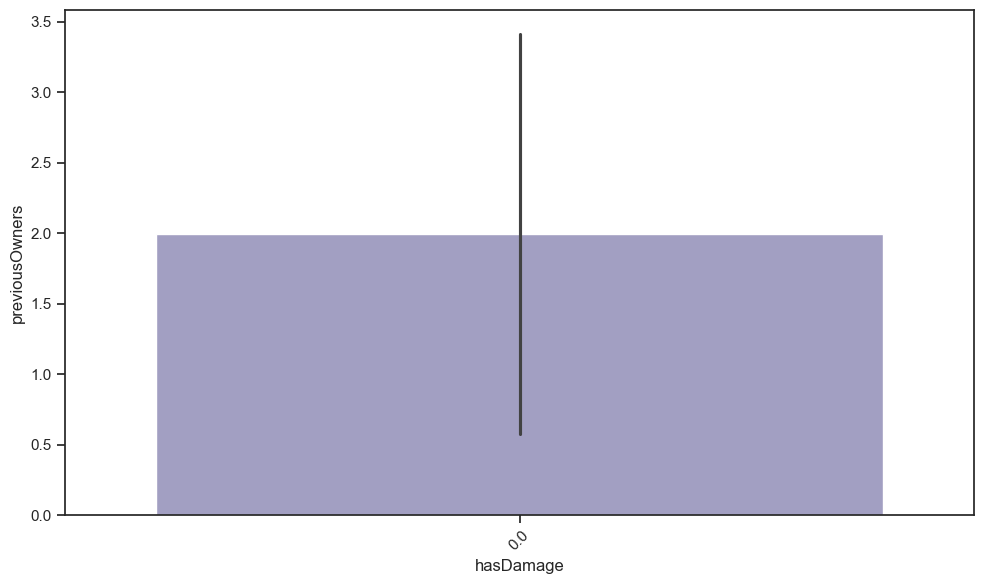

In [72]:
for column in metric_features:
    for x in [f for f in non_metric_features if f != 'model']:
        comparative_barplot(train, x, column)

# 3. Data cleaning and Preprocessing

In [73]:
#train = train.drop(index=35769)
#check this later

## 3.1 Duplicates

In [74]:
train.duplicated().sum()


np.int64(7)

In [75]:
train[train.duplicated(keep=False)]

Brand    model    year  price transmission  mileage fuelType  \
carID                                                                         
15152           ford    focus  2018.0  13500       manual  11382.0   petrol   
21404           ford    focus  2018.0  13500       manual  11382.0   petrol   
21775           ford    focus  2019.0  19500       manual   3000.0   diesel   
23477           ford    focus  2017.0  14000    automatic   9137.0   petrol   
25766           ford    focus  2017.0  14000    automatic   9137.0   petrol   
28593           ford    focus  2019.0  19500       manual   3000.0   diesel   
33774        hyundai      i10  2017.0   7500       manual      NaN   petrol   
33890        hyundai    ioniq  2019.0  23991    automatic   5500.0   hybrid   
34128        hyundai      i10  2017.0   7500       manual      NaN   petrol   
34301        hyundai    ioniq  2019.0  23991    automatic   5500.0   hybrid   
37638  mercedes-benz  c class  2014.0  11750    semi-auto  77043.0   diesel   
42198  mercedes-benz  c class  2014.0  11750    semi-auto  77043.0   diesel   
58836           opel    astra  2019.0  14775       manual     10.0   diesel   
59143           opel    astra  2019.0  14775       manual     10.0   diesel   

         tax   mpg  engineSize  paintQuality%  previousOwners  hasDamage  
carID                                                                     
15152    NaN   NaN         1.0           57.0             4.0        0.0  
21404    NaN   NaN         1.0           57.0             4.0        0.0  
21775    NaN   NaN         1.5           91.0             4.0        0.0  
23477    NaN   NaN         1.0           48.0             4.0        0.0  
25766    NaN   NaN         1.0           48.0             4.0        0.0  
28593    NaN   NaN         1.5           91.0             4.0        0.0  
33774  145.0  57.7         1.2           32.0             4.0        0.0  
33890  135.0  78.5         1.6           39.0             3.0        0.0  
34128  145.0  57.7         1.2           32.0             4.0        0.0  
34301  135.0  78.5         1.6           39.0             3.0        0.0  
37638    NaN   NaN         2.1           47.0             2.0        0.0  
42198    NaN   NaN         2.1           47.0             2.0        0.0  
58836  145.0  58.9         1.6           76.0             4.0        0.0  
59143  145.0  58.9         1.6           76.0             4.0        0.0

We don't have any duplicates in our dataset

## 3.2 Feature Engeneering

### 3.2.1 Feature Creation

Creating "carAge"

In [76]:
train['carAge'] = 2025 - train['year']
metric_features.append('carAge')
metric_features

['price',
 'year',
 'mileage',
 'tax',
 'mpg',
 'engineSize',
 'paintQuality%',
 'previousOwners',
 'carAge']

In [77]:
print(f'The number of rows with negative carAge values is: {train.loc[train['carAge'] < (0), ['carAge']].size}')
print(f'The number of rows with non-integer carAge values are: {train.loc[(train['carAge'] != round(train['carAge'])) & (train['carAge'].notna()), ['carAge']].size}')

The number of rows with negative carAge values is: 0
The number of rows with non-integer carAge values are: 0


Since we created a new feature called "carAge" which has the "same" meaning as "year", we will drop year column

In [78]:
train.drop(columns=['year'], inplace=True)
metric_features.remove('year')
train.sample(10)

Brand      model  price transmission   mileage fuelType    tax  \
carID                                                                           
36311  mercedes-benz    c class  25882    automatic   12145.0   diesel    NaN   
44160  mercedes-benz  gla class  25099    semi-auto    4938.0   diesel  145.0   
1495            audi         a4   9500    automatic  100860.0   diesel    0.0   
26015           ford      focus  14000    automatic    9137.0   petrol    NaN   
65112           opel       viva   5980       manual   22406.0   petrol  145.0   
1690            audi         q7  71450    semi-auto    5000.0   diesel  145.0   
55018         toyota      prius  17995    automatic   32988.0   hybrid    0.0   
52276         toyota      auris  15495    automatic   18144.0   hybrid    0.0   
43421  mercedes-benz    v class  46980    semi-auto    2888.0   diesel  145.0   
10851            bmw   3 series  25780    semi-auto    7254.0   petrol  150.0   

        mpg  engineSize  paintQuality%  previousOwners  hasDamage  carAge  
carID                                                                      
36311   NaN         2.1           67.0             4.0        0.0     7.0  
44160  64.2         2.1           69.0             1.0        0.0     6.0  
1495   72.4         2.0           43.0             3.0        0.0    10.0  
26015   NaN         1.0           92.0             4.0        0.0     8.0  
65112  62.8         1.0           95.0             2.0        0.0     8.0  
1690   30.1         4.0           94.0             3.0        0.0     5.0  
55018  94.1         1.8           91.0             3.0        0.0     9.0  
52276  72.4         1.8           87.0             0.0        0.0     NaN  
43421  36.7         2.0           36.0             2.0        0.0     6.0  
10851  42.2         2.0           94.0             1.0        0.0     6.0

### 3.2.2 Data Type Conversions

In [79]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74260 entries, 0 to 75972
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           74260 non-null  object 
 1   model           74260 non-null  object 
 2   price           74260 non-null  int64  
 3   transmission    72766 non-null  object 
 4   mileage         72473 non-null  float64
 5   fuelType        72790 non-null  object 
 6   tax             66146 non-null  float64
 7   mpg             66458 non-null  float64
 8   engineSize      72517 non-null  float64
 9   paintQuality%   72053 non-null  float64
 10  previousOwners  72027 non-null  float64
 11  hasDamage       72753 non-null  float64
 12  carAge          72804 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 7.9+ MB


mileage

In [80]:
train['mileage'].sample(20)

carID
64591     5705.0
66036     4724.0
49564    15724.0
44783     1792.0
48466    31801.0
70756    28994.0
23973     7881.0
42163    46080.0
31771    24144.0
41092     1000.0
43024    15471.0
33120    14664.0
56646    27042.0
55086    50033.0
73827       10.0
12045    41600.0
35065    34499.0
1069     27444.0
12940    91000.0
25368     5698.0
Name: mileage, dtype: float64

In [81]:
train.loc[(train['mileage'].notna()) & (train['mileage'] % 1 != 0), 'mileage']

carID
238       95204.181674
275       95204.181674
341       95204.181674
430       95204.181674
471       95204.181674
768       95204.181674
813       95204.181674
973       95204.181674
1198      95204.181674
1208      95204.181674
1371      95204.181674
1586      95204.181674
2208      95204.181674
2448      95204.181674
2527      95204.181674
2642      95204.181674
2752      95204.181674
3035      95204.181674
3169      95204.181674
3284      95204.181674
3365      95204.181674
3716      95204.181674
3948      95204.181674
4307      95204.181674
4521      95204.181674
4981      95204.181674
5099      95204.181674
5505      95204.181674
6014      95204.181674
6060      95204.181674
6263      95204.181674
6801      95204.181674
6983      95204.181674
7347      95204.181674
7831     101153.348285
7920     101153.348285
8073     101153.348285
8290     101153.348285
8349     101153.348285
8362     101153.348285
8690     101153.348285
8997     101153.348285
9399     101153.348285
9411 

In [82]:
((train['mileage'].notna()) & (train['mileage'] % 1 != 0)).sum()

np.int64(379)

Since the majority of the values aren't floats, we will convert them to integer

In [83]:
train['mileage'] = train['mileage'].round().astype('Int64')

tax

In [84]:
train['tax'].sample(20)

carID
67626    145.0
25507    145.0
73871    145.0
23253    145.0
54110      0.0
21972    145.0
22452    145.0
37093    145.0
20647    125.0
57965    125.0
69622     20.0
66403    125.0
46925    150.0
20658      NaN
21148    145.0
66844    200.0
3838      20.0
44885    145.0
60486    160.0
73016    145.0
Name: tax, dtype: float64

In [85]:
train.loc[(train['tax'].notna()) & (train['tax'] % 1 != 0), 'tax']

carID
174      327.915778
298      327.915778
509      327.915778
1008     327.915778
1206     327.915778
1292     327.915778
2134     327.915778
2714     327.915778
3243     327.915778
3292     327.915778
3370     327.915778
3448     327.915778
3568     327.915778
3640     327.915778
4001     327.915778
4053     327.915778
4242     327.915778
4289     327.915778
4513     327.915778
4667     327.915778
5008     327.915778
5644     327.915778
5970     327.915778
5971     327.915778
6096     327.915778
6240     327.915778
6256     327.915778
6260     327.915778
6955     327.915778
7044     327.915778
7288     327.915778
7604     316.487189
7748     316.487189
8063     316.487189
8161     316.487189
9227     316.487189
9304     316.487189
9474     316.487189
9733     316.487189
9810     316.487189
9916     316.487189
10000    316.487189
10253    316.487189
10276    316.487189
10518    316.487189
10578    316.487189
11266    316.487189
11523    316.487189
12230    316.487189
12575    316.4

In [86]:
((train['tax'].notna()) & (train['tax'] % 1 != 0)).sum()

np.int64(366)

Since the majority of the values aren't floats, we will convert them to integer

In [87]:
train['tax'] = train['tax'].round().astype('Int64')

mpg

In [88]:
train['mpg'].sample(20)

carID
39683         NaN
72975    44.10000
68118    64.20000
2164     33.60000
68283    57.70000
66179    45.60000
27259    67.30000
47977    36.70000
60788    43.50000
45779         NaN
7559     60.10000
26759    27.70949
805      47.90000
59187    85.60000
39619    44.80000
51455    67.30000
62192    44.10000
32838    50.40000
10475    55.40000
67586    47.90000
Name: mpg, dtype: float64

In [89]:
train.loc[(train['mpg'].notna()) & (train['mpg'] % 1 != 0), 'mpg']

carID
0        83.1
1        55.4
2        53.3
3        51.4
4        47.9
         ... 
75967    40.9
75968    53.3
75969    32.8
75970    43.5
75971    49.6
Name: mpg, Length: 64848, dtype: float64

We should leave it as a float

engineSize

In [90]:
train['engineSize'].sample(20)

carID
48814    1.4
48771    1.0
1513     2.0
61905    1.4
40920    1.5
22640    1.0
40269    3.0
55938    1.0
4031     2.5
58050    1.4
40181    3.0
280      2.0
27264    1.0
37044    2.0
62841    1.0
50760    1.2
48242    1.5
1072     1.4
2014     2.0
12124    2.0
Name: engineSize, dtype: float64

In [91]:
train.loc[(train['engineSize'].notna()) & (train['engineSize'] % 1 != 0), 'engineSize']

carID
0        1.6
2        1.4
3        1.4
7        1.8
10       1.4
        ... 
75963    1.5
75964    1.6
75968    1.4
75970    1.5
75972    1.6
Name: engineSize, Length: 35525, dtype: float64

We should leave it as a float

paintQuality%

In [92]:
train['paintQuality%'].sample(20)

carID
11407    51.0
38186    75.0
37050    56.0
32392    72.0
10175    49.0
61752    61.0
11887    56.0
56247    53.0
13949    44.0
12289    49.0
13137    75.0
5296     73.0
20819    91.0
47795    68.0
3952     90.0
75645    37.0
6592     80.0
54244    90.0
60947    67.0
45045    69.0
Name: paintQuality%, dtype: float64

In [93]:
train.loc[(train['paintQuality%'].notna()) & (train['paintQuality%'] % 1 != 0), 'paintQuality%']

Series([], Name: paintQuality%, dtype: float64)

Since there are no paintQuality% values whith decimal places, let's convert it into integer

In [94]:
train['paintQuality%'] = train['paintQuality%'].round().astype('Int64')

previousOwners  

In [95]:
train['previousOwners'].sample(20)

carID
8047     2.0
43185    2.0
3605     3.0
34735    2.0
46637    3.0
59547    4.0
71743    1.0
16517    1.0
43597    2.0
49899    0.0
22694    4.0
47715    3.0
67559    3.0
1129     0.0
64239    1.0
42858    4.0
29880    1.0
10183    2.0
62039    2.0
33298    1.0
Name: previousOwners, dtype: float64

In [96]:
train.loc[(train['previousOwners'].notna()) & (train['previousOwners'] % 1 != 0), 'previousOwners']

Series([], Name: previousOwners, dtype: float64)

Since there are no previousOwners values whith decimal places, let's convert it into integer

In [97]:
train['previousOwners'] = train['previousOwners'].round().astype('Int64')

carAge

In [98]:
train['carAge'].sample(20)

carID
2775      8.0
34282     6.0
54075     7.0
57551     9.0
41189     8.0
42291    10.0
31503     7.0
65026     9.0
74535     8.0
12375     6.0
17064     8.0
37273     9.0
26186     6.0
13342     7.0
24892     8.0
38373     6.0
1975      9.0
14321     8.0
49899     9.0
11933     8.0
Name: carAge, dtype: float64

In [99]:
train.loc[(train['carAge'].notna()) & (train['carAge'] % 1 != 0), 'carAge']

Series([], Name: carAge, dtype: float64)

Since there are no carAge values whith decimal places, let's convert it into integer

In [100]:
train['carAge'] = train['carAge'].round().astype('Int64')

In [101]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 74260 entries, 0 to 75972
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Brand           74260 non-null  object 
 1   model           74260 non-null  object 
 2   price           74260 non-null  int64  
 3   transmission    72766 non-null  object 
 4   mileage         72473 non-null  Int64  
 5   fuelType        72790 non-null  object 
 6   tax             66146 non-null  Int64  
 7   mpg             66458 non-null  float64
 8   engineSize      72517 non-null  float64
 9   paintQuality%   72053 non-null  Int64  
 10  previousOwners  72027 non-null  Int64  
 11  hasDamage       72753 non-null  float64
 12  carAge          72804 non-null  Int64  
dtypes: Int64(5), float64(3), int64(1), object(4)
memory usage: 8.3+ MB


In [102]:
train.shape

(74260, 13)

Now everything is in the right Dtype

# -------------

# Train-Test Split

Let's deal with the missing vales (nan/unknown/other) on transmission and fuelType

In [103]:
train['Brand'].isna().sum()

np.int64(0)

In [104]:
train['model'].isna().sum()

np.int64(0)

In [105]:
train['transmission'].isna().sum()

np.int64(1494)

In [106]:
train['fuelType'].isna().sum()

np.int64(1470)

In [107]:
train[['transmission', 'fuelType', 'Brand', 'model']].nunique()


transmission      4
fuelType          5
Brand             9
model           193
dtype: int64

transmission

In [108]:
len(train.loc[train['transmission'] == 'unknown'])

724

In [109]:
train['transmission'].isna().sum()

np.int64(1494)

We should consider that values as an error

In [110]:
# 1) Per-model most frequent transmission (exclude 'unknown' and NaN)
valid_tx = train['transmission'].notna() & (train['transmission'] != 'unknown')
tx_mode_by_model = (
    train.loc[valid_tx]
         .groupby('model')['transmission']
         .agg(lambda s: s.mode().iat[0] if not s.mode().empty else np.nan)
)

# 2) Replace 'unknown' OR NaN with the per-model mode
tx_mask = train['transmission'].isna() | (train['transmission'] == 'unknown')
train.loc[tx_mask, 'transmission'] = train.loc[tx_mask, 'model'].map(tx_mode_by_model)

# 3) Global mode fallback (exclude 'unknown' and NaN)
tx_global_mode = train.loc[valid_tx, 'transmission'].mode().iat[0]

# 4) Any leftovers -> fill with global mode (covers unmapped models)
train['transmission'] = (
    train['transmission']
        .fillna(tx_global_mode)               
        .replace('unknown', tx_global_mode)   )


In [111]:
train['transmission'].unique()

array(['manual', 'semi-auto', 'automatic'], dtype=object)

fuelType

In [112]:
len(train.loc[train['fuelType'] == 'other'])

161

In [113]:
train['fuelType'].isna().sum()

np.int64(1470)

In [114]:
# 1) Get per-model most frequent fuel type (excluding 'other' and NaN)
valid_ft = train['fuelType'].notna() & (train['fuelType'] != 'other')
ft_mode_by_model = (
    train.loc[valid_ft]
         .groupby('model')['fuelType']
         .agg(lambda s: s.mode().iat[0] if not s.mode().empty else np.nan)
)

# 2) Replace 'other' or NaN with the per-model mode
ft_mask = train['fuelType'].isna() | (train['fuelType'] == 'other')
train.loc[ft_mask, 'fuelType'] = train.loc[ft_mask, 'model'].map(ft_mode_by_model)

# 3) Global mode fallback (in case some models have no valid entries)
ft_global_mode = train.loc[valid_ft, 'fuelType'].mode().iat[0]

# 4) Fill remaining missing or 'other' with global mode
train['fuelType'] = (
    train['fuelType']
         .fillna(ft_global_mode)
         .replace('other', ft_global_mode)
)


In [115]:
train['fuelType'].unique()

array(['diesel', 'petrol', 'hybrid', 'electric'], dtype=object)

### Encoding

**We can apply OHE to the entire dataset before splitting because it's deterministic - it just creates binary columns based on the categories present in the data. It doesn't learn statistics like means, frequencies, or anything from the target. If we were using CountEncoder or TargetEncoder, we'd need to fit only on training data because those encoders learn from the target variable or value frequencies, which would leak information from validation/test sets.**

In [116]:
non_metric_features

['Brand', 'model', 'transmission', 'fuelType', 'hasDamage']

In [117]:
train['model'].nunique()

193

We will only use OHE for Brand, transmission and fueltype. Since model has a lot more unique values, we will use

In [118]:
categorical_cols = non_metric_features.copy()

In [119]:
categorical_cols.remove('model')

In [120]:
categorical_cols.remove('hasDamage')

In [121]:
categorical_cols

['Brand', 'transmission', 'fuelType']

In [122]:
non_metric_features

['Brand', 'model', 'transmission', 'fuelType', 'hasDamage']

In [123]:
# Apply OHE to categorical columns
ohe = OneHotEncoder( sparse_output=False)
encoded_array = ohe.fit_transform(train[categorical_cols])
encoded_cols = ohe.get_feature_names_out(categorical_cols)

# Combine numerical and encoded categorical features
train_encoded = pd.concat(
    [
        train[metric_features],
        pd.DataFrame(encoded_array, columns=encoded_cols, index=train.index),
        train[['model']],train[['hasDamage']]
    ],
    axis=1
)

In [124]:
train_encoded.sample(10)

price  mileage   tax   mpg  engineSize  paintQuality%  previousOwners  \
carID                                                                          
26799  16999     <NA>   145  60.1         2.0             96               4   
58351  14599    36832   145  51.4         2.0             39               4   
42123  15495    21064   125  52.3         2.0             57               1   
41661  24992     8238  <NA>   NaN         1.5             81               0   
6127   15450    43420    30  55.4         2.0             52            <NA>   
27997   7940    41452   160  44.1         1.6             50               2   
9436   13795    80950    30  65.7         2.0             64               1   
20249   5500    41698   125  50.4         1.2             46               2   
43428  25389     8639   145  45.6         1.5             91               1   
11235  19000    40818   150  54.3         2.0             76               1   

       carAge  Brand_audi  Brand_bmw  ...  Brand_volkswagen  \
carID                                 ...                     
26799       8         0.0        0.0  ...               0.0   
58351       7         0.0        0.0  ...               0.0   
42123      10         0.0        0.0  ...               0.0   
41661       6         0.0        0.0  ...               0.0   
6127        9         1.0        0.0  ...               0.0   
27997      10         0.0        0.0  ...               0.0   
9436        9         0.0        1.0  ...               0.0   
20249      13         0.0        0.0  ...               0.0   
43428       6         0.0        0.0  ...               0.0   
11235       9         0.0        1.0  ...               0.0   

       transmission_automatic  transmission_manual  transmission_semi-auto  \
carID                                                                        
26799                     0.0                  1.0                     0.0   
58351                     1.0                  0.0                     0.0   
42123                     0.0                  0.0                     1.0   
41661                     1.0                  0.0                     0.0   
6127                      0.0                  0.0                     1.0   
27997                     0.0                  1.0                     0.0   
9436                      1.0                  0.0                     0.0   
20249                     0.0                  1.0                     0.0   
43428                     0.0                  0.0                     1.0   
11235                     1.0                  0.0                     0.0   

       fuelType_diesel  fuelType_electric  fuelType_hybrid  fuelType_petrol  \
carID                                                                         
26799              1.0                0.0              0.0              0.0   
58351              1.0                0.0              0.0              0.0   
42123              0.0                0.0              0.0              1.0   
41661              0.0                0.0              0.0              1.0   
6127               0.0                0.0              0.0              1.0   
27997              0.0                0.0              0.0              1.0   
9436               1.0                0.0              0.0              0.0   
20249              0.0                0.0              0.0              1.0   
43428              0.0                0.0              0.0              1.0   
11235              1.0                0.0              0.0              0.0   

          model  hasDamage  
carID                       
26799      kuga        0.0  
58351  insignia        0.0  
42123   c class        0.0  
41661   c class        0.0  
6127         a4        0.0  
27997     c-max        0.0  
9436   4 series        0.0  
20249    fiesta        0.0  
43428   c class        0.0  
11235        x3        0.0  

[10 rows x 26 columns]

In [125]:
train_encoded.columns

Index(['price', 'mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'carAge', 'Brand_audi', 'Brand_bmw', 'Brand_ford',
       'Brand_hyundai', 'Brand_mercedes-benz', 'Brand_opel', 'Brand_skoda',
       'Brand_toyota', 'Brand_volkswagen', 'transmission_automatic',
       'transmission_manual', 'transmission_semi-auto', 'fuelType_diesel',
       'fuelType_electric', 'fuelType_hybrid', 'fuelType_petrol', 'model',
       'hasDamage'],
      dtype='object')

## **Holdout Method**

In [126]:
# Split the DataFrame into features (X) and target variable (y)
X = train_encoded.drop('price', axis=1) 
y = train_encoded['price']  

In [127]:
# Split the dataset into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=0) 

## 1.Encoding

Categorical Variables = "Brand","model","transmission","fuelType", but since we have already encoded "Brand", "transmission" and "fueltype", only "model" lefts

***model***

In [128]:
X_train['model'].value_counts()

model
focus                    5529
c class                  4193
fiesta                   3553
golf                     2589
corsa                    1909
polo                     1755
astra                    1556
a class                  1385
3 series                 1381
kuga                     1225
yaris                    1144
mokka x                  1135
aygo                     1122
1 series                 1082
e class                  1036
a3                       1024
tiguan                    974
fabia                     857
octavia                   816
q3                        786
a4                        749
a1                        726
tucson                    722
2 series                  696
ecosport                  659
insignia                  589
i10                       588
5 series                  584
glc class                 543
4 series                  528
passat                    511
up                        501
q5                        484
a5  

In [129]:
# Compute mean engineSize per model
tmp = X_train[['model', 'engineSize']].copy()
model_mean_engine = tmp.groupby('model')['engineSize'].mean()

# Compute global mean (fallback for unseen models)
global_mean_engine = X_train['engineSize'].mean()

# Apply encoding
X_train['model_te'] = X_train['model'].map(model_mean_engine).fillna(global_mean_engine)
X_val['model_te'] = X_val['model'].map(model_mean_engine).fillna(global_mean_engine)

# Drop the original 'model' column to avoid redundancy
X_train.drop(columns=['model'], inplace=True)
X_val.drop(columns=['model'], inplace=True)


In [130]:
X_train.sample(10)

mileage   tax   mpg  engineSize  paintQuality%  previousOwners  carAge  \
carID                                                                           
36436     6052  <NA>   NaN         2.0             41               2       6   
70217    47028    20  60.1         NaN             79               1       9   
73583     7885   145  50.4         2.0             47               2       6   
56936    28042    20  72.4         1.6             57               2       9   
2530      3215   150  44.8         1.5             65               4       6   
53613    36933   145  53.0         NaN             67               1      11   
1689     21000     0  74.3         1.6             59               4       9   
47515    23388   125  51.4         1.2             73               2       8   
58320     6398   145  47.1         1.5             72               1    <NA>   
29714    33056   125  54.3         1.2             52               0       9   

       Brand_audi  Brand_bmw  Brand_ford  ...  Brand_volkswagen  \
carID                                     ...                     
36436         0.0        0.0         0.0  ...               0.0   
70217         0.0        0.0         0.0  ...               1.0   
73583         0.0        0.0         0.0  ...               1.0   
56936         0.0        0.0         0.0  ...               0.0   
2530          1.0        0.0         0.0  ...               0.0   
53613         0.0        0.0         0.0  ...               0.0   
1689          1.0        0.0         0.0  ...               0.0   
47515         0.0        0.0         0.0  ...               0.0   
58320         0.0        0.0         0.0  ...               0.0   
29714         0.0        0.0         1.0  ...               0.0   

       transmission_automatic  transmission_manual  transmission_semi-auto  \
carID                                                                        
36436                     1.0                  0.0                     0.0   
70217                     0.0                  1.0                     0.0   
73583                     0.0                  0.0                     1.0   
56936                     0.0                  1.0                     0.0   
2530                      1.0                  0.0                     0.0   
53613                     0.0                  1.0                     0.0   
1689                      0.0                  1.0                     0.0   
47515                     0.0                  0.0                     1.0   
58320                     0.0                  1.0                     0.0   
29714                     0.0                  1.0                     0.0   

       fuelType_diesel  fuelType_electric  fuelType_hybrid  fuelType_petrol  \
carID                                                                         
36436              1.0                0.0              0.0              0.0   
70217              0.0                0.0              0.0              1.0   
73583              1.0                0.0              0.0              0.0   
56936              1.0                0.0              0.0              0.0   
2530               0.0                0.0              0.0              1.0   
53613              1.0                0.0              0.0              0.0   
1689               1.0                0.0              0.0              0.0   
47515              0.0                0.0              0.0              1.0   
58320              0.0                0.0              0.0              1.0   
29714              0.0                0.0              0.0              1.0   

       hasDamage  model_te  
carID                       
36436        0.0  2.032383  
70217        0.0  1.164701  
73583        0.0  1.950914  
56936        0.0  1.750084  
2530         0.0  1.382054  
53613        0.0  2.247921  
1689         0.0  1.641648  
47515        0.0  1.446342  
58320        0.0  1.750084  
29714        0.0  1.1066

In [131]:
X_val.sample(10)

mileage  tax   mpg  engineSize  paintQuality%  previousOwners  carAge  \
carID                                                                          
74064    11393  150  34.5         3.0             72               2       6   
209       <NA>  150  52.3         1.4             69               4       8   
63561    10000  145  43.5         1.4             63               3       8   
8211     52757   30  62.8         2.0             46               1      12   
69860    25221  260  33.6         3.0             32               4       6   
19697     5009  145  54.3         1.0             72               4       8   
13141     4315  145  42.2         NaN             39               1       6   
27364     <NA>  150  40.3         1.5             82               4       7   
25133     6654  150  60.1         1.0             37            <NA>       8   
61553     3616  145  39.2         1.4             89               2    <NA>   

       Brand_audi  Brand_bmw  Brand_ford  ...  Brand_volkswagen  \
carID                                     ...                     
74064         0.0        0.0         0.0  ...               1.0   
209           1.0        0.0         0.0  ...               0.0   
63561         0.0        0.0         0.0  ...               0.0   
8211          0.0        1.0         0.0  ...               0.0   
69860         0.0        0.0         0.0  ...               1.0   
19697         0.0        0.0         1.0  ...               0.0   
13141         0.0        1.0         0.0  ...               0.0   
27364         0.0        0.0         1.0  ...               0.0   
25133         0.0        0.0         1.0  ...               0.0   
61553         0.0        0.0         0.0  ...               0.0   

       transmission_automatic  transmission_manual  transmission_semi-auto  \
carID                                                                        
74064                     1.0                  0.0                     0.0   
209                       0.0                  1.0                     0.0   
63561                     1.0                  0.0                     0.0   
8211                      0.0                  1.0                     0.0   
69860                     1.0                  0.0                     0.0   
19697                     0.0                  1.0                     0.0   
13141                     0.0                  0.0                     1.0   
27364                     0.0                  1.0                     0.0   
25133                     0.0                  1.0                     0.0   
61553                     0.0                  1.0                     0.0   

       fuelType_diesel  fuelType_electric  fuelType_hybrid  fuelType_petrol  \
carID                                                                         
74064              1.0                0.0              0.0              0.0   
209                0.0                0.0              0.0              1.0   
63561              0.0                0.0              0.0              1.0   
8211               1.0                0.0              0.0              0.0   
69860              1.0                0.0              0.0              0.0   
19697              0.0                0.0              0.0              1.0   
13141              0.0                0.0              0.0              1.0   
27364              0.0                0.0              0.0              1.0   
25133              0.0                0.0              0.0              1.0   
61553              0.0                0.0              0.0              1.0   

       hasDamage  model_te  
carID                       
74064        0.0  2.984541  
209          0.0  1.548113  
63561        0.0  1.444761  
8211         0.0  2.171030  
69860        0.0  2.857143  
19697        0.0  1.106615  
13141        0.0  2.171030  
27364        0.0  1.106615  
25133        0.0  1.371638  
61553        0.0  1.444761  

[10 ro

## 2. Missing Values

In [132]:
X_train.isna().sum()

mileage                   1403
tax                       6436
mpg                       6197
engineSize                1401
paintQuality%             1780
previousOwners            1789
carAge                    1149
Brand_audi                   0
Brand_bmw                    0
Brand_ford                   0
Brand_hyundai                0
Brand_mercedes-benz          0
Brand_opel                   0
Brand_skoda                  0
Brand_toyota                 0
Brand_volkswagen             0
transmission_automatic       0
transmission_manual          0
transmission_semi-auto       0
fuelType_diesel              0
fuelType_electric            0
fuelType_hybrid              0
fuelType_petrol              0
hasDamage                 1220
model_te                     0
dtype: int64

### 2.1 Dealing with Missing Values

previousOwners

In [133]:
X_train['previousOwners'] = X_train['previousOwners'].fillna(0)
X_val['previousOwners'] = X_val['previousOwners'].fillna(0)

In [134]:
X_train['previousOwners'].unique()

<IntegerArray>
[3, 0, 4, 1, 2]
Length: 5, dtype: Int64

hasDamage

In [135]:
X_train['hasDamage']=X_train['hasDamage'].fillna(0)
X_val['hasDamage'] = X_val['hasDamage'].fillna(0)

In [136]:
X_train['hasDamage'].unique()

array([0.])

engineSize

In [137]:
X_train['engineSize'].unique()

array([1.8       , 2.        , 1.5       , 1.2       , 1.        ,
       1.4       , 1.1       , 1.6       , 3.        , 1.3       ,
       2.1       , 4.        , 2.3       , 1.7       ,        nan,
       2.2       , 2.63120047, 1.9       , 2.9       , 0.31340658,
       2.5       , 0.30707394, 3.82275785, 3.73923548, 3.5       ,
       4.4       , 2.61964142, 0.15452932, 5.        , 0.18642488,
       6.2       , 2.98579344, 3.72371217, 2.06411863, 0.7395339 ,
       4.7       , 0.37112737, 2.4       , 2.8       , 5.4       ,
       2.6631132 , 0.19146242, 0.6       , 5.5       , 2.7       ,
       3.2       , 2.78177621, 0.16286595, 5.2       , 4.2       ,
       6.        , 4.5       , 4.1       , 3.6       , 6.6       ,
       4.3       ])

In [138]:
# Compute median engineSize per model 
engine_median_by_model = (
    X_train.groupby('model_te')['engineSize']
           .median()
)

# Fill NaN values in TRAIN using the per-model median
X_train['engineSize'] = X_train.apply(
    lambda row: engine_median_by_model[row['model_te']]
    if pd.isna(row['engineSize']) and row['model_te'] in engine_median_by_model
    else row['engineSize'],
    axis=1
)

# Fill NaN values in VAL using the same medians learned from TRAIN
X_val['engineSize'] = X_val.apply(
    lambda row: engine_median_by_model[row['model_te']]
    if pd.isna(row['engineSize']) and row['model_te'] in engine_median_by_model
    else row['engineSize'],
    axis=1
)

In [139]:
X_train.isna().sum()

mileage                   1403
tax                       6436
mpg                       6197
engineSize                   1
paintQuality%             1780
previousOwners               0
carAge                    1149
Brand_audi                   0
Brand_bmw                    0
Brand_ford                   0
Brand_hyundai                0
Brand_mercedes-benz          0
Brand_opel                   0
Brand_skoda                  0
Brand_toyota                 0
Brand_volkswagen             0
transmission_automatic       0
transmission_manual          0
transmission_semi-auto       0
fuelType_diesel              0
fuelType_electric            0
fuelType_hybrid              0
fuelType_petrol              0
hasDamage                    0
model_te                     0
dtype: int64

In [ ]:
X_train['engineSize'] = X_train['engineSize'].fillna(3)
X_val['engineSize'] = X_val['engineSize'].fillna(3)

######################################
#This has to be changed, just randomly replace by 3 to successufully run the code below

carAge

In [141]:
# Compute median carAge per model (using TRAIN only)
carAge_median_by_model = (
    X_train.groupby('model_te')['carAge']
    .median()
)

# Fill NaN values in TRAIN using the per-model median
X_train['carAge'] = X_train.apply(
    lambda row: carAge_median_by_model[row['model_te']]
    if pd.isna(row['carAge']) and row['model_te'] in carAge_median_by_model
    else row['carAge'],
    axis=1
)

# Fill NaN values in VAL using the same medians learned from TRAIN
X_val['carAge'] = X_val.apply(
    lambda row: carAge_median_by_model[row['model_te']]
    if pd.isna(row['carAge']) and row['model_te'] in carAge_median_by_model
    else row['carAge'],
    axis=1
)

In [142]:
X_train.isna().sum()

mileage                   1403
tax                       6436
mpg                       6197
engineSize                   0
paintQuality%             1780
previousOwners               0
carAge                       0
Brand_audi                   0
Brand_bmw                    0
Brand_ford                   0
Brand_hyundai                0
Brand_mercedes-benz          0
Brand_opel                   0
Brand_skoda                  0
Brand_toyota                 0
Brand_volkswagen             0
transmission_automatic       0
transmission_manual          0
transmission_semi-auto       0
fuelType_diesel              0
fuelType_electric            0
fuelType_hybrid              0
fuelType_petrol              0
hasDamage                    0
model_te                     0
dtype: int64

mileage

In [143]:
# Compute median mileage per carAge (using TRAIN only)
mileage_median_by_age = (
    X_train.groupby('carAge')['mileage']
    .median()
)

# Fill NaN values in TRAIN using the per-age median
X_train['mileage'] = X_train.apply(
    lambda row: mileage_median_by_age[row['carAge']]
    if pd.isna(row['mileage']) and row['carAge'] in mileage_median_by_age
    else row['mileage'],
    axis=1
)

# Fill NaN values in VAL using the same medians learned from TRAIN
X_val['mileage'] = X_val.apply(
    lambda row: mileage_median_by_age[row['carAge']]
    if pd.isna(row['mileage']) and row['carAge'] in mileage_median_by_age
    else row['mileage'],
    axis=1
)

In [144]:
X_train.isna().sum()

mileage                      0
tax                       6436
mpg                       6197
engineSize                   0
paintQuality%             1780
previousOwners               0
carAge                       0
Brand_audi                   0
Brand_bmw                    0
Brand_ford                   0
Brand_hyundai                0
Brand_mercedes-benz          0
Brand_opel                   0
Brand_skoda                  0
Brand_toyota                 0
Brand_volkswagen             0
transmission_automatic       0
transmission_manual          0
transmission_semi-auto       0
fuelType_diesel              0
fuelType_electric            0
fuelType_hybrid              0
fuelType_petrol              0
hasDamage                    0
model_te                     0
dtype: int64

paintQuality%

In [145]:
# Compute median paintQuality% per carAge (using TRAIN only)
paintQuality_median_by_age = (
    X_train.groupby('carAge')['paintQuality%']
    .median()
)

# Fill NaN values in TRAIN using the per-age median
X_train['paintQuality%'] = X_train.apply(
    lambda row: paintQuality_median_by_age[row['carAge']]
    if pd.isna(row['paintQuality%']) and row['carAge'] in paintQuality_median_by_age
    else row['paintQuality%'],
    axis=1
)

# Fill NaN values in VAL using the same medians learned from TRAIN
X_val['paintQuality%'] = X_val.apply(
    lambda row: paintQuality_median_by_age[row['carAge']]
    if pd.isna(row['paintQuality%']) and row['carAge'] in paintQuality_median_by_age
    else row['paintQuality%'],
    axis=1
)

In [146]:
X_train.isna().sum()

mileage                      0
tax                       6436
mpg                       6197
engineSize                   0
paintQuality%                0
previousOwners               0
carAge                       0
Brand_audi                   0
Brand_bmw                    0
Brand_ford                   0
Brand_hyundai                0
Brand_mercedes-benz          0
Brand_opel                   0
Brand_skoda                  0
Brand_toyota                 0
Brand_volkswagen             0
transmission_automatic       0
transmission_manual          0
transmission_semi-auto       0
fuelType_diesel              0
fuelType_electric            0
fuelType_hybrid              0
fuelType_petrol              0
hasDamage                    0
model_te                     0
dtype: int64

tax

In [147]:
# Compute median tax per model (using TRAIN only)
tax_median_by_model = (
    X_train.groupby('model_te')['tax']
    .median()
)

# Fill NaN values in TRAIN using the per-model median
X_train['tax'] = X_train.apply(
    lambda row: tax_median_by_model[row['model_te']]
    if pd.isna(row['tax']) and row['model_te'] in tax_median_by_model
    else row['tax'],
    axis=1
)

# Fill NaN values in VAL using the same medians learned from TRAIN
X_val['tax'] = X_val.apply(
    lambda row: tax_median_by_model[row['model_te']]
    if pd.isna(row['tax']) and row['model_te'] in tax_median_by_model
    else row['tax'],
    axis=1
)

In [148]:
X_train.isna().sum()

mileage                      0
tax                          0
mpg                       6197
engineSize                   0
paintQuality%                0
previousOwners               0
carAge                       0
Brand_audi                   0
Brand_bmw                    0
Brand_ford                   0
Brand_hyundai                0
Brand_mercedes-benz          0
Brand_opel                   0
Brand_skoda                  0
Brand_toyota                 0
Brand_volkswagen             0
transmission_automatic       0
transmission_manual          0
transmission_semi-auto       0
fuelType_diesel              0
fuelType_electric            0
fuelType_hybrid              0
fuelType_petrol              0
hasDamage                    0
model_te                     0
dtype: int64

mpg

In [149]:
# Compute median mpg per model (using TRAIN only)
mpg_median_by_model = (
    X_train.groupby('model_te')['mpg']
    .median()
)

# Fill NaN values in TRAIN using the per-model median
X_train['mpg'] = X_train.apply(
    lambda row: mpg_median_by_model[row['model_te']]
    if pd.isna(row['mpg']) and row['model_te'] in mpg_median_by_model
    else row['mpg'],
    axis=1
)

# Fill NaN values in VAL using the same medians learned from TRAIN
X_val['mpg'] = X_val.apply(
    lambda row: mpg_median_by_model[row['model_te']]
    if pd.isna(row['mpg']) and row['model_te'] in mpg_median_by_model
    else row['mpg'],
    axis=1
)

In [150]:
X_train.isna().sum()

mileage                   0
tax                       0
mpg                       0
engineSize                0
paintQuality%             0
previousOwners            0
carAge                    0
Brand_audi                0
Brand_bmw                 0
Brand_ford                0
Brand_hyundai             0
Brand_mercedes-benz       0
Brand_opel                0
Brand_skoda               0
Brand_toyota              0
Brand_volkswagen          0
transmission_automatic    0
transmission_manual       0
transmission_semi-auto    0
fuelType_diesel           0
fuelType_electric         0
fuelType_hybrid           0
fuelType_petrol           0
hasDamage                 0
model_te                  0
dtype: int64

## 3.Outliers

### Outlier detection

Column: mileage - Number of Outliers: 2639
Column: mileage - % of Outliers: 4.44%



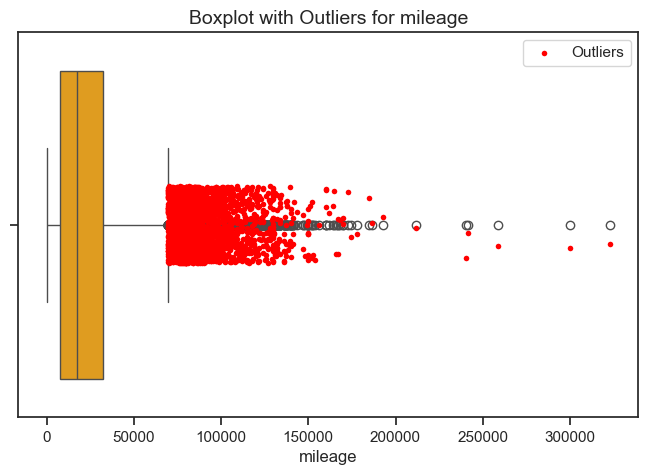

Column: tax - Number of Outliers: 15636
Column: tax - % of Outliers: 26.32%



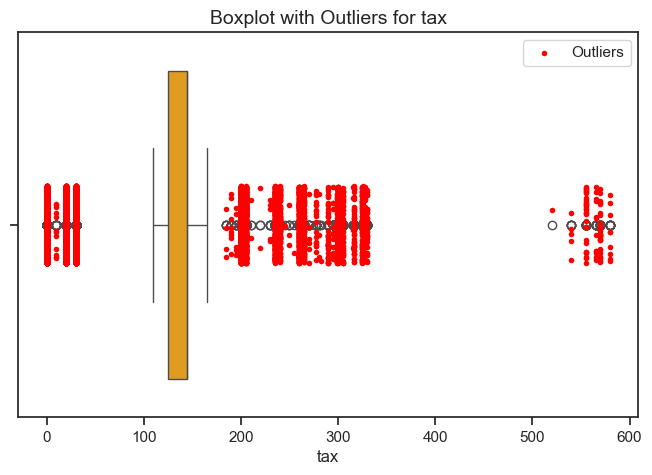

Column: mpg - Number of Outliers: 1377
Column: mpg - % of Outliers: 2.32%



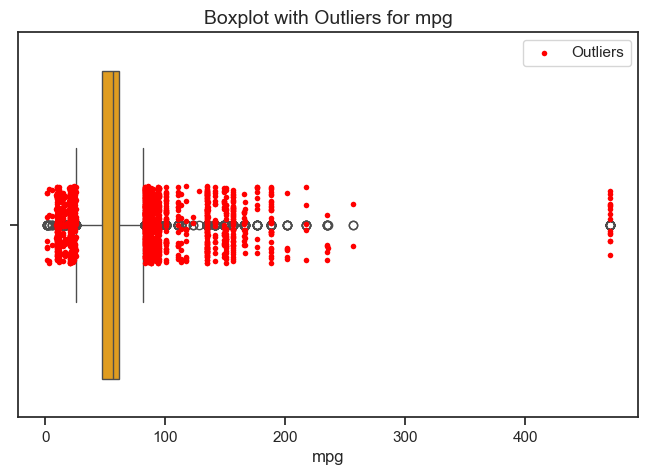

Column: engineSize - Number of Outliers: 495
Column: engineSize - % of Outliers: 0.83%



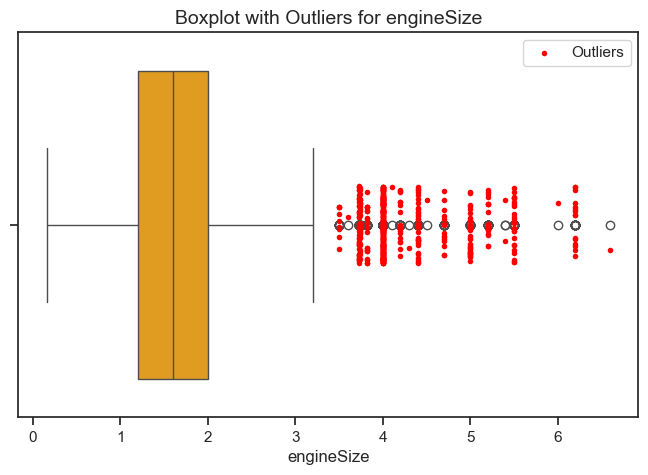

Column: paintQuality% - Number of Outliers: 0
Column: paintQuality% - % of Outliers: 0.00%



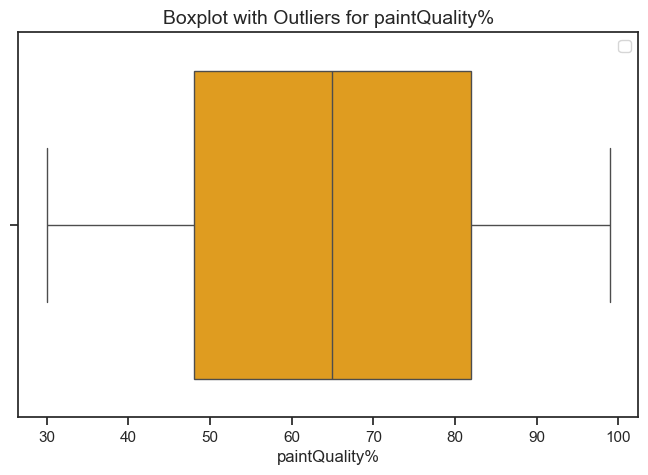

Column: previousOwners - Number of Outliers: 0
Column: previousOwners - % of Outliers: 0.00%



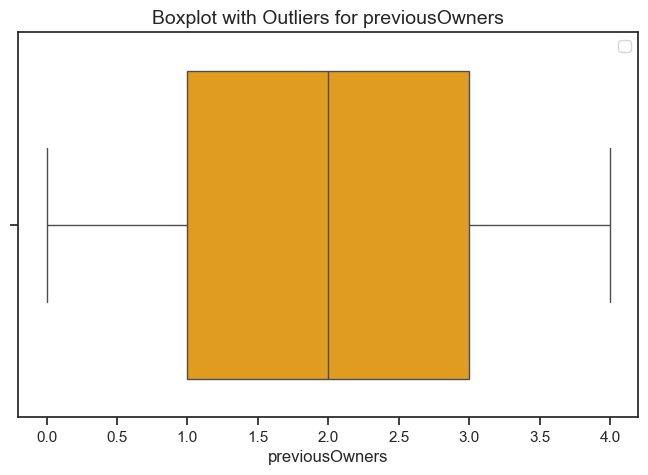

Column: carAge - Number of Outliers: 1396
Column: carAge - % of Outliers: 2.35%



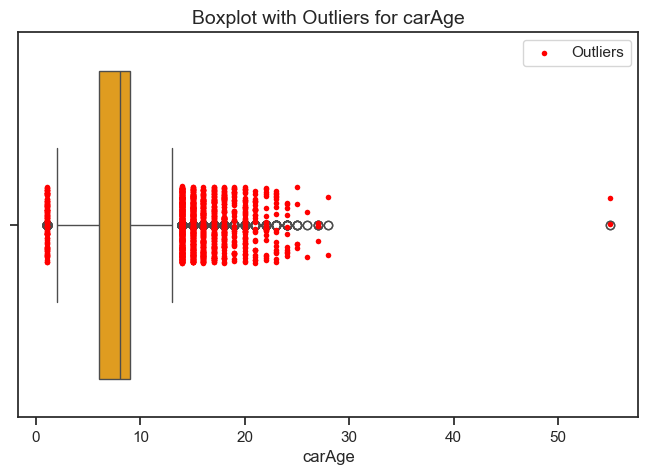

Column  Num_Outliers  Pct_Outliers
0     mileage          2639      4.442163
1         tax         15636     26.319688
2         mpg          1377      2.317870
3  engineSize           495      0.833221
4      carAge          1396      2.349852

In [151]:
detect_outliers_iqr(X_train[['mileage','tax','mpg','engineSize','paintQuality%','previousOwners','carAge']], threshold=0.001)

### Dealing with outliers

***mileage***

In [152]:
X_train[X_train['mileage'] > 250000]

mileage    tax   mpg  engineSize  paintQuality%  previousOwners  \
carID                                                                     
4692   323000.0  200.0  44.1         2.0           74.0               1   
48382  300000.0  125.0  57.6         1.9           79.0               2   
45370  259000.0  540.0  30.7         3.0           54.0               1   

       carAge  Brand_audi  Brand_bmw  Brand_ford  ...  Brand_volkswagen  \
carID                                             ...                     
4692     17.0         1.0        0.0         0.0  ...               0.0   
48382    15.0         0.0        0.0         0.0  ...               0.0   
45370    15.0         0.0        0.0         0.0  ...               0.0   

       transmission_automatic  transmission_manual  transmission_semi-auto  \
carID                                                                        
4692                      0.0                  1.0                     0.0   
48382                     0.0                  1.0                     0.0   
45370                     1.0                  0.0                     0.0   

       fuelType_diesel  fuelType_electric  fuelType_hybrid  fuelType_petrol  \
carID                                                                         
4692               1.0                0.0              0.0              0.0   
48382              1.0                0.0              0.0              0.0   
45370              1.0                0.0              0.0              0.0   

       hasDamage  model_te  
carID                       
4692         0.0  2.209209  
48382        0.0  1.634715  
45370        0.0  2.107895  

[3 rows x 25 columns]

Since having more than 250000 miles in 15+ years is completely possible, we will not treat them as wrong values

***tax***

In [153]:
X_train[X_train['tax'] == 0]

mileage  tax    mpg  engineSize  paintQuality%  previousOwners  carAge  \
carID                                                                           
25240  23260.0  0.0   74.3         1.5           61.0               1     9.0   
18710  50605.0  0.0   74.3         1.5           42.0               1     9.0   
73868  34021.0  0.0   74.3         1.6           98.0               4     8.0   
67061  29000.0  0.0  188.3         1.4           72.0               2     9.0   
65554  38946.0  0.0   74.3         1.6           31.0               3     9.0   
...        ...  ...    ...         ...            ...             ...     ...   
61129  53686.0  0.0   76.3         1.6           64.0               3    10.0   
34415  47500.0  0.0   78.4         1.6           32.0               1    10.0   
53188  13467.0  0.0   86.0         1.5           82.0               4     9.0   
32761  33830.0  0.0   78.4         1.6           70.0               2    10.0   
49783  53339.0  0.0   68.9         1.0           83.0               1    10.0   

       Brand_audi  Brand_bmw  Brand_ford  ...  Brand_volkswagen  \
carID                                     ...                     
25240         0.0        0.0         1.0  ...               0.0   
18710         0.0        0.0         1.0  ...               0.0   
73868         0.0        0.0         0.0  ...               1.0   
67061         0.0        0.0         0.0  ...               1.0   
65554         0.0        0.0         0.0  ...               1.0   
...           ...        ...         ...  ...               ...   
61129         0.0        0.0         0.0  ...               0.0   
34415         0.0        0.0         0.0  ...               0.0   
53188         0.0        0.0         0.0  ...               0.0   
32761         0.0        0.0         0.0  ...               0.0   
49783         0.0        0.0         0.0  ...               0.0   

       transmission_automatic  transmission_manual  transmission_semi-auto  \
carID                                                                        
25240                     0.0                  1.0                     0.0   
18710                     0.0                  1.0                     0.0   
73868                     0.0                  1.0                     0.0   
67061                     1.0                  0.0                     0.0   
65554                     0.0                  1.0                     0.0   
...                       ...                  ...                     ...   
61129                     0.0                  1.0                     0.0   
34415                     0.0                  1.0                     0.0   
53188                     1.0                  0.0                     0.0   
32761                     0.0                  1.0                     0.0   
49783                     0.0                  1.0                     0.0   

       fuelType_diesel  fuelType_electric  fuelType_hybrid  fuelType_petrol  \
carID                                                                         
25240              1.0                0.0              0.0              0.0   
18710              1.0                0.0              0.0              0.0   
73868              1.0                0.0              0.0              0.0   
67061              0.0                0.0              0.0              1.0   
65554              1.0                0.0              0.0              0.0   
...                ...                ...              ...              ...   
61129              1.0                0.0              0.0              0.0   
34415              1.0                0.0              0.0              0.0   
53188              0.0                0.0              1.0              0.0   
32761              1.0                0.0              0.0              0.0   
49783              0.0                0.0              0.0              1.0   

       hasDamage  model_te  
carID    

In [154]:
X_train.loc[(X_train['tax'] == 0) & (X_train['fuelType_electric'] == 1)].shape[0]

3

Since we have a lot of tax values (3371) = 0 and we do not know the specific laws of the country about the car taxes, we can't assume that those values are incorrect.

In [155]:
X_train[X_train['tax'] > 500].sample(20)

mileage    tax   mpg  engineSize  paintQuality%  previousOwners  \
carID                                                                     
3596    43752.0  555.0  28.8         4.0           71.0               3   
39351   13212.0  570.0  23.7         3.0           80.0               2   
6094    52500.0  580.0  21.0         4.2           88.0               4   
44623   69000.0  555.0  32.5         3.0           69.0               3   
44516   79000.0  555.0  29.1         3.5           47.0               4   
34980   26000.0  555.0  28.0         5.5           92.0               1   
12984   28500.0  565.0  28.5         4.4           89.0               1   
42435   86000.0  555.0  30.4         3.0           55.0               4   
21006   69382.0  555.0  27.4         2.5           52.0               1   
14652   49689.0  565.0  28.5         4.4           46.0               3   
46065   42422.0  555.0  28.8         5.5           43.0               3   
9888    53249.0  565.0  28.5         4.4           93.0               3   
12122   25684.0  570.0  25.4         4.4           48.0               0   
64835   63978.0  555.0  26.6         2.8           76.0               0   
38935   70952.0  565.0  28.5         3.0           43.0               2   
40793  110000.0  555.0  28.8         3.0           56.0               0   
39737   33271.0  580.0  23.9         5.5           30.0               0   
44937   41866.0  570.0  23.5         6.2           80.0               0   
35612   50916.5  570.0  23.5         6.2           44.0               2   
10681   20000.0  540.0  28.8         2.2           70.0               1   

       carAge  Brand_audi  Brand_bmw  Brand_ford  ...  Brand_volkswagen  \
carID                                             ...                     
3596     11.0         1.0        0.0         0.0  ...               0.0   
39351    10.0         0.0        0.0         0.0  ...               0.0   
6094     17.0         1.0        0.0         0.0  ...               0.0   
44623    14.0         0.0        0.0         0.0  ...               0.0   
44516    15.0         0.0        0.0         0.0  ...               0.0   
34980    11.0         0.0        0.0         0.0  ...               0.0   
12984    10.0         0.0        1.0         0.0  ...               0.0   
42435    16.0         0.0        0.0         0.0  ...               0.0   
21006    13.0         0.0        0.0         1.0  ...               0.0   
14652     9.0         0.0        1.0         0.0  ...               0.0   
46065    10.0         0.0        0.0         0.0  ...               0.0   
9888     11.0         0.0        1.0         0.0  ...               0.0   
12122     9.0         0.0        1.0         0.0  ...               0.0   
64835    14.0         0.0        0.0         0.0  ...               0.0   
38935    19.0         0.0        0.0         0.0  ...               0.0   
40793    17.0         0.0        0.0         0.0  ...               0.0   
39737    11.0         0.0        0.0         0.0  ...               0.0   
44937    12.0         0.0        0.0         0.0  ...               0.0   
35612    12.0         0.0        0.0         0.0  ...               0.0   
10681    19.0         0.0        1.0         0.0  ...               0.0   

       transmission_automatic  transmission_manual  transmission_semi-auto  \
carID                                                                        
3596                      1.0                  0.0                     0.0   
39351                     1.0                  0.0                     0.0   
6094                      1.0                  0.0                     0.0   
44623                     1.0                  0.0                     0.0   
44516                     1.0                  0.0                     0.0   
34980                     1.0                  0.0                     0.0   
12984                     1.0                  0.0                     0.0   
4243

Since all cars with tax values higher than 500 either have "large" engine sizes, are "old," or are combustion-engine, which are usually factors that contribute to a higher tax values for cars, we will not consider these values ​​as outliers.

***mpg***

In [156]:
X_train[X_train['mpg']>400]

mileage    tax    mpg  engineSize  paintQuality%  previousOwners  \
carID                                                                     
10133  22331.0    0.0  470.8         0.6           95.0               4   
9815   20013.0    0.0  470.8         0.6           30.0               0   
8993    9990.0    0.0  470.8         0.6           44.0               0   
13075  33931.0    0.0  470.8         0.6           31.0               4   
9737   34539.0    0.0  470.8         0.6           42.0               0   
12853  10839.0    0.0  470.8         0.6           31.0               4   
13378   9886.0    0.0  470.8         0.6           44.0               0   
14531  36429.0    0.0  470.8         0.6           30.0               2   
9196   19995.0    0.0  470.8         0.6           79.0               3   
13430  41146.0    0.0  470.8         0.6           69.0               1   
12269  26965.0  140.0  470.8         0.6           81.0               3   
10967  41063.0    0.0  470.8         0.6           34.0               0   
10327  42479.0    0.0  470.8         0.6           79.0               2   
10695  22331.0  135.0  470.8         0.6           54.0               1   
11532  35446.0    0.0  470.8         0.6           59.0               3   

       carAge  Brand_audi  Brand_bmw  Brand_ford  ...  Brand_volkswagen  \
carID                                             ...                     
10133     8.0         0.0        1.0         0.0  ...               0.0   
9815      9.0         0.0        1.0         0.0  ...               0.0   
8993      9.0         0.0        1.0         0.0  ...               0.0   
13075    10.0         0.0        1.0         0.0  ...               0.0   
9737     11.0         0.0        1.0         0.0  ...               0.0   
12853     8.0         0.0        1.0         0.0  ...               0.0   
13378    10.0         0.0        1.0         0.0  ...               0.0   
14531     8.0         0.0        1.0         0.0  ...               0.0   
9196      9.0         0.0        1.0         0.0  ...               0.0   
13430     8.0         0.0        1.0         0.0  ...               0.0   
12269     8.0         0.0        1.0         0.0  ...               0.0   
10967     9.0         0.0        1.0         0.0  ...               0.0   
10327    11.0         0.0        1.0         0.0  ...               0.0   
10695     8.0         0.0        1.0         0.0  ...               0.0   
11532     9.0         0.0        1.0         0.0  ...               0.0   

       transmission_automatic  transmission_manual  transmission_semi-auto  \
carID                                                                        
10133                     1.0                  0.0                     0.0   
9815                      1.0                  0.0                     0.0   
8993                      1.0                  0.0                     0.0   
13075                     1.0                  0.0                     0.0   
9737                      1.0                  0.0                     0.0   
12853                     1.0                  0.0                     0.0   
13378                     1.0                  0.0                     0.0   
14531                     1.0                  0.0                     0.0   
9196                      1.0                  0.0                     0.0   
13430                     1.0                  0.0                     0.0   
12269                     1.0                  0.0                     0.0   
10967                     1.0                  0.0                     0.0   
10327                     1.0                  0.0                     0.0   
10695                     1.0                  0.0                     0.0   
11532                     1.0                  0.0                     0.0   

       fuelType_diesel  fuelType_electric  fuelType_hybrid  fuelType_petrol  \
carID                                            

Since every car with > 400 mpg have the same brand and model, we do not consider those values as wrong values

***engineSize***

In [157]:
X_train[X_train['engineSize']>6]

mileage    tax   mpg  engineSize  paintQuality%  previousOwners  \
carID                                                                    
44794  37000.0  570.0  23.5         6.2           92.0               2   
46012   3000.0  570.0  21.4         6.2           78.0               4   
35290  56444.0  580.0  23.5         6.2           65.0               0   
40094  39000.0  145.0  57.7         6.2           89.0               1   
35117  39000.0  570.0  23.5         6.2           36.0               1   
37825  55000.0  570.0  19.8         6.2           70.0               1   
39852  38000.0  570.0  19.5         6.2           76.0               4   
39900  19562.0  145.0  57.7         6.2           83.0               0   
44937  41866.0  570.0  23.5         6.2           80.0               0   
38980  43442.0  145.0  57.7         6.2           76.0               0   
39752  56444.0  145.0  57.7         6.2           52.0               3   
46372  49964.0  145.0  23.0         6.2           78.0               3   
9197   11297.0  145.0  22.1         6.6           68.0               1   
35612  50916.5  570.0  23.5         6.2           44.0               2   
46536  44000.0  145.0  57.7         6.2           88.0               2   
35538  49964.0  326.0  57.7         6.2           58.0               3   

       carAge  Brand_audi  Brand_bmw  Brand_ford  ...  Brand_volkswagen  \
carID                                             ...                     
44794    11.0         0.0        0.0         0.0  ...               0.0   
46012    14.0         0.0        0.0         0.0  ...               0.0   
35290    11.0         0.0        0.0         0.0  ...               0.0   
40094    12.0         0.0        0.0         0.0  ...               0.0   
35117    12.0         0.0        0.0         0.0  ...               0.0   
37825    17.0         0.0        0.0         0.0  ...               0.0   
39852    15.0         0.0        0.0         0.0  ...               0.0   
39900    11.0         0.0        0.0         0.0  ...               0.0   
44937    12.0         0.0        0.0         0.0  ...               0.0   
38980    12.0         0.0        0.0         0.0  ...               0.0   
39752    11.0         0.0        0.0         0.0  ...               0.0   
46372    12.0         0.0        0.0         0.0  ...               0.0   
9197      8.0         0.0        1.0         0.0  ...               0.0   
35612    12.0         0.0        0.0         0.0  ...               0.0   
46536    12.0         0.0        0.0         0.0  ...               0.0   
35538     7.0         0.0        0.0         0.0  ...               0.0   

       transmission_automatic  transmission_manual  transmission_semi-auto  \
carID                                                                        
44794                     0.0                  0.0                     1.0   
46012                     1.0                  0.0                     0.0   
35290                     1.0                  0.0                     0.0   
40094                     1.0                  0.0                     0.0   
35117                     1.0                  0.0                     0.0   
37825                     0.0                  0.0                     1.0   
39852                     1.0                  0.0                     0.0   
39900                     0.0                  0.0                     1.0   
44937                     1.0                  0.0                     0.0   
38980                     0.0                  0.0                     1.0   
39752                     1.0                  0.0                     0.0   
46372                     0.0                  0.0                     1.0   
9197                      1.0                  0.0                     0.0   
35612                     1.0                  0.0                     0.0   
46536                     1.0                  0.0                     0.0 

Since all the cars with engineSize > 6 are all from the same brand (almost all from the same model) we will not considerer those values as wrong values

***carAge***

In [158]:
X_train[X_train['carAge']>50]

mileage    tax   mpg  engineSize  paintQuality%  previousOwners  \
carID                                                                    
35769  14000.0  305.0  39.2         2.1           44.0               3   
62732  37357.0  200.0  42.2         1.4           60.0               2   

       carAge  Brand_audi  Brand_bmw  Brand_ford  ...  Brand_volkswagen  \
carID                                             ...                     
35769    55.0         0.0        0.0         0.0  ...               0.0   
62732    55.0         0.0        0.0         0.0  ...               0.0   

       transmission_automatic  transmission_manual  transmission_semi-auto  \
carID                                                                        
35769                     1.0                  0.0                     0.0   
62732                     0.0                  1.0                     0.0   

       fuelType_diesel  fuelType_electric  fuelType_hybrid  fuelType_petrol  \
carID                                                                         
35769              1.0                0.0              0.0              0.0   
62732              0.0                0.0              0.0              1.0   

       hasDamage  model_te  
carID                       
35769        0.0  2.551798  
62732        0.0  1.508882  

[2 rows x 25 columns]

In [159]:
# Compute median carAge per model
carAge_median_by_model = X_train.groupby('model_te')['carAge'].median()

# Identify outliers (e.g. carAge > 50)
mask_outliers = X_train['carAge'] > 50

# Replace outliers by model median
X_train.loc[mask_outliers, 'carAge'] = X_train.loc[mask_outliers, 'model_te'].map(carAge_median_by_model)

In [160]:
X_train[X_train['carAge']>50]

Empty DataFrame
Columns: [mileage, tax, mpg, engineSize, paintQuality%, previousOwners, carAge, Brand_audi, Brand_bmw, Brand_ford, Brand_hyundai, Brand_mercedes-benz, Brand_opel, Brand_skoda, Brand_toyota, Brand_volkswagen, transmission_automatic, transmission_manual, transmission_semi-auto, fuelType_diesel, fuelType_electric, fuelType_hybrid, fuelType_petrol, hasDamage, model_te]
Index: []

[0 rows x 25 columns]

## 4. Scaling

We are going to use the "RobustScaler"

In [161]:
# Initialize the scaler
scaler = RobustScaler()

In [162]:
num = ['mileage', 'engineSize', 'tax', 'mpg', 'carAge', 'paintQuality%','previousOwners','model_te']

In [163]:
# Fit the scaler only on TRAIN data
scaler.fit(X_train[num])

# Transform both TRAIN and VALIDATION sets
X_train[num] = scaler.transform(X_train[num])
X_val[num] = scaler.transform(X_val[num])

In [164]:
print(X_train[num].describe())

            mileage    engineSize           tax           mpg        carAge  \
count  59408.000000  59408.000000  59408.000000  59408.000000  59408.000000   
mean       0.234511      0.079628     -1.073478     -0.066175     -0.033814   
std        0.868308      0.703957      3.063800      1.057164      0.723446   
min       -0.705982     -1.806838     -7.250000     -3.874126     -2.333333   
25%       -0.401838     -0.500000     -1.000000     -0.657343     -0.666667   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.598162      0.500000      0.000000      0.342657      0.333333   
max       12.325133      6.250000     21.750000     28.972028      6.666667   

       paintQuality%  previousOwners      model_te  
count   59408.000000    59408.000000  59408.000000  
mean       -0.011761       -0.030417      0.011176  
std         0.585783        0.718595      0.750459  
min        -1.029412       -1.000000     -1.757817  
25%        -0.500000   

## 5.Feature Selection

In [165]:
X_train.columns

Index(['mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'carAge', 'Brand_audi', 'Brand_bmw', 'Brand_ford',
       'Brand_hyundai', 'Brand_mercedes-benz', 'Brand_opel', 'Brand_skoda',
       'Brand_toyota', 'Brand_volkswagen', 'transmission_automatic',
       'transmission_manual', 'transmission_semi-auto', 'fuelType_diesel',
       'fuelType_electric', 'fuelType_hybrid', 'fuelType_petrol', 'hasDamage',
       'model_te'],
      dtype='object')

In [166]:
numeric = [
    'mileage',
    'tax',
    'mpg',
    'engineSize',
    'paintQuality%',
    'previousOwners',
    'carAge',
    'model_te'
]


In [167]:
encoded_features = [
    'Brand_audi',
    'Brand_bmw',
    'Brand_ford',
    'Brand_hyundai',
    'Brand_mercedes-benz',
    'Brand_opel',
    'Brand_skoda',
    'Brand_toyota',
    'Brand_volkswagen',
    'transmission_automatic',
    'transmission_manual',
    'transmission_semi-auto',
    'fuelType_diesel',
    'fuelType_electric',
    'fuelType_hybrid',
    'fuelType_petrol'
]


In [168]:
binary_features = ['hasDamage']

In [169]:
categ_features = encoded_features + binary_features 

all_features = numeric + categ_features

### 5.1 Filter-Based Methods

In [170]:
X_train[numeric].var()

mileage           0.753958
tax               9.386870
mpg               1.117595
engineSize        0.495556
paintQuality%     0.343142
previousOwners    0.516379
carAge            0.523373
model_te          0.563188
dtype: float64

**Spearman Correlation Matrix**

In [171]:
cor_spearman = X_train[numeric].corr(method ='spearman')
cor_spearman

mileage       tax       mpg  engineSize  paintQuality%  \
mileage         1.000000 -0.248110  0.304118    0.096353      -0.004018   
tax            -0.248110  1.000000 -0.520311    0.147358       0.002651   
mpg             0.304118 -0.520311  1.000000   -0.189983       0.003256   
engineSize      0.096353  0.147358 -0.189983    1.000000       0.002275   
paintQuality%  -0.004018  0.002651  0.003256    0.002275       1.000000   
previousOwners  0.005071  0.002350 -0.000976    0.008758      -0.004416   
carAge          0.784987 -0.305048  0.285834    0.033717      -0.009214   
model_te        0.031293  0.167126 -0.245228    0.816538       0.000763   

                previousOwners    carAge  model_te  
mileage               0.005071  0.784987  0.031293  
tax                   0.002350 -0.305048  0.167126  
mpg                  -0.000976  0.285834 -0.245228  
engineSize            0.008758  0.033717  0.816538  
paintQuality%        -0.004416 -0.009214  0.000763  
previousOwners        1.000000 -0.000274  0.006185  
carAge               -0.000274  1.000000 -0.052650  
model_te              0.006185 -0.052650  1.000000

In [172]:
def cor_heatmap(cor):
    plt.figure(figsize=(12,10))
    sns.heatmap(data = cor, annot = True, cmap = 'PiYG', fmt='.1')
    plt.show()

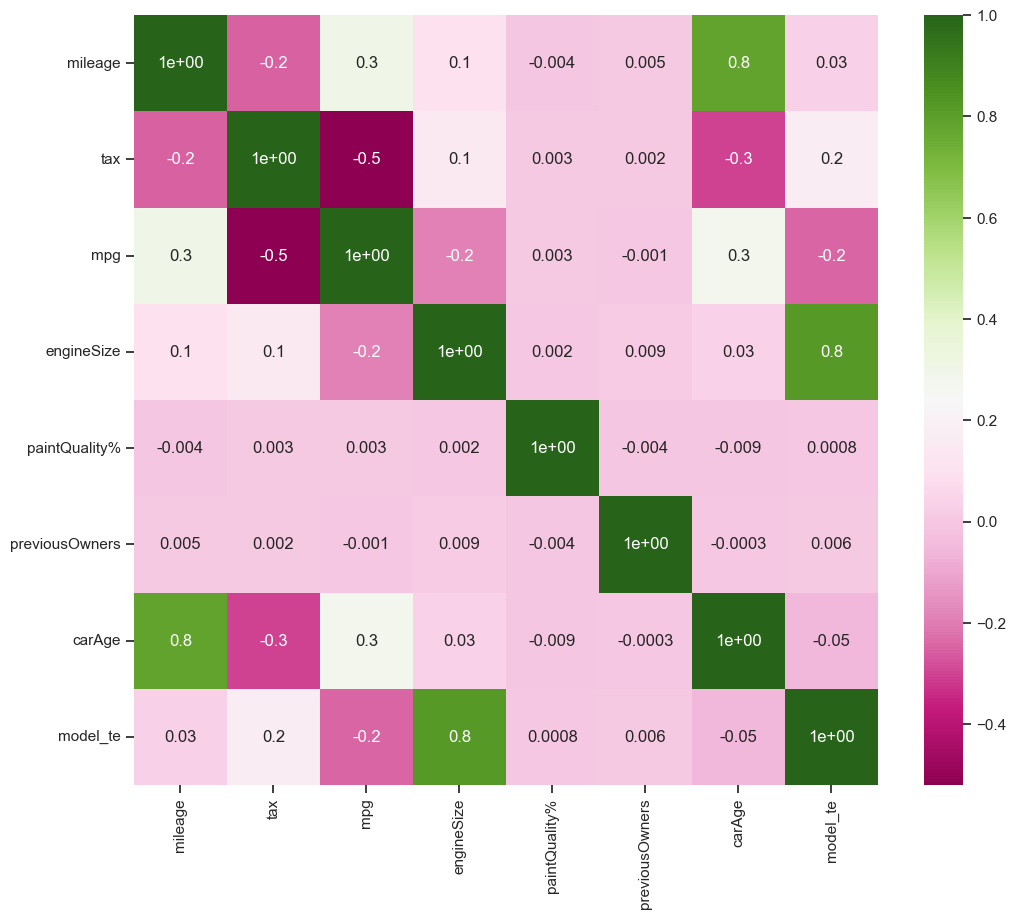

In [173]:
cor_heatmap(cor_spearman)

**Chi Squared Test**

In [174]:
def TestIndependence(X,y,var,alpha=0.05):        
    dfObserved = pd.crosstab(y,X) 
    chi2, p, dof, expected = stats.chi2_contingency(dfObserved.values)
    dfExpected = pd.DataFrame(expected, columns=dfObserved.columns, index = dfObserved.index)
    if p<alpha:
        result="{0} is IMPORTANT for Prediction".format(var)
    else:
        result="{0} is NOT an important predictor. (Discard {0} from model)".format(var)
    print(result)

In [175]:
for var in encoded_features:
    TestIndependence(X_train[var], y_train, var)

Brand_audi is IMPORTANT for Prediction
Brand_bmw is IMPORTANT for Prediction
Brand_ford is IMPORTANT for Prediction
Brand_hyundai is IMPORTANT for Prediction
Brand_mercedes-benz is IMPORTANT for Prediction
Brand_opel is IMPORTANT for Prediction
Brand_skoda is NOT an important predictor. (Discard Brand_skoda from model)
Brand_toyota is IMPORTANT for Prediction
Brand_volkswagen is IMPORTANT for Prediction
transmission_automatic is IMPORTANT for Prediction
transmission_manual is IMPORTANT for Prediction
transmission_semi-auto is IMPORTANT for Prediction
fuelType_diesel is IMPORTANT for Prediction
fuelType_electric is NOT an important predictor. (Discard fuelType_electric from model)
fuelType_hybrid is IMPORTANT for Prediction
fuelType_petrol is IMPORTANT for Prediction


In [176]:
X_train[X_train['Brand_skoda'] == 1]

mileage   tax       mpg  engineSize  paintQuality%  previousOwners  \
carID                                                                        
51043  0.181992 -6.25  0.251748      -0.750      -0.441176             1.0   
50222 -0.705417  0.00 -0.153846       0.000       0.705882             0.5   
47968 -0.141245  0.00  0.000000      -0.125       0.970588             0.0   
46870  0.056078  0.25  0.251748      -0.500      -0.911765             0.5   
50170 -0.337438  0.25  0.251748      -0.750      -0.617647             0.0   
...         ...   ...       ...         ...            ...             ...   
51077 -0.130876  0.00  0.083916      -0.750       0.705882             0.0   
51022  0.238353 -6.25  0.251748      -0.500      -0.470588             1.0   
49125 -0.218302  0.00  0.083916      -0.750       0.470588            -0.5   
49783  1.445893 -7.25  0.867133      -0.750       0.529412            -0.5   
47020  0.094930  0.00  0.755245       0.500      -0.294118            -1.0   

         carAge  Brand_audi  Brand_bmw  Brand_ford  ...  Brand_volkswagen  \
carID                                               ...                     
51043  0.333333         0.0        0.0         0.0  ...               0.0   
50222 -0.666667         0.0        0.0         0.0  ...               0.0   
47968  0.000000         0.0        0.0         0.0  ...               0.0   
46870  0.000000         0.0        0.0         0.0  ...               0.0   
50170 -0.333333         0.0        0.0         0.0  ...               0.0   
...         ...         ...        ...         ...  ...               ...   
51077 -0.666667         0.0        0.0         0.0  ...               0.0   
51022  0.666667         0.0        0.0         0.0  ...               0.0   
49125 -0.666667         0.0        0.0         0.0  ...               0.0   
49783  0.666667         0.0        0.0         0.0  ...               0.0   
47020  0.000000         0.0        0.0         0.0  ...               0.0   

       transmission_automatic  transmission_manual  transmission_semi-auto  \
carID                                                                        
51043                     0.0                  1.0                     0.0   
50222                     0.0                  0.0                     1.0   
47968                     0.0                  1.0                     0.0   
46870                     0.0                  1.0                     0.0   
50170                     0.0                  0.0                     1.0   
...                       ...                  ...                     ...   
51077                     0.0                  1.0                     0.0   
51022                     0.0                  0.0                     1.0   
49125                     0.0                  1.0                     0.0   
49783                     0.0                  1.0                     0.0   
47020                     0.0                  1.0                     0.0   

       fuelType_diesel  fuelType_electric  fuelType_hybrid  fuelType_petrol  \
carID                                                                         
51043              0.0                0.0              0.0              1.0   
50222              1.0                0.0              0.0              0.0   
47968              0.0                0.0              0.0              1.0   
46870              0.0                0.0              0.0              1.0   
50170              0.0                0.0              0.0              1.0   
...                ...                ...              ...              ...   
51077              0.0                0.0              0.0              1.0   
51022              0.0                0.0              0.0              1.0   
49125              0.0                0.0              0.0              1.0   
49783              0.0                0.0              0.0              1.0   
47020              1.0      

In [177]:
X_train[X_train['fuelType_electric'] == 1]

mileage   tax        mpg  engineSize  paintQuality%  previousOwners  \
carID                                                                         
64169  0.684277 -7.25  12.510490       -0.25       0.529412            -0.5   
21931  0.283660 -7.25   0.755245        0.50       0.500000             1.0   
16306 -0.326949 -7.25   0.755245        0.50      -0.176471             0.5   

         carAge  Brand_audi  Brand_bmw  Brand_ford  ...  Brand_volkswagen  \
carID                                               ...                     
64169  0.666667         0.0        0.0         0.0  ...               0.0   
21931  0.333333         0.0        0.0         1.0  ...               0.0   
16306  0.333333         0.0        0.0         1.0  ...               0.0   

       transmission_automatic  transmission_manual  transmission_semi-auto  \
carID                                                                        
64169                     1.0                  0.0                     0.0   
21931                     1.0                  0.0                     0.0   
16306                     1.0                  0.0                     0.0   

       fuelType_diesel  fuelType_electric  fuelType_hybrid  fuelType_petrol  \
carID                                                                         
64169              0.0                1.0              0.0              0.0   
21931              0.0                1.0              0.0              0.0   
16306              0.0                1.0              0.0              0.0   

       hasDamage  model_te  
carID                       
64169        0.0 -0.427684  
21931        0.0  0.414933  
16306        0.0  0.414933  

[3 rows x 25 columns]

### 5.2 Wrapper Methods

**RFE**

In [178]:
estimator = RandomForestRegressor(n_estimators=200, random_state=0, n_jobs=-1)


selector = RFE(
    estimator=estimator,
    n_features_to_select=12,   
    step=1,
    verbose=1
)


selector.fit(X_train, y_train)


selected_features = X_train.columns[selector.support_]
print("Selected features:", selected_features)


y_pred = estimator.fit(X_train[selected_features], y_train).predict(X_val[selected_features])
print("Validation MAE:", mean_absolute_error(y_val, y_pred))

Fitting estimator with 25 features.
Fitting estimator with 24 features.
Fitting estimator with 23 features.
Fitting estimator with 22 features.
Fitting estimator with 21 features.
Fitting estimator with 20 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Selected features: Index(['mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%',
       'previousOwners', 'carAge', 'Brand_audi', 'Brand_bmw', 'Brand_ford',
       'transmission_manual', 'model_te'],
      dtype='object')
Validation MAE: 1348.1492670820346


Best k = 24 with Validation MAE = 1323.931
Selected features: ['transmission_manual', 'carAge', 'engineSize', 'model_te', 'mileage', 'mpg', 'paintQuality%', 'tax', 'Brand_audi', 'Brand_ford', 'previousOwners', 'Brand_volkswagen', 'Brand_bmw', 'Brand_mercedes-benz', 'fuelType_petrol', 'fuelType_diesel', 'Brand_opel', 'transmission_semi-auto', 'Brand_skoda', 'transmission_automatic', 'Brand_toyota', 'Brand_hyundai', 'fuelType_hybrid', 'fuelType_electric']


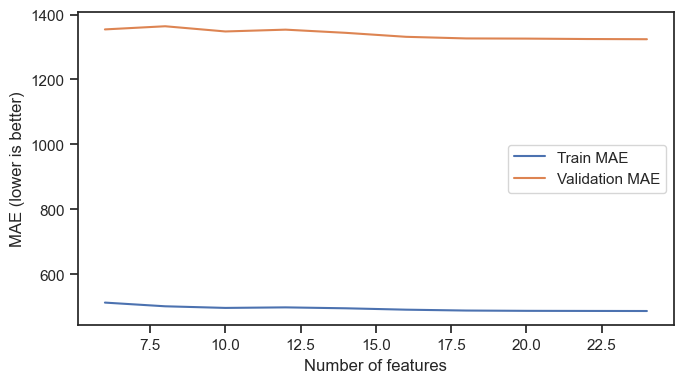

In [179]:
# Base model (smaller n_estimators during selection to be fast)
ranker = RandomForestRegressor(
    n_estimators=150,      # smaller for speed; increase later for final model
    random_state=42,
    n_jobs=-1
)
ranker.fit(X_train, y_train)

# Feature ranking by impurity-based importance (fast)
importances = ranker.feature_importances_
sorted_idx = np.argsort(importances)[::-1]
sorted_feats = X_train.columns[sorted_idx]

# 2) Sweep top-k subsets (10–15 fits only)
k_grid = list(range(6, min(26, X_train.shape[1] + 1), 2))  # e.g., 6,8,...,24
train_mae, val_mae = [], []
best_k, best_mae, best_feats = None, np.inf, None

for k in k_grid:
    feats_k = list(sorted_feats[:k])
    model_k = RandomForestRegressor(
        n_estimators=150,   # keep it light for the sweep
        random_state=42,
        n_jobs=-1
    )
    model_k.fit(X_train[feats_k], y_train)
    y_tr = model_k.predict(X_train[feats_k])
    y_va = model_k.predict(X_val[feats_k])

    tr_mae = mean_absolute_error(y_train, y_tr)
    va_mae = mean_absolute_error(y_val, y_va)
    train_mae.append(tr_mae)
    val_mae.append(va_mae)

    if va_mae < best_mae:
        best_mae = va_mae
        best_k = k
        best_feats = feats_k

print(f"Best k = {best_k} with Validation MAE = {best_mae:.3f}")
print("Selected features:", best_feats)

# 3) Retrain a stronger final model on the chosen features
final_model = RandomForestRegressor(
    n_estimators=400,  # now you can increase for accuracy
    random_state=42,
    n_jobs=-1
)
final_model.fit(X_train[best_feats], y_train)




plt.figure(figsize=(7,4))
plt.plot(k_grid, train_mae, label="Train MAE")
plt.plot(k_grid, val_mae, label="Validation MAE")
plt.xlabel("Number of features")
plt.ylabel("MAE (lower is better)")
plt.legend()
plt.tight_layout()
plt.show()

### 5.3 Embedded Methods

In [180]:
def plot_importance(coef,name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(8,10))
    imp_coef.plot(kind = "barh")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

In [181]:
reg = LassoCV()

In [182]:
X_train['engineSize'] = X_train['engineSize'].fillna(3)

In [183]:
reg.fit(X_train[all_features], y_train)

LassoCV()

In [184]:
coef = pd.Series(reg.coef_, index = X_train[all_features].columns)
coef

mileage                  -2700.355002
tax                        -68.722372
mpg                       -542.728439
engineSize                4380.280167
paintQuality%              -21.848975
previousOwners               0.000000
carAge                   -3767.171936
model_te                  4557.487310
Brand_audi                2698.801977
Brand_bmw                   -0.000000
Brand_ford                 923.260917
Brand_hyundai             -917.140005
Brand_mercedes-benz       2016.315727
Brand_opel               -2296.823346
Brand_skoda                 -0.000000
Brand_toyota             -1543.183263
Brand_volkswagen           979.250041
transmission_automatic       0.000000
transmission_manual      -1639.119891
transmission_semi-auto     564.621272
fuelType_diesel          -1714.653603
fuelType_electric           -0.000000
fuelType_hybrid           1811.627365
fuelType_petrol              0.000000
hasDamage                    0.000000
dtype: float64

In [185]:
print("Lasso picked " + str(sum(coef != 0)) + " variables and eliminated the other " +  str(sum(coef == 0)) + " variables")

Lasso picked 18 variables and eliminated the other 7 variables


In [186]:
coef.sort_values()

carAge                   -3767.171936
mileage                  -2700.355002
Brand_opel               -2296.823346
fuelType_diesel          -1714.653603
transmission_manual      -1639.119891
Brand_toyota             -1543.183263
Brand_hyundai             -917.140005
mpg                       -542.728439
tax                        -68.722372
paintQuality%              -21.848975
Brand_skoda                 -0.000000
Brand_bmw                   -0.000000
transmission_automatic       0.000000
fuelType_electric           -0.000000
previousOwners               0.000000
fuelType_petrol              0.000000
hasDamage                    0.000000
transmission_semi-auto     564.621272
Brand_ford                 923.260917
Brand_volkswagen           979.250041
fuelType_hybrid           1811.627365
Brand_mercedes-benz       2016.315727
Brand_audi                2698.801977
engineSize                4380.280167
model_te                  4557.487310
dtype: float64

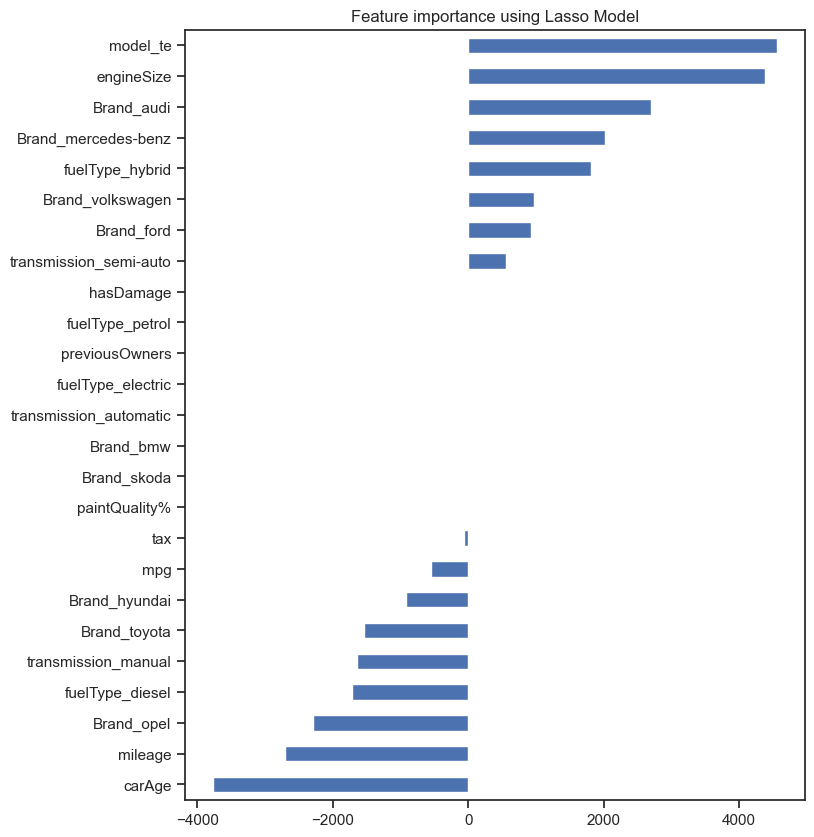

In [187]:
plot_importance(coef,'Lasso')

In [188]:
print(numeric, categ_features)

['mileage', 'tax', 'mpg', 'engineSize', 'paintQuality%', 'previousOwners', 'carAge', 'model_te'] ['Brand_audi', 'Brand_bmw', 'Brand_ford', 'Brand_hyundai', 'Brand_mercedes-benz', 'Brand_opel', 'Brand_skoda', 'Brand_toyota', 'Brand_volkswagen', 'transmission_automatic', 'transmission_manual', 'transmission_semi-auto', 'fuelType_diesel', 'fuelType_electric', 'fuelType_hybrid', 'fuelType_petrol', 'hasDamage']


### Final Features

| Predictor              | Spearman  | RFE RF | Lasso | Chi-Square | What to do? (One possible way to "solve") |
|-------------------------|-----------------|---------|-------|-------------|--------------------------------------------|
| model_te               | Keep      | Keep    | Keep  | -           | Keep|
| engineSize             | Choose between 'model_te' or 'engineSize'       | Keep    | Keep  | -    | Try with and without                                      |
| Brand_ford             | -      | Keep      | Keep     | Keep           | Keep                                          |
| fuelType_hybrid        | -      | Keep    | Keep  | Keep          | Keep                      |
| Brand_audi             | -          | Keep       | Keep    | Keep           | Keep                                          |
| transmission_semi-auto | -        | Keep    | Keep  | Keep          | Keep                    |
| Brand_volkswagen       | -      | Keep    | Keep  | Keep           | Keep                      |
| Brand_mercedes-benz    | -          | Keep       | Keep     | Keep           | Keep                                          |
| previousOwners         | Discard     | Keep | Discard | -        | Discard                      |
| paintQuality%          | Discard     | Keep   | Discard     | -        | Discard                      |
| hasDamage              | -      | Discard    | Discard     | -        | Discard                      |
| fuelType_electric      | -      | Keep    | Discard     | Discard        | Discard                      |
| transmission_automatic | -      | Keep    | Discard     | Keep        | Try with and without                      |
| fuelType_petrol        | -      | Keep    | Discard     | Keep        | Try with and without                      |
| Brand_hyundai          | -     | Keep       | Keep     | Keep           | Keep                                         |
| Brand_bmw              | -       | Keep       | Discard     | Keep           | Try with and without                                          |
| Brand_skoda            | -       | Keep       | Discard   | Discard           | Discard                                          |
| tax                    | Keep        | Keep    | Keep  | -     | Keep                                      |
| Brand_opel             | -    | Keep       | Keep  | Keep           | Keep                                          |
| Brand_toyota           | -    | Keep       | Keep  | Keep           | Keep                                          |
| mpg                    | Keep     | Keep | Keep  | -       | Keep                      |
| transmission_manual    | -      | Keep    | Keep | Keep        | Keep                      |
| fuelType_diesel        | -     | Keep    | Keep | Keep        | Keep                      |
| mileage                | Keep       | Keep    | Keep | -     | Keep               |
| carAge                 | Choose between 'carAge' and 'mileage'      | Keep    | Keep | -       | Try with and without                      |


Let's create a new list with the selected features

In [189]:
cols_selected = ['mileage', 'tax', 'mpg', 'engineSize' , 'carAge', 'model_te','Brand_audi', 'Brand_bmw', 'Brand_ford', 'Brand_hyundai', 'Brand_mercedes-benz', 'Brand_opel',  'Brand_toyota', 'Brand_volkswagen', 'transmission_automatic', 'transmission_manual', 'transmission_semi-auto', 'fuelType_diesel',  'fuelType_hybrid', 'fuelType_petrol']

# Modeling

## R**2

In [190]:
X_train_filtered = X_train[cols_selected]
X_val_filtered = X_val[cols_selected]
#test_filtered

In [191]:
lr = LinearRegression().fit(X_train_filtered,y_train)

In [192]:
#rfr = RandomForestRegressor(n_estimators=400, random_state=42, n_jobs=-1).fit(X_train_filtered, y_train)

In [193]:

#lasso = Lasso(alpha=0.001, random_state=42)
#lasso.fit(X_train_filtered, y_train)

In [194]:
y_pred_train = lr.predict(X_train_filtered)
y_pred_val = lr.predict(X_val_filtered)

In [195]:
r2_t = r2_score(y_train, y_pred_train)
r2_t

0.7795635309026433

In [196]:
r2_v = r2_score(y_val, y_pred_val)
r2_v

0.7589370677340722

In [197]:
r2 = r2_score(y_train, y_pred_train)
n = len(y_train)
p = len(X_train_filtered.columns)

def adj_r2 (r2,n,p):
    return 1-(1-r2)*(n-1)/(n-p-1)

ar2_t = adj_r2(r2,n,p)
ar2_t 

0.7794892936220609

In [198]:
r2 = r2_score(y_val, y_pred_val)
n = len(y_val)
p = len(X_val_filtered.columns)

ar2_v = adj_r2(r2,n,p)
ar2_v

0.7586119879252045

## MAE


In [199]:
mae_t = mean_absolute_error(y_train, y_pred_train)
mae_t

2889.7256773024847

In [200]:
mae_v = mean_absolute_error(y_val, y_pred_val)
mae_v

2920.331779577979

## MSE

In [201]:
mse_t = mean_squared_error(y_train, y_pred_train)
mse_t

20932033.63723266

In [202]:
mse_v = mean_squared_error(y_val, y_pred_val)
mse_v

22383441.757508654

## RMSE

In [203]:
rmse_t = root_mean_squared_error(y_train, y_pred_train)
rmse_t

4575.153946834212

In [204]:
rmse_v = root_mean_squared_error(y_val, y_pred_val)
rmse_v

4731.114219452818

## MedAE

In [205]:
medae_t = median_absolute_error(y_train, y_pred_train)
medae_t

1994.6803336851444

In [206]:
medae_v =median_absolute_error(y_val, y_pred_val)
medae_v

2024.6325256128548

## MAPE

In [207]:
mape_t = mean_absolute_percentage_error(y_train, y_pred_train)
mape_t

0.21664743783672177

In [208]:
mape_v = mean_absolute_percentage_error(y_val, y_pred_val)
mape_v

0.22421418978364932

## Comparing differences

In [209]:
regression_metrics = pd.DataFrame({
    'Metric': ['R2', 'Adjusted R2', 'MAE', 'MSE', 'RMSE', 'MedAE', 'MAPE'],
    'Train': [r2_t, ar2_t, mae_t, mse_t, rmse_t, medae_t, mape_t],
    'Validation': [r2_v, ar2_v, mae_v, mse_v, rmse_v, medae_v, mape_v],
    })

regression_metrics

Metric         Train    Validation
0           R2  7.795635e-01  7.589371e-01
1  Adjusted R2  7.794893e-01  7.586120e-01
2          MAE  2.889726e+03  2.920332e+03
3          MSE  2.093203e+07  2.238344e+07
4         RMSE  4.575154e+03  4.731114e+03
5        MedAE  1.994680e+03  2.024633e+03
6         MAPE  2.166474e-01  2.242142e-01

# Make sure the variable types are correctly identified

# Identifier
id_vars = ["carID"]
# Categorical variables (nominal, not ordered)
cat_vars = [
    "Brand",
    "model",
    "transmission",
    "fuelType"
]
# Ordinal variables (ordered but discrete)
ord_vars = [
    "year",
    "previousOwners"
]
# Continuous numerical variables
cont_vars = [
    "mileage",
    "tax",
    "mpg",
    "engineSize",
    "paintQuality%"
]
# Boolean variables
bool_vars = [
    "hasDamage"
]
# Variable groups in a dictionary
var_types = {
    "identifier": id_vars,
    "categorical": cat_vars,
    "ordinal": ord_vars,
    "continuous": cont_vars,
    "boolean": bool_vars
}
# Display 
for k, v in var_types.items():
    print(f"{k.capitalize():<12}: {v}")

In [210]:
# convert the variable types
for col in var_types['categorical']:
    train[col] = train[col].astype('category')

for col in var_types['ordinal']:
    train[col] = train[col].astype('category')

for col in var_types['continuous']:
    train[col] = train[col].astype('float')

for col in var_types['boolean']:
    train[col] = train[col].astype('bool')

NameError: name 'var_types' is not defined

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 71329 entries, 0 to 75972
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   Brand           71329 non-null  category
 1   model           71329 non-null  category
 2   year            69929 non-null  category
 3   price           71329 non-null  int64   
 4   transmission    71329 non-null  category
 5   mileage         69959 non-null  float64 
 6   fuelType        71329 non-null  category
 7   tax             63867 non-null  float64 
 8   mpg             63848 non-null  float64 
 9   engineSize      69898 non-null  float64 
 10  paintQuality%   69889 non-null  float64 
 11  previousOwners  69862 non-null  category
 12  hasDamage       71329 non-null  bool    
dtypes: bool(1), category(6), float64(5), int64(1)
memory usage: 4.4 MB


### 3.2.2 Encoding

In [ ]:
#train.loc[train['tax']> 500, ['model','tax'] ]

model  tax
carID                   
36              rs5  555
288             rs4  565
921             rs6  555
1150            rs4  535
1681             r8  570
1697             r8  570
2020             r8  570
2116            rs6  555
2222            rs5  555
2280            rs4  565
2302             s4  555
2354             r8  570
3167             a6  570
3596            rs6  555
3807            rs6  555
4111             r8  580
4677             r8  570
5096             q7  555
6094             r8  580
6689             s8  555
6752             r8  570
6884             tt  555
6950             a4  570
8198             x5  570
8419             m5  565
8641             x5  570
8651             x5  555
9423       3 series  565
9784       5 series  555
10040      3 series  555
10264            m3  580
10614            m5  555
10681      3 series  540
11113      3 series  555
11701            m6  570
12122            x6  570
12393      5 series  555
12545            x5  570
12984            m5  565
12995            m3  570
13600      6 series  555
13819            x5  570
14613            x5  570
14652            m5  565
14659            m3  570
15388          kuga  555
16785       mustang  580
16805       mustang  570
18162       mustang  570
21006          kuga  555
24745       mustang  570
27138       mustang  580
28113       mustang  570
30357       mustang  570
34571      santa fe  555
34814           slk  555
34980       s class  555
35117       c class  570
35290       c class  580
35606       m class  555
35612       c class  570
35692       g class  570
35970       g class  570
37494       m class  555
37825       e class  570
37949           230  520
38935           slk  565
39351     gle class  570
39737       m class  580
39852       s class  570
40610      gl class  570
40664       e class  555
40793       m class  555
40894      cl class  555
41417       g class  570
41465      sl class  555
41484       s class  555
41531      sl class  555
41842       m class  555
41852       c class  555
42387       m class  555
42435       m class  555
42643      sl class  555
43212       g class  580
43725       c class  570
43941     gle class  570
44516      sl class  555
44623       m class  555
44794       c class  570
44937       c class  570
45321       c class  570
45370       v class  540
45503      gl class  570
45573       m class  565
45626      sl class  565
45646       m class  555
45763       m class  555
46012      sl class  570
46065       e class  555
46607       m class  540
51129  land cruiser  565
52900  land cruiser  540
54636  land cruiser  555
56446        antara  565
60994        zafira  555
64835      insignia  555
68949        sharan  555
70293       touareg  570
72112          golf  570
73570       touareg  580
73980       touareg  570

In [ ]:
#input_df = input_df.dropna(subset=['Brand', 'model', 'transmission', 'fuelType'])

In [ ]:
# Compute mean price per model 
tmp = X_train[['model']].copy()
tmp['price'] = y_train.values
model_mean_price = tmp.groupby('model')['price'].mean()

# Compute global mean (fallback for unseen models)
global_mean_price = y_train.mean()

# Apply encoding
X_train['model_te'] = X_train['model'].map(model_mean_price).fillna(global_mean_price)
X_val['model_te']   = X_val['model'].map(model_mean_price).fillna(global_mean_price)

# Drop the original 'model' column to avoid redundancy
X_train.drop(columns=['model'], inplace=True)
X_val.drop(columns=['model'], inplace=True)